In [1]:
import numpy as np
import pandas as pd
import re
from nltk.corpus import stopwords
import nltk.tokenize.punkt
import nltk.stem.snowball
from textblob import TextBlob
from wordcloud import WordCloud
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import CountVectorizer
import matplotlib.pyplot as plt
import seaborn as sns
!pip install emoji
import emoji

In [2]:
reviews_star = ['5', '5', '5', '5', '5', '5', '5', '5', '5', '5', '4', '4', '5', '4', '5', '5', '5', '5', '5', '5', '5', '4', '5', '5', '5', '4', '5', '5', '5', '5', '5', '4', '5', '5', '5', '5', '5', '5', '5', '5', '5', '5', '5', '3', '3', '5', '5', '5', '5', '5', '4', '5', '5', '4', '3', '4', '4', '3', '4', '5', '5', '5', '5', '5', '5', '5', '4', '5', '5', '4', '4', '3', '3', '5', '5', '4', '5', '5', '5', '5', '5', '3', '5', '3', '4', '5', '5', '5', '3', '4', '5', '5', '5', '3', '4', '5', '5', '3', '5', '5', '5', '4', '5', '5', '5', '5', '4', '5', '5', '3', '3', '4', '5', '4', '5', '3', '4', '5', '5', '4', '5', '5', '5', '4', '5', '5', '5', '4', '5', '5', '5', '4', '4', '5', '5', '5', '5', '5', '4', '5', '5', '3', '5', '4', '5', '5', '5', '4', '4', '5', '5', '3', '3', '5', '4', '5', '5', '4', '5', '3', '4', '4', '4', '5', '4', '5', '5', '5', '5', '5', '5', '5', '5', '5', '5', '5', '5', '5', '5', '4', '4', '5', '4', '4', '5', '4', '5', '4', '5', '4', '5', '3', '5', '4', '5', '3', '4', '5', '5', '5', '5', '4', '5', '3', '5', '4', '5', '5', '4', '5', '5', '5', '4', '5', '3', '5', '5', '3', '5', '5', '5', '5', '5', '4', '5', '4', '5', '4', '4', '5', '3', '4', '4', '5', '5', '4', '4', '5', '4', '5', '4', '4', '3', '5', '4', '5', '5', '3', '5', '5', '5', '4', '5', '5', '5', '5', '5', '5', '5', '5', '5', '3', '3', '5', '3', '4', '4', '4', '5', '5', '4', '3', '5', '5', '5', '5', '4', '4', '5', '5', '4', '5', '5', '5', '5', '4', '5', '5', '5', '3', '5', '4', '4', '5', '4', '5', '5', '5', '5', '5', '4', '4', '3', '4', '5', '4', '4', '4', '5', '5', '5', '5', '4', '5', '4', '5', '3', '5', '4', '5', '5', '5', '3', '5', '5', '5', '5', '5', '5', '5', '4', '5', '5', '4', '4', '5', '4', '3', '5', '5', '5', '5', '5', '4', '4', '5', '5', '5', '3', '5', '5', '4', '3', '5', '5', '4', '4', '5', '4', '5', '4', '5', '5', '5', '5', '5', '5', '5', '4', '5', '4', '5', '5', '5', '5', '5', '4', '5', '5', '4', '5', '5', '5', '4', '3', '4', '5', '5', '4', '4', '4', '4', '5', '5', '4', '5', '5', '4', '5', '5', '4', '5', '5', '5', '3', '5', '4', '4', '5', '5', '5', '5', '4', '5', '5', '5', '4', '4', '5', '5', '5', '5', '5', '4', '4', '5', '5', '5', '5', '5', '4', '4', '5', '5', '5', '5', '3', '4', '5', '4', '5', '4', '5', '4', '4', '5', '5', '5', '4', '4', '5', '4', '5', '4', '3', '5', '5', '5', '4', '3', '5', '5', '3', '5', '4', '5', '5', '5', '5', '3', '5', '5', '4', '5', '5', '5', '4', '5', '4', '3', '5', '3', '5', '5', '3', '4', '3', '5', '4', '5', '5', '4', '5', '4', '4', '5', '5', '5', '4', '5', '3', '4', '5', '5', '5', '4', '5', '4', '5', '4', '5', '5', '5', '5', '5', '5', '4', '4', '5', '4', '5', '5', '4', '4', '4', '4', '5', '4', '5', '4', '5', '5', '5', '4', '5', '4', '5', '5', '5', '5', '3', '3', '5', '5', '3', '5', '5', '5', '5', '4', '4', '4', '5', '5', '5', '5', '5', '5', '5', '4', '5', '4', '4', '3', '4', '4', '5', '4', '5', '5', '4', '5', '3', '4', '5', '5', '5', '5', '5', '3', '5', '5', '5', '5', '5', '5', '4', '5', '4', '5', '5', '5', '4', '5', '5', '5', '5', '5', '5', '5', '5', '5', '5', '5', '4', '3', '5', '4', '3', '5', '5', '4', '5', '5', '5', '4', '5', '5', '5', '5', '3', '5', '5', '5', '3', '4', '5', '5', '5', '5', '5', '5', '3', '4', '5', '3', '3', '5', '4', '5', '4', '5', '5', '4', '3', '4', '4', '5', '5', '5', '5', '3', '5', '5', '4', '5', '5', '3', '3', '5', '4', '5', '5', '4', '5', '4', '5', '5', '5', '5', '3', '5', '5', '5', '5', '3', '5', '4', '5', '5', '3', '3', '5', '5', '4', '5', '5', '4', '5', '5', '4', '4', '5', '5', '4', '5', '5', '5', '3', '4', '5', '5', '4', '5', '4', '5', '4', '5', '5', '4', '3', '5', '4', '3', '3', '4', '4', '5', '5', '4', '5', '5', '4', '4', '5', '4', '5', '5', '3', '5', '5', '3', '3', '5', '5', '5', '5', '4', '5', '4', '5', '4', '4', '5', '4', '5', '5', '3', '4', '4', '5', '4', '5', '5', '3', '5', '5', '5', '4', '5', '4', '5', '3', '3', '5', '5', '3', '5', '3', '5', '5', '5', '5', '3', '3', '3', '5', '5', '5', '5', '4', '4', '4', '5', '5', '4', '5', '5', '5', '5', '4', '4', '5', '4', '5', '4', '4', '3', '4', '5', '5', '5', '4', '5', '5', '4', '5', '4', '5', '5', '3', '3', '5', '4', '4', '5', '4', '3', '5', '3', '5', '5', '5', '5', '5', '5', '5', '5', '5', '5', '5', '5', '5', '5', '5', '5', '5', '4', '5', '5', '5', '4', '4', '5', '4', '5', '5', '4', '5', '3', '4', '5', '5', '5', '4', '5', '5', '4', '5', '4', '3', '4', '4', '4', '5', '4', '5', '4', '5', '4', '5', '3', '5', '3', '3', '4', '5', '5', '3', '3', '4', '5', '5', '5', '5', '4', '3', '3', '5', '5', '3', '5', '5', '5', '3', '3', '5', '4', '5', '5', '5', '5', '5', '4', '4', '5', '3', '5', '4', '4', '5', '5', '5', '5', '4', '5', '5', '3', '5', '5', '5', '4', '4', '5', '4', '5', '5', '4', '5', '5', '4', '5', '5', '5', '5', '5', '5', '5', '5', '5', '5', '5', '5', '3', '5', '5', '4', '5', '5', '4', '5', '5', '5', '5', '5', '4', '5', '4', '5', '3', '4', '5', '5', '4', '5', '4', '5', '4', '5', '4', '5', '5', '4', '5', '5', '5', '5', '5', '5', '3', '5', '5', '5', '5', '4', '5', '4', '3', '5', '4', '5', '3', '3', '3', '4', '5', '5', '5', '5', '4', '5', '5', '5', '3', '5', '4', '3', '5', '4', '5', '5', '3', '5', '5', '5', '3', '5', '5', '5', '5', '5', '5', '4', '5', '5', '5', '5', '5', '5', '5', '5', '4', '4', '5', '4', '5', '4', '5', '5', '5', '4', '5', '5', '3', '5', '4', '5', '5', '4', '5', '3', '4', '5', '5', '5', '4', '5', '5', '4', '5', '4', '5', '4', '5', '5', '4', '5', '5', '3', '3', '5', '5', '5', '5', '3', '5', '5', '5', '5', '5', '5', '4', '4', '5', '3', '4', '5', '5', '5', '4', '5', '5', '5', '5', '5', '5', '3', '5', '5', '5', '5', '5', '5', '3', '5', '5', '5', '5', '5', '5', '3', '5', '5', '4', '5', '4', '5', '5', '4', '5', '4', '4', '5', '5', '5', '4', '5', '5', '4', '3', '5', '5', '4', '3', '5', '5', '5', '5', '4', '4', '5', '3', '4', '5', '5', '5', '5', '5', '5', '3', '5', '5', '5', '5', '5', '4', '3', '5', '4', '4', '5', '5', '5', '5', '5', '5', '3', '5', '5', '5', '4', '5', '4', '3', '5', '5', '4', '5', '4', '5', '5', '5', '4', '5', '5', '5', '5', '5', '5', '5', '4', '5', '5', '4', '4', '4', '5', '4', '5', '5', '5', '4', '5', '5', '3', '5', '5', '5', '5', '5', '3', '3', '5', '4', '5', '5', '5', '4', '5', '5', '4', '5', '4', '5', '5', '5', '4', '5', '5', '5', '5', '5', '4', '5', '5', '5', '5', '5', '5', '5', '5', '5', '4', '5', '5', '5', '5', '5', '4', '5', '5', '5', '5', '5', '5', '5', '4', '5', '5', '5', '5', '5', '4', '4', '5', '3', '4', '5', '5', '5', '5', '4', '3', '5', '5', '5', '4', '4', '5', '5', '4', '3', '5', '5', '5', '5', '5', '5', '5', '5', '5', '5', '4', '5', '5', '5', '3', '5', '5', '5', '5', '4', '4', '5', '5', '3', '5', '5', '5', '5', '3', '3', '3', '5', '5', '5', '5', '5', '5', '4', '5', '5', '5', '5', '5', '5', '5', '5', '4', '4', '5', '5', '5', '5', '5', '4', '5', '5', '5', '5', '5', '3', '5', '4', '4', '5', '5', '4', '5', '4', '5', '4', '5', '5', '4', '5', '5', '5', '5', '5', '5', '5', '3', '4', '4', '5', '3', '5', '5', '5', '5', '5', '5', '5', '5', '4', '5', '5', '5', '4', '5', '3', '5', '5', '5', '4', '5', '5', '5', '4', '5', '5', '5', '5', '5', '5', '5', '5', '5', '5', '5', '4', '4', '4', '5', '5', '5', '5', '5', '4', '5', '5', '5', '5', '5', '5', '4', '5', '3', '5', '5', '5', '5', '3', '5', '5', '5', '4', '4', '5', '5', '5', '4', '5', '4', '5', '5', '3', '3', '5', '5', '5', '5', '5', '3', '3', '5', '5', '4', '5', '4', '5', '5', '5', '3', '4', '5', '5', '5', '5', '4', '3', '5', '5', '5', '5', '5', '5', '5', '4', '5', '5', '4', '4', '4', '5', '5', '5', '5', '4', '5', '5', '5', '5', '4', '5', '5', '5', '4', '5', '5', '5', '4', '4', '5', '5', '5', '5', '5', '5', '5', '5', '5', '5', '4', '5', '5', '5', '4', '5', '5', '4', '5', '5', '5', '5', '3', '4', '5', '5', '5', '4', '5', '5', '5', '4', '5', '3', '4', '4', '5', '4', '3', '5', '3', '5', '5', '4', '4', '4', '5', '5', '4', '5', '5', '5', '5', '5', '5', '4', '5', '5', '4', '5', '5', '3', '5', '3', '5', '4', '5', '5', '5', '5', '4', '5', '4', '4', '5', '5', '5', '4', '4', '5', '3', '5', '5', '5', '3', '5', '5', '4', '4', '5', '5', '5', '5', '4', '4', '4', '5', '5', '5', '5', '5', '5', '5', '5', '5', '5', '4', '5', '5', '3', '5', '4', '4', '5', '3', '5', '5', '5', '5', '5', '5', '5', '5', '4', '5', '5', '5', '3', '5', '5', '5', '5', '4', '5', '5', '5', '5', '4', '5', '4', '5', '5', '3', '5', '5', '5', '5', '5', '5', '4', '5', '5', '4', '5', '5', '3', '5', '5', '4', '5', '5', '5', '5', '4', '5', '4', '5', '5', '4', '5', '5', '3', '5', '5', '5', '4', '5', '3', '5', '5', '4', '5', '4', '5', '4', '5', '5', '5', '5', '5', '5', '5', '5', '5', '5', '5', '5', '5', '5', '5', '5', '5', '5', '5', '3', '5', '4', '5', '5', '5', '5', '3', '5', '4', '5', '3', '5', '5', '5', '5', '5', '5', '4', '5', '5', '5', '5', '5', '4', '3', '3', '5', '5', '5', '5', '5', '4', '4', '5', '5', '5', '5', '5', '5', '5', '5', '5', '4', '5', '4', '5', '5', '5', '3', '4', '5', '4', '5', '5', '4', '5', '5', '5', '3', '5', '5', '5', '5', '3', '5', '4', '4', '5', '4', '3', '5', '5', '3', '5', '5', '4', '4', '3', '5', '4', '5', '5', '4', '5', '4', '4', '5', '5', '5', '5', '5', '4', '5', '5', '5', '5', '5', '4', '5', '4', '5', '5', '5', '5', '5', '5', '5', '5', '5', '5', '5', '5', '5', '5', '5', '5', '5', '5', '5', '5', '5', '5', '4', '5', '5', '5', '5', '5', '4', '5', '5', '5', '5', '5', '4', '3', '3', '5', '4', '5', '5', '5', '5', '5', '5', '4', '5', '5', '5', '4', '4', '5', '4', '5', '5', '5', '5', '4', '3', '5', '5', '4', '4', '4', '5', '5', '5', '4', '4', '5', '5', '4', '4', '4', '4', '5', '5', '5', '5', '5', '5', '5', '5', '4', '5', '4', '3', '5', '5', '5', '3', '5', '5', '4', '5', '4', '5', '5', '5', '5', '5', '5', '3', '4', '5', '5', '5', '5', '3', '4', '5', '4', '5', '4', '5', '5', '5', '5', '5', '4', '4', '5', '5', '5', '5', '5', '5', '5', '4', '4', '4', '5', '5', '4', '5', '5', '5', '5', '4', '5', '3', '5', '5', '5', '5', '5', '5', '5', '5', '5', '5', '5', '3', '5', '5', '4', '5', '5', '5', '4', '5', '5', '5', '4', '5', '3', '4', '5', '5', '5', '4', '5', '5', '4', '5', '5', '3', '5', '5', '4', '5', '5', '5', '5', '5', '3', '5', '5', '5', '5', '5', '5', '5', '5', '5', '5', '4', '5', '5', '4', '5', '5', '5', '4', '4', '5', '4', '5', '5', '4', '5', '5', '5', '5', '5', '5', '5', '5', '5', '5', '5', '5', '5', '4', '4', '5', '3', '5', '5', '5', '5', '5', '5', '4', '5', '4', '5', '5', '5', '4', '4', '5', '4', '4', '5', '4', '5', '5', '5', '5', '5', '5', '5', '5', '5', '5', '4', '4', '4', '5', '5', '5', '5', '5', '4', '5', '5', '5', '4', '3', '5', '4', '5', '5', '5', '3', '5', '5', '5', '4', '4', '5', '5', '4', '4', '5', '5', '5', '5', '4', '5', '5', '5', '5', '5', '5', '5', '5', '5', '5', '4', '4', '4', '4', '4', '5', '3', '3', '5', '5', '5', '3', '4', '5', '3', '5', '3', '5', '5', '5', '5', '5', '5', '3', '4', '4', '5', '5', '5', '5', '4', '5', '5', '5', '4', '5', '5', '5', '4', '4', '5', '5', '4', '5', '5', '4', '5', '5', '5', '5', '5', '4', '4', '3', '5', '5', '5', '5', '5', '5', '4', '5', '5', '5', '5', '5', '4', '5', '4', '5', '5', '5', '5', '5', '3', '5', '5', '5', '5', '5', '5', '5', '5', '5', '4', '5', '4', '4', '4', '5', '5', '5', '5', '5', '4', '4', '4', '4', '5', '5', '4', '5', '5', '5', '4', '5', '5', '3', '4', '5', '5', '5', '5', '5', '5', '5', '4', '5', '5', '3', '5', '5', '5', '5', '3', '5', '4', '5', '5', '4', '5', '3', '4', '5', '5', '5', '5', '5', '5', '4', '5', '4', '5', '4', '3', '5', '5', '4', '4', '5', '4', '5', '5', '4', '5', '5', '5', '5', '5', '3', '5', '4', '5', '5', '4', '4', '5', '5', '5', '5', '5', '5', '5', '5', '4', '4', '5', '5', '4', '5', '4', '5', '4', '4', '5', '5', '4', '4', '4', '5', '3', '5', '4', '5', '5', '5', '4', '4', '5', '5', '4', '4', '4', '5', '5', '5', '4', '5', '5', '4', '5', '5', '5', '5', '5', '4', '5', '3', '5', '3', '4', '3', '5', '5', '5', '5', '3', '5', '5', '5', '5', '5', '5', '5', '5', '5', '5', '5', '5', '5', '5', '4', '5', '5', '5', '5', '5', '4', '3', '3', '5', '5', '4', '4', '5', '3', '5', '5', '5', '5', '5', '5', '5', '5', '5', '5', '5', '5', '5', '4', '4', '3', '5', '5', '4', '4', '4', '5', '5', '5', '4', '5', '4', '4', '5', '5', '4', '5', '5', '3', '5', '4', '5', '5', '5', '5', '3', '3', '5', '5', '5', '5', '5', '4', '5', '5', '5', '4', '4', '5', '3', '5', '4', '5', '5', '5', '5', '5', '5', '4', '5', '5', '5', '5', '4', '4', '5', '5', '5', '5', '5', '4', '5', '3', '5', '5', '5', '4', '5', '5', '5', '5', '5', '3', '5', '5', '5', '4', '4', '5', '5', '4', '5', '5', '5', '4', '5', '3', '4', '5', '5', '4', '5', '4', '5', '4', '4', '5', '5', '5', '5', '4', '5', '4', '3', '5', '4', '5', '5', '5', '5', '5', '5', '5', '5', '4', '5', '5', '5', '5', '5', '5', '5', '5', '5', '5', '5', '5', '5', '5', '4', '4', '4', '4', '4', '5', '3', '4', '5', '3', '3', '5', '4', '5', '4', '3', '4', '5', '5', '5', '4', '5', '4', '5', '5', '3', '5', '5', '5', '5', '5', '4', '5', '4', '5', '5', '5', '5', '5', '5', '4', '5', '5', '4', '5', '5', '4', '5', '5', '5', '3', '4', '3', '4', '5', '4', '4', '5', '5', '5', '5', '5', '4', '5', '5', '5', '3', '5', '4', '5', '5', '4', '5', '5', '5', '5', '3', '4', '5', '5', '5', '4', '3', '4', '4', '4', '4', '5', '5', '5', '5', '4', '3', '5', '5', '5', '5', '5', '5', '4', '5', '5', '5', '5', '4', '5', '5', '4', '5', '5', '4', '5', '4', '5', '5', '5', '3', '5', '5', '4', '5', '5', '5', '5', '4', '5', '5', '4', '4', '4', '5', '3', '5', '4', '5', '5', '5', '4', '4', '4', '4', '5', '5', '5', '4', '5', '5', '4', '5', '5', '5', '5', '5', '4', '3', '4', '3', '5', '5', '5', '5', '3', '5', '5', '5', '5', '5', '5', '4', '5', '4', '5', '4', '4', '5', '5', '4', '5', '4', '3', '4', '5', '4', '4', '5', '5', '4', '5', '5', '3', '5', '5', '5', '5', '3', '5', '5', '5', '5', '5', '4', '5', '5', '5', '4', '4', '5', '3', '5', '4', '5', '5', '5', '5']
reviews_title = ['Wonderful!', 'Mind-blowing purchase', 'Awesome', 'Highly recommended', 'Mind-blowing purchase', 'Super!', 'Wonderful', 'Fabulous!', 'Just wow!', 'Must buy!', 'Value-for-money', 'Nice product', 'Perfect product!', 'Pretty good', 'Worth every penny', 'Wonderful', 'Brilliant', 'Terrific', 'Simply awesome', 'Perfect product!', 'Must buy!', 'Very Good', 'Brilliant', 'Classy product', 'Just wow!', 'Nice product', 'Perfect product!', 'Wonderful', 'Classy product', 'Brilliant', 'Terrific', 'Worth the money', 'Great product', 'Great product', 'Classy product', 'Excellent', 'Brilliant', 'Excellent', 'Fabulous!', 'Highly recommended', 'Must buy!', 'Terrific purchase', 'Great product', 'Fair', 'Does the job', 'Classy product', 'Excellent', 'Perfect product!', 'Worth every penny', 'VERY GOOD', 'Very Good', 'Classy product', 'Terrific', 'Pretty good', 'Decent product', 'Delightful', 'Value-for-money', 'Just okay', 'Delightful', 'Must buy!', 'Best in the market!', 'Classy product', 'Best in the market!', 'Brilliant', 'Super!', 'Just wow!', 'Good quality product', 'Simply awesome', 'Worth every penny', 'Good quality product', 'Very Good', 'Decent product', 'Good', 'Excellent', 'Super!', 'Nice product', 'Fabulous!', 'Terrific', 'Awesome', 'Best in the market!', 'Classy product', 'Fair', 'Brilliant', 'Good', 'Delightful', 'Simply awesome', 'Terrific purchase', 'Classy product', 'Decent product', 'Pretty good', 'Perfect product!', 'Just wow!', 'Classy product', 'Decent product', 'Pretty good', 'Perfect product!', 'Just wow!', 'Decent product', 'Simply awesome', 'Just wow!', 'Great product', 'Nice product', 'Super!', 'Worth every penny', 'Just wow!', 'Fabulous!', 'Nice product', 'Highly recommended', 'Just wow!', 'Nice', 'Good', 'Pretty good', 'Must buy!', 'Pretty good', 'Super!', 'Does the job', 'Good quality product', 'Awesome', 'Wonderful', 'Nice product', 'Classy product', 'Super!', 'Classy product', 'Nice product', 'Fabulous!', 'Super!', 'Worth every penny', 'Good choice', 'Simply awesome', 'Just wow!', 'Classy product', 'Good choice', 'Wonderful', 'Great product', 'Highly recommended', 'Fabulous!', 'Just wow!', 'Awesome', 'Nice product', 'Perfect product!', 'Super!', 'Good', 'Great product', 'Good quality product', 'Awesome', 'Fabulous!', 'Brilliant', 'Really Nice', 'Really Nice', 'Mind-blowing purchase', 'Super!', 'Fair', 'Does the job', 'Terrific purchase', 'Value-for-money', 'Mind-blowing purchase', 'Terrific', 'Wonderful', 'Great product', 'Does the job', 'Really Nice', 'Wonderful', 'Worth the money', 'Terrific purchase', 'Worth the money', 'Terrific purchase', 'Wonderful', 'Fabulous!', 'Classy product', 'Excellent', 'Perfect product!', 'Classy product', 'Awesome', 'Terrific', 'Highly recommended', 'Mind-blowing purchase', 'Terrific', 'Terrific', 'Awesome', 'Worth the money', 'Nice product', 'Just wow!', 'Worth the money', 'Wonderful', 'Mind-blowing purchase', 'Really Nice', 'Must buy!', 'Good choice', 'Simply awesome', 'Pretty good', 'Classy product', 'Good', 'Excellent', 'Value-for-money', 'Fabulous!', 'Fair', 'Very Good', 'Classy product', 'Excellent', 'Must buy!', 'Excellent', 'Pretty good', 'Just wow!', 'Good', 'Terrific', 'Really Nice', 'Mind-blowing purchase', 'Great product', 'Good quality product', 'Brilliant', 'Super!', 'Just wow!', 'Really Nice', 'Terrific purchase', 'Nice', 'Excellent', 'Best in the market!', 'Nice', 'Super!', 'Great product', 'Highly recommended', 'Worth every penny', 'Awesome', 'Good quality product', 'Perfect product!', 'Good choice', 'Perfect product!', 'Good choice', 'Pretty good', 'Must buy!', 'Just okay', 'Worth the money', 'Good quality product', 'Just wow!', 'Worth every penny', 'Pretty good', 'Delightful', 'Awesome', 'Very Good', 'Just wow!', 'Delightful', 'Very Good', 'Decent product', 'Simply awesome', 'Really Nice', 'Wonderful', 'Worth every penny', 'Nice', 'Wonderful', 'Perfect product!', 'Simply awesome', 'Pretty good', 'Perfect product!', 'Awesome', 'Worth every penny', 'Great product', 'Highly recommended', 'Awesome', 'Must buy!', 'Mind-blowing purchase', 'Highly recommended', 'Does the job', 'Fair', 'Simply awesome', 'Just okay', 'Pretty good', 'Worth the money', 'Good choice', 'Best in the market!', 'Awesome', 'Value-for-money', 'Does the job', 'Awesome', 'Great product', 'Great product', 'Terrific purchase', 'Really Nice', 'Nice product', 'Terrific', 'Excellent', 'Good quality product', 'Perfect product!', 'Awesome', 'Just wow!', 'Wonderful', 'Pretty good', 'Perfect product!', 'Worth every penny', 'Super!', 'Decent product', 'Terrific purchase', 'Pretty good', 'Good quality product', 'Best in the market!', 'Value-for-money', 'Fabulous!', 'Simply awesome', 'Terrific', 'Wonderful', 'Terrific purchase', 'Good quality product', 'Worth the money', 'Good', 'Worth the money', 'Just wow!', 'Really Nice', 'Really Nice', 'Pretty good', 'Brilliant', 'Worth every penny', 'Terrific purchase', 'Awesome', 'Worth the money', 'Awesome', 'Good quality product', 'Classy product', 'Fair', 'Great product', 'Wonderful', 'Excellent', 'Mind-blowing purchase', 'Terrific', 'Good', 'Highly recommended', 'Best in the market!', 'Best in the market!', 'Just wow!', 'Terrific', 'Awesome', 'Mind-blowing purchase', 'Value-for-money', 'Great product', 'Perfect product!', 'Value-for-money', 'Wonderful', 'Mind-blowing purchase', 'Wonderful', 'Does the job', 'Worth every penny', 'Just wow!', 'Perfect product!', 'Perfect product!', 'Terrific', 'Value-for-money', 'Value-for-money', 'Must buy!', 'Simply awesome', 'Brilliant', 'Fair', 'Fabulous!', 'Highly recommended', 'Good choice', 'Does the job', 'Classy product', 'Terrific', 'Wonderful', 'Pretty good', 'Super!', 'Good choice', 'Must buy!', 'Very Good', 'Mind-blowing purchase', 'Simply awesome', 'Simply awesome', 'Classy product', 'Highly recommended', 'Highly recommended', 'Terrific purchase', 'Good quality product', 'Brilliant', 'Nice product', 'Just wow!', 'Fabulous!', 'Must buy!', 'Must buy!', 'Super!', 'Nice product', 'Terrific purchase', 'Brilliant', 'Very Good', 'Awesome', 'Fabulous!', 'Mind-blowing purchase', 'Delightful', 'Decent product', 'Delightful', 'Classy product', 'Must buy!', 'Nice product', 'Worth the money', 'Good quality product', 'Nice product', 'Terrific', 'Fabulous!', 'Really Nice', 'Wonderful', 'Classy product', 'Wonderful', 'Mind-blowing purchase', 'Awesome', 'Very Good', 'Classy product', 'Perfect product!', 'Best in the market!', 'Good', 'Must buy!', 'Nice product', 'Wonderful', 'Terrific', 'Terrific purchase', 'Worth every penny', 'Classy product', 'Delightful', 'Best in the market!', 'Terrific purchase', 'Excellent', 'Really Nice', 'Worth the money', 'Excellent', 'Excellent', 'Fabulous!', 'Mind-blowing purchase', 'Just wow!', 'Nice product', 'Delightful', 'Best in the market!', 'Super!', 'Best in the market!', 'Perfect product!', 'Best in the market!', 'Wonderful', 'Really Nice', 'Terrific', 'Mind-blowing purchase', 'Best in the market!', 'Must buy!', 'Good', 'Really Nice', 'Great product', 'Wonderful', 'Brilliant', 'Value-for-money', 'Wonderful', 'Good choice', 'Pretty good', 'Best in the market!', 'Wonderful', 'Great product', 'Very Good', 'Good choice', 'Awesome', 'Wonderful', 'Super!', 'Pretty good', 'Does the job', 'Mind-blowing purchase', 'Classy product', 'Must buy!', 'Really Nice', 'Nice', 'Terrific', 'Wonderful', 'Nice', 'Brilliant', 'Good choice', 'Awesome', 'Perfect product!', 'Terrific purchase', 'Mind-blowing purchase', 'Nice', 'Great product', 'Classy product', 'Pretty good', 'Must buy!', 'Highly recommended', 'Awesome', 'Good quality product', 'Must buy!', 'Very Good', 'Fair', 'Simply awesome', 'Does the job', 'Must buy!', 'Fabulous!', 'Decent product', 'Good quality product', 'Good', 'Best in the market!', 'Good quality product', 'Classy product', 'Fabulous!', 'Worth the money', 'Brilliant', 'Delightful', 'Value-for-money', 'Worth every penny', 'Simply awesome', 'Terrific purchase', 'Pretty good', 'Worth every penny', 'Nice', 'Nice product', 'Simply awesome', 'Classy product', 'Terrific', 'Wonderful', 'Worth every penny', 'Pretty good', 'Fabulous!', 'Good quality product', 'Terrific', 'Awesome', 'Terrific', 'Simply awesome', 'Brilliant', 'Mind-blowing purchase', 'Value-for-money', 'Pretty good', 'Just wow!', 'Wonderful', 'Perfect product!', 'Wonderful', 'Really Nice', 'Good quality product', 'Really Nice', 'Delightful', 'Must buy!', 'Delightful', 'Highly recommended', 'Nice product', 'Classy product', 'Super!', 'Perfect product!', 'Value-for-money', 'Fabulous!', 'Good quality product', 'Worth every penny', 'Perfect product!', 'Highly recommended', 'Simply awesome', 'Good', 'Fair', 'Just wow!', 'Perfect product!', 'Fair', 'Fabulous!', 'Brilliant', 'Awesome', 'Fabulous!', 'Worth the money', 'Good quality product', 'Nice product', 'Fabulous!', 'Terrific', 'Classy product', 'Mind-blowing purchase', 'Just wow!', 'Wonderful', 'Brilliant', 'Nice product', 'Worth every penny', 'Wonderful', 'Very Good', 'Just okay', 'Wonderful', 'Very Good', 'Wonderful', 'Good choice', 'Simply awesome', 'Brilliant', 'Worth the money', 'Simply awesome', 'Does the job', 'Very Good', 'Classy product', 'Excellent', 'Excellent', 'Wonderful', 'Simply awesome', 'Nice', 'Brilliant', 'Worth every penny', 'Perfect product!', 'Simply awesome', 'Worth every penny', 'Terrific purchase', 'Worth the money', 'Highly recommended', 'Worth the money', 'Terrific purchase', 'Terrific purchase', 'Awesome', 'Really Nice', 'Terrific', 'Just wow!', 'Highly recommended', 'Brilliant', 'Mind-blowing purchase', 'Super!', 'Must buy!', 'Must buy!', 'Perfect product!', 'Must buy!', 'Terrific purchase', 'Good quality product', 'Just okay', 'Perfect product!', 'Really Nice', 'Good', 'Best in the market!', 'Must buy!', 'Good quality product', 'Classy product', 'Terrific purchase', 'Terrific purchase', 'Nice product', 'Super!', 'Terrific', 'Perfect product!', 'Simply awesome', 'Nice', 'Just wow!', 'Excellent', 'Excellent', 'Does the job', 'Good choice', 'Super!', 'Mind-blowing purchase', 'Great product', 'Awesome', 'Must buy!', 'Brilliant', 'Decent product', 'Very Good', 'Fabulous!', 'Does the job', 'Decent product', 'Terrific purchase', 'Delightful', 'Worth every penny', 'Good quality product', 'Classy product', 'Must buy!', 'Pretty good', 'Decent product', 'Good quality product', 'Good choice', 'Just wow!', 'Brilliant', 'Perfect product!', 'Must buy!', 'Does the job', 'Terrific purchase', 'Awesome', 'Value-for-money', 'Awesome', 'Wonderful', 'Nice', 'Good', 'Great product', 'Nice product', 'Awesome', 'Best in the market!', 'Value-for-money', 'Excellent', 'Good quality product', 'Must buy!', 'Excellent', 'Excellent', 'Mind-blowing purchase', 'Nice', 'Super!', 'Just wow!', 'Perfect product!', 'Just wow!', 'Just okay', 'Best in the market!', 'Really Nice', 'Classy product', 'Must buy!', 'Fair', 'Nice', 'Worth every penny', 'Great product', 'Very Good', 'Classy product', 'Fabulous!', 'Value-for-money', 'Just wow!', 'Must buy!', 'Pretty good', 'Value-for-money', 'Awesome', 'Classy product', 'Nice product', 'Super!', 'Great product', 'Great product', 'Just okay', 'Really Nice', 'Terrific purchase', 'Terrific purchase', 'Good choice', 'Excellent', 'Delightful', 'Terrific', 'Worth the money', 'Worth every penny', 'Wonderful', 'Delightful', 'Good', 'Classy product', 'Good choice', 'Does the job', 'Good', 'Worth the money', 'Good choice', 'Worth every penny', 'Simply awesome', 'Wonderful', 'Mind-blowing purchase', 'Mind-blowing purchase', 'Very Good', 'Worth the money', 'Brilliant', 'Very Good', 'Fabulous!', 'Super!', 'Nice', 'Brilliant', 'Classy product', 'Fair', 'Decent product', 'Terrific purchase', 'Highly recommended', 'Best in the market!', 'Best in the market!', 'Very Good', 'Worth every penny', 'Value-for-money', 'Perfect product!', 'Worth the money', 'Good quality product', 'Just wow!', 'Pretty good', 'Classy product', 'Worth every penny', 'Decent product', 'Very Good', 'Worth the money', 'Awesome', 'Value-for-money', 'Highly recommended', 'Classy product', 'Good', 'Classy product', 'Wonderful', 'Perfect product!', 'Pretty good', 'Excellent', 'Worth the money', 'Mind-blowing purchase', 'Fair', 'Fair', 'Just wow!', 'Brilliant', 'Nice', 'Terrific', 'Fair', 'Excellent', 'Great product', 'Must buy!', 'Wonderful', 'Just okay', 'Just okay', 'Nice', 'Fabulous!', 'Terrific purchase', 'Great product', 'Brilliant', 'Good choice', 'Good quality product', 'Worth the money', 'Simply awesome', 'Excellent', 'Nice product', 'Excellent', 'Mind-blowing purchase', 'Excellent', 'Must buy!', 'Good choice', 'Very Good', 'Mind-blowing purchase', 'Worth the money', 'Super!', 'Pretty good', 'Wonderful', 'Nice', 'Delightful', 'Fabulous!', 'Just wow!', 'Wonderful', 'Pretty good', 'Perfect product!', 'Brilliant', 'Nice product', 'Worth every penny', 'Delightful', 'Perfect product!', 'Wonderful', 'Just okay', 'Decent product', 'Terrific purchase', 'Pretty good', 'Good quality product', 'Best in the market!', 'Value-for-money', 'Does the job', 'Terrific purchase', 'Good', 'Great product', 'Just wow!', 'Brilliant', 'Highly recommended', 'Terrific purchase', 'Simply awesome', 'Awesome', 'Excellent', 'Classy product', 'Wonderful', 'Just wow!', 'Terrific', 'Awesome', 'Best in the market!', 'Mind-blowing purchase', 'Perfect product!', 'Terrific', 'Nice product', 'Mind-blowing purchase', 'Awesome', 'Mind-blowing purchase', 'Nice product', 'Very Good', 'Terrific', 'Good choice', 'Must buy!', 'Wonderful', 'Nice product', 'Terrific purchase', 'Good', 'Value-for-money', 'Highly recommended', 'Brilliant', 'Fabulous!', 'Nice product', 'Simply awesome', 'Terrific', 'Delightful', 'Simply awesome', 'Nice product', 'Nice', 'Good quality product', 'Worth the money', 'Good quality product', 'Highly recommended', 'Delightful', 'Super!', 'Good quality product', 'Just wow!', 'Delightful', 'Simply awesome', 'Fair', 'Simply awesome', 'Does the job', 'Just okay', 'Value-for-money', 'Terrific purchase', 'Super!', 'Just okay', 'Decent product', 'Nice product', 'Awesome', 'Terrific purchase', 'Fabulous!', 'Mind-blowing purchase', 'Good quality product', 'Does the job', 'Nice', 'Classy product', 'Classy product', 'Good', 'Perfect product!', 'Brilliant', 'Highly recommended', 'Decent product', 'Does the job', 'Fabulous!', 'Pretty good', 'Mind-blowing purchase', 'Excellent', 'Brilliant', 'Wonderful', 'Terrific purchase', 'Very Good', 'Good choice', 'Super!', 'Nice', 'Terrific', 'Wonderful', 'Nice product', 'Best in the market!', 'Best in the market!', 'Must buy!', 'Terrific purchase', 'Good quality product', 'Best in the market!', 'Worth every penny', 'Does the job', 'Highly recommended', 'Awesome', 'Brilliant', 'Very Good', 'Good quality product', 'Just wow!', 'Nice product', 'Must buy!', 'Terrific', 'Value-for-money', 'Highly recommended', 'Just wow!', 'Value-for-money', 'Best in the market!', 'Worth every penny', 'Fabulous!', 'Awesome', 'Terrific purchase', 'Must buy!', 'Fabulous!', 'Super!', 'Perfect product!', 'Terrific purchase', 'Just wow!', 'Awesome', 'Does the job', 'Fabulous!', 'Best in the market!', 'Pretty good', 'Classy product', 'Just wow!', 'Delightful', 'Worth every penny', 'Terrific', 'Classy product', 'Excellent', 'Simply awesome', 'Nice product', 'Mind-blowing purchase', 'Nice product', 'Perfect product!', 'Does the job', 'Nice product', 'Wonderful', 'Brilliant', 'Worth the money', 'Must buy!', 'Pretty good', 'Classy product', 'Really Nice', 'Excellent', 'Wonderful', 'Terrific purchase', 'Simply awesome', 'Wonderful', 'Highly recommended', 'Simply awesome', 'Classy product', 'Great product', 'Classy product', 'Excellent', 'Decent product', 'Wonderful', 'Worth every penny', 'Wonderful', 'Awesome', 'Good choice', 'Perfect product!', 'Really Nice', 'Does the job', 'Wonderful', 'Delightful', 'Must buy!', 'Just okay', 'Good', 'Decent product', 'Pretty good', 'Perfect product!', 'Perfect product!', 'Just wow!', 'Awesome', 'Worth the money', 'Excellent', 'Perfect product!', 'Classy product', 'Good', 'Must buy!', 'Really Nice', 'Nice', 'Terrific', 'Very Good', 'Worth every penny', 'Wonderful', 'Nice', 'Brilliant', 'Classy product', 'Must buy!', 'Fair', 'Terrific', 'Brilliant', 'Best in the market!', 'Best in the market!', 'Great product', 'Excellent', 'Pretty good', 'Mind-blowing purchase', 'Best in the market!', 'Best in the market!', 'Fabulous!', 'Brilliant', 'Great product', 'Excellent', 'Must buy!', 'Delightful', 'Worth the money', 'Perfect product!', 'Nice product', 'Best in the market!', 'Value-for-money', 'Worth every penny', 'Simply awesome', 'Terrific purchase', 'Pretty good', 'Terrific', 'Worth every penny', 'Nice', 'Must buy!', 'Nice product', 'Perfect product!', 'Terrific purchase', 'Really Nice', 'Terrific', 'Fair', 'Nice product', 'Highly recommended', 'Highly recommended', 'Mind-blowing purchase', 'Wonderful', 'Simply awesome', 'Mind-blowing purchase', 'Really Nice', 'Awesome', 'Pretty good', 'Super!', 'Worth the money', 'Worth every penny', 'Just wow!', 'Pretty good', 'Perfect product!', 'Highly recommended', 'Good', 'Fair', 'Just wow!', 'Perfect product!', 'Fabulous!', 'Must buy!', 'Fair', 'Fabulous!', 'Must buy!', 'Super!', 'Highly recommended', 'Must buy!', 'Terrific', 'Worth the money', 'Delightful', 'Must buy!', 'Nice', 'Very Good', 'Simply awesome', 'Perfect product!', 'Terrific', 'Very Good', 'Classy product', 'Excellent', 'Excellent', 'Wonderful', 'Perfect product!', 'Must buy!', 'Fair', 'Classy product', 'Best in the market!', 'Fabulous!', 'Worth every penny', 'Awesome', 'Simply awesome', 'Does the job', 'Simply awesome', 'Mind-blowing purchase', 'Worth every penny', 'Must buy!', 'Awesome', 'Best in the market!', 'Does the job', 'Worth every penny', 'Worth every penny', 'Worth the money', 'Highly recommended', 'Worth the money', 'Must buy!', 'Must buy!', 'Good quality product', 'Highly recommended', 'Worth the money', 'Pretty good', 'Terrific', 'Perfect product!', 'Excellent', 'Delightful', 'Wonderful', 'Simply awesome', 'Nice product', 'Fair', 'Must buy!', 'Classy product', 'Delightful', 'Good', 'Just wow!', 'Perfect product!', 'Terrific', 'Simply awesome', 'Nice product', 'Worth the money', 'Great product', 'Decent product', 'Good choice', 'Great product', 'Classy product', 'Highly recommended', 'Just wow!', 'Brilliant', 'Classy product', 'Nice', 'Wonderful', 'Just wow!', 'Worth every penny', 'Worth every penny', 'Perfect product!', 'Really Nice', 'Decent product', 'Simply awesome', 'Delightful', 'Very Good', 'Fabulous!', 'Worth every penny', 'Perfect product!', 'Best in the market!', 'Wonderful', 'Worth every penny', 'Good', 'Awesome', 'Must buy!', 'Perfect product!', 'Very Good', 'Terrific purchase', 'Value-for-money', 'Good', 'Awesome', 'Brilliant', 'Delightful', 'Simply awesome', 'Pretty good', 'Super!', 'Perfect product!', 'Super!', 'Very Good', 'Must buy!', 'Awesome', 'Terrific purchase', 'Awesome', 'Wonderful', 'Brilliant', 'Perfect product!', 'Really Nice', 'Just wow!', 'Must buy!', 'Nice product', 'Good quality product', 'Worth the money', 'Awesome', 'Very Good', 'Super!', 'Just wow!', 'Fabulous!', 'Very Good', 'Worth every penny', 'Must buy!', 'Does the job', 'Wonderful', 'Terrific purchase', 'Awesome', 'Awesome', 'Wonderful', 'Nice', 'Good', 'Great product', 'Nice product', 'Terrific', 'Awesome', 'Best in the market!', 'Good quality product', 'Terrific purchase', 'Must buy!', 'Really Nice', 'Super!', 'Value-for-money', 'Highly recommended', 'Simply awesome', 'Terrific purchase', 'Delightful', 'Highly recommended', 'Mind-blowing purchase', 'Simply awesome', 'Excellent', 'Great product', 'Nice product', 'Mind-blowing purchase', 'Brilliant', 'Awesome', 'Fabulous!', 'Worth every penny', 'Classy product', 'Simply awesome', 'Perfect product!', 'Terrific', 'Good quality product', 'Brilliant', 'Super!', 'Worth every penny', 'Perfect product!', 'Simply awesome', 'Value-for-money', 'Brilliant', 'Must buy!', 'Highly recommended', 'Super!', 'Brilliant', 'Excellent', 'Great product', 'Very Good', 'Perfect product!', 'Great product', 'Best in the market!', 'Terrific', 'Fabulous!', 'Pretty good', 'Very Good', 'Must buy!', 'Nice', 'Delightful', 'Simply awesome', 'Classy product', 'Mind-blowing purchase', 'Perfect product!', 'Worth the money', 'Does the job', 'Super!', 'Great product', 'Terrific purchase', 'Good choice', 'Good quality product', 'Just wow!', 'Must buy!', 'Wonderful', 'Nice', 'Excellent', 'Terrific', 'Excellent', 'Just wow!', 'Terrific purchase', 'Excellent', 'Terrific purchase', 'Awesome', 'Just wow!', 'Brilliant', 'Value-for-money', 'Highly recommended', 'Classy product', 'Simply awesome', 'Good', 'Just wow!', 'Classy product', 'Wonderful', 'Perfect product!', 'Pretty good', 'Worth the money', 'Mind-blowing purchase', 'Terrific', 'Fair', 'Great product', 'Must buy!', 'Just wow!', 'Wonderful', 'Just okay', 'Just okay', 'Nice', 'Fabulous!', 'Terrific purchase', 'Great product', 'Worth every penny', 'Excellent', 'Mind-blowing purchase', 'Value-for-money', 'Super!', 'Great product', 'Best in the market!', 'Just wow!', 'Terrific', 'Mind-blowing purchase', 'Simply awesome', 'Brilliant', 'Satisfying', 'Good choice', 'Terrific', 'Terrific', 'Highly recommended', 'Classy product', 'Excellent', 'Nice product', 'Excellent', 'Mind-blowing purchase', 'Excellent', 'Highly recommended', 'Must buy!', 'Does the job', 'Terrific', 'Good choice', 'Very Good', 'Classy product', 'Wonderful', 'Good choice', 'Highly recommended', 'Good quality product', 'Just wow!', 'Very Good', 'Terrific', 'Terrific purchase', 'Wonderful', 'Classy product', 'Simply awesome', 'Classy product', 'Highly recommended', 'Classy product', 'Best in the market!', 'Brilliant', 'Does the job', 'Worth the money', 'Good choice', 'Simply awesome', 'Good', 'Simply awesome', 'Super!', 'Mind-blowing purchase', 'Highly recommended', 'Great product', 'Terrific purchase', 'Brilliant', 'Super!', 'Nice product', 'Terrific purchase', 'Wonderful', 'Wonderful', 'Value-for-money', 'Excellent', 'Does the job', 'Terrific purchase', 'Simply awesome', 'Best in the market!', 'Good choice', 'Terrific purchase', 'Brilliant', 'Classy product', 'Good quality product', 'Classy product', 'Brilliant', 'Just wow!', 'Excellent', 'Mind-blowing purchase', 'Highly recommended', 'Best in the market!', 'Excellent', 'Highly recommended', 'Worth every penny', 'Perfect product!', 'Value-for-money', 'Value-for-money', 'Wonderful', 'Mind-blowing purchase', 'Mind-blowing purchase', 'Best in the market!', 'Classy product', 'Awesome', 'Worth the money', 'Simply awesome', 'Awesome', 'Brilliant', 'Must buy!', 'Wonderful', 'Perfect product!', 'Nice product', 'Terrific purchase', 'Good', 'Highly recommended', 'Worth every penny', 'Simply awesome', 'Awesome', 'Just okay', 'Terrific purchase', 'Wonderful', 'Super!', 'Wonderful', 'Nice product', 'Wonderful', 'Excellent', 'Great product', 'Worth the money', 'Brilliant', 'Nice product', 'Classy product', 'Terrific purchase', 'Just okay', 'Does the job', 'Classy product', 'Classy product', 'Terrific purchase', 'Simply awesome', 'Must buy!', 'Decent product', 'Just okay', 'Perfect product!', 'Terrific purchase', 'Value-for-money', 'Must buy!', 'Really Nice', 'Fabulous!', 'Excellent', 'Perfect product!', 'Fair', 'Very Good', 'Mind-blowing purchase', 'Just wow!', 'Perfect product!', 'Fabulous!', 'Nice product', 'Decent product', 'Classy product', 'Excellent', 'Best in the market!', 'Wonderful', 'Simply awesome', 'Excellent', 'Awesome', 'Wonderful', 'Terrific', 'Must buy!', 'Good quality product', 'Wonderful', 'Value-for-money', 'Mind-blowing purchase', 'Excellent', 'Brilliant', 'Wonderful', 'Really Nice', 'Wonderful', 'Wonderful', 'Must buy!', 'Worth every penny', 'Value-for-money', 'Awesome', 'Simply awesome', 'Super!', 'Very Good', 'Perfect product!', 'Worth every penny', 'Super!', 'Nice product', 'Very Good', 'Simply awesome', 'Worth every penny', 'Worth every penny', 'Brilliant', 'Super!', 'Great product', 'Terrific', 'Best in the market!', 'Best in the market!', 'Classy product', 'Good quality product', 'Wonderful', 'Just wow!', 'Simply awesome', 'Pretty good', 'Super!', 'Fabulous!', 'Pretty good', 'Great product', 'Brilliant', 'Brilliant', 'Terrific', 'Nice', 'Value-for-money', 'Perfect product!', 'Highly recommended', 'Just wow!', 'Value-for-money', 'Best in the market!', 'Worth every penny', 'Fabulous!', 'Really Nice', 'Must buy!', 'Nice', 'Good quality product', 'Nice product', 'Mind-blowing purchase', 'Good quality product', 'Decent product', 'Classy product', 'Does the job', 'Awesome', 'Simply awesome', 'Good choice', 'Good quality product', 'Very Good', 'Classy product', 'Just wow!', 'Delightful', 'Worth every penny', 'Terrific', 'Highly recommended', 'Great product', 'Mind-blowing purchase', 'Highly recommended', 'Good quality product', 'Classy product', 'Awesome', 'Worth the money', 'Perfect product!', 'Classy product', 'Fair', 'Super!', 'Fair', 'Super!', 'Nice product', 'Highly recommended', 'Highly recommended', 'Best in the market!', 'Perfect product!', 'Good quality product', 'Brilliant', 'Good quality product', 'Pretty good', 'Perfect product!', 'Great product', 'Fabulous!', 'Wonderful', 'Wonderful', 'Brilliant', 'Good', 'Great product', 'Classy product', 'Excellent', 'Decent product', 'Best in the market!', 'Super!', 'Delightful', 'Good choice', 'Perfect product!', 'Best in the market!', 'Best in the market!', 'Excellent', 'Nice product', 'Good choice', 'Value-for-money', 'Highly recommended', 'Wonderful', 'Great product', 'Great product', 'Mind-blowing purchase', 'Best in the market!', 'Fabulous!', 'Terrific purchase', 'Brilliant', 'Just wow!', 'Really Nice', 'Must buy!', 'Just wow!', 'Fair', 'Awesome', 'Pretty good', 'Worth the money', 'Simply awesome', 'Does the job', 'Excellent', 'Terrific', 'Brilliant', 'Best in the market!', 'Best in the market!', 'Great product', 'Excellent', 'Excellent', 'Pretty good', 'Awesome', 'Mind-blowing purchase', 'Best in the market!', 'Decent product', 'Best in the market!', 'Excellent', 'Best in the market!', 'Awesome', 'Good choice', 'Great product', 'Super!', 'Fabulous!', 'Fabulous!', 'Pretty good', 'Brilliant', 'Wonderful', 'Best in the market!', 'Excellent', 'Just okay', 'Fabulous!', 'Simply awesome', 'Excellent', 'Fabulous!', 'Fabulous!', 'Awesome', 'Delightful', 'Great product', 'Mind-blowing purchase', 'Pretty good', 'Terrific purchase', 'Worth every penny', 'Good', 'Must buy!', 'Fabulous!', 'Really Nice', 'Great product good', 'Classy product', 'Must buy!', 'Brilliant', 'Really Nice', 'Super!', 'Worth the money', 'Worth every penny', 'Perfect product!', 'Very Good', 'Mind-blowing purchase', 'Best in the market!', 'Just okay', 'Terrific purchase', 'Highly recommended', 'Simply awesome', 'Good quality product', 'Super!', 'Just okay', 'Terrific purchase', 'Classy product', 'Pretty good', 'Excellent', 'Good choice', 'Excellent', 'Pretty good', 'Brilliant', 'Fabulous!', 'Super!', 'Great product', 'Simply awesome', 'Fabulous!', 'Terrific', 'Best in the market!', 'Mind-blowing purchase', 'Wonderful', 'Highly recommended', 'Must buy!', 'Terrific', 'Highly recommended', 'Highly recommended', 'Worth every penny', 'Terrific', 'Great product', 'Mind-blowing purchase', 'Fair', 'Just wow!', 'Good choice', 'Simply awesome', 'Perfect product!', 'Perfect product!', 'Terrific', 'Just okay', 'Must buy!', 'Good quality product', 'Terrific', 'Decent product', 'Excellent', 'Classy product', 'Excellent', 'Perfect product!', 'Worth every penny', 'Terrific', 'Nice product', 'Highly recommended', 'Awesome', 'Excellent', 'Terrific purchase', 'Worth every penny', 'Nice product', 'Nice', 'Does the job', 'Excellent', 'Just wow!', 'Simply awesome', 'Best in the market!', 'Perfect product!', 'Wonderful', 'Nice product', 'Perfect product!', 'Fabulous!', 'Perfect product!', 'Fabulous!', 'Terrific purchase', 'Best in the market!', 'Just wow!', 'Best in the market!', 'Awesome', 'Delightful', 'Awesome', 'Pretty good', 'Terrific purchase', 'Classy product', 'Highly recommended', 'Just okay', 'Good quality product', 'Simply awesome', 'Nice product', 'Perfect product!', 'Terrific purchase', 'Value-for-money', 'Brilliant', 'Simply awesome', 'Excellent', 'Just okay', 'Must buy!', 'Great product', 'Mind-blowing purchase', 'Mind-blowing purchase', 'Good', 'Just wow!', 'Delightful', 'Pretty good', 'Must buy!', 'Good choice', 'Good', 'Awesome', 'Terrific purchase', 'Fair', 'Must buy!', 'Classy product', 'Delightful', 'Good quality product', 'Good', 'Mind-blowing purchase', 'Delightful', 'Perfect product!', 'Highly recommended', 'Delightful', 'Mind-blowing purchase', 'Worth the money', 'Very Good', 'Terrific purchase', 'Simply awesome', 'Worth every penny', 'Fabulous!', 'Great product', 'Delightful', 'Perfect product!', 'Awesome', 'Fabulous!', 'Fabulous!', 'Terrific purchase', 'Good quality product', 'Wonderful', 'Value-for-money', 'Must buy!', 'Brilliant', 'Super!', 'Wonderful', 'Just wow!', 'Worth every penny', 'Best in the market!', 'Terrific', 'Perfect product!', 'Mind-blowing purchase', 'Brilliant', 'Perfect product!', 'Excellent', 'Excellent', 'Awesome', 'Terrific purchase', 'Brilliant', 'Super!', 'Wonderful', 'Awesome', 'Perfect product!', 'Worth every penny', 'Wonderful', 'Perfect product!', 'Awesome', 'Simply awesome', 'Highly recommended', 'Brilliant', 'Good quality product', 'Terrific purchase', 'Worth every penny', 'Terrific', 'Fabulous!', 'Fabulous!', 'Good quality product', 'Does the job', 'Good', 'Brilliant', 'Very Good', 'Highly recommended', 'Terrific', 'Awesome', 'Wonderful', 'Brilliant', 'Perfect product!', 'Really Nice', 'Just wow!', 'Worth every penny', 'Must buy!', 'Nice product', 'Good quality product', 'Awesome', 'Very Good', 'Super!', 'Just wow!', 'Fabulous!', 'Must buy!', 'Very Good', 'Does the job', 'Simply awesome', 'Worth every penny', 'Nice product', 'Wonderful', 'Worth the money', 'Highly recommended', 'Awesome', 'Highly recommended', 'Good choice', 'Worth the money', 'Must buy!', 'Excellent', 'Good quality product', 'Pretty good', 'Delightful', 'Value-for-money', 'Great product', 'Classy product', 'Awesome', 'Must buy!', 'Awesome', 'Classy product', 'Perfect product!', 'Super!', 'Really Nice', 'Best in the market!', 'Very Good', 'Fair', 'Mind-blowing purchase', 'Just wow!', 'Super!', 'Nice', 'Classy product', 'Just wow!', 'Value-for-money', 'Mind-blowing purchase', 'Worth the money', 'Simply awesome', 'Fabulous!', 'Just wow!', 'Simply awesome', 'Perfect product!', 'Terrific', 'Just okay', 'Good quality product', 'Simply awesome', 'Brilliant', 'Super!', 'Worth every penny', 'Fair', 'Good quality product', 'Excellent', 'Good choice', 'Perfect product!', 'Really Nice', 'Classy product', 'Great product', 'Worth every penny', 'Worth every penny', 'Brilliant', 'Good choice', 'Wonderful', 'Perfect product!', 'Wonderful', 'Great product', 'Best in the market!', 'Terrific', 'Fabulous!', 'Super!', 'Pretty good', 'Good choice', 'Very Good', 'Perfect product!', 'Great product', 'Delightful', 'Simply awesome', 'Classy product', 'Mind-blowing purchase', 'Perfect product!', 'Worth the money', 'Excellent', 'Does the job', 'Super!', 'Great product', 'Highly recommended', 'Brilliant', 'Great product', 'Brilliant', 'Must buy!', 'Perfect product!', 'Perfect product!', 'Brilliant', 'Brilliant', 'Fair', 'Classy product', 'Great product', 'Good quality product', 'Brilliant', 'Best in the market!', 'Simply awesome', 'Good choice', 'Simply awesome', 'Terrific', 'Just wow!', 'Wonderful', 'Terrific purchase', 'Just okay', 'Value-for-money', 'Fabulous!', 'Just wow!', 'Super!', 'Really Nice', 'Awesome', 'Mind-blowing purchase', 'Pretty good', 'Brilliant', 'Fabulous!', 'Does the job', 'Highly recommended', 'Terrific', 'Pretty good', 'Terrific purchase', 'Wonderful', 'Wonderful', 'Awesome', 'Fabulous!', 'Does the job', 'Mind-blowing purchase', 'Classy product', 'Just wow!', 'Terrific', 'Perfect product!', 'Best in the market!', 'Great product', 'Simply awesome', 'Awesome', 'Fabulous!', 'Good quality product', 'Best in the market!', 'Excellent', 'Good choice', 'Excellent', 'Must buy!', 'Simply awesome', 'Good quality product', 'Good choice', 'Awesome', 'Value-for-money', 'Wonderful', 'Mind-blowing purchase', 'Delightful', 'Fabulous!', 'Brilliant', 'Brilliant', 'Terrific purchase', 'Best in the market!', 'Awesome', 'Great product', 'Terrific', 'Worth every penny', 'Worth every penny', 'Must buy!', 'Perfect product!', 'Great product', 'Pretty good', 'Good choice', 'Simply awesome', 'Good', 'Simply awesome', 'Super!', 'Mind-blowing purchase', 'Highly recommended', 'Great product', 'Terrific purchase', 'Really Nice', 'Just wow!', 'Wonderful', 'Awesome', 'Just wow!', 'Brilliant', 'Really Nice', 'Worth the money', 'Terrific purchase', 'Really Nice', 'Wonderful', 'Best in the market!', 'Worth the money', 'Fabulous!', 'Just wow!', 'Excellent', 'Mind-blowing purchase', 'Highly recommended', 'Best in the market!', 'Excellent', 'Highly recommended', 'Worth every penny', 'Perfect product!', 'Value-for-money', 'Value-for-money', 'Wonderful', 'Mind-blowing purchase', 'Mind-blowing purchase', 'Best in the market!', 'Classy product', 'Awesome', 'Worth the money', 'Simply awesome', 'Awesome', 'Fabulous!', 'Very Good', 'Just okay', 'Brilliant', 'Wonderful', 'Terrific purchase', 'Super!', 'Best in the market!', 'Just okay', 'Terrific purchase', 'Wonderful', 'Super!', 'Wonderful', 'Nice product', 'Wonderful', 'Great product', 'Worth the money', 'Nice product', 'Perfect product!', 'Just wow!', 'Awesome', 'Terrific', 'Pretty good', 'Brilliant', 'Wonderful', 'Great product', 'Wonderful', 'Simply awesome', 'Just wow!', 'Awesome', 'Wonderful', 'Just wow!', 'Excellent', 'Very Good', 'Pretty good', 'Good quality product', 'Really Nice', 'Nice product', 'Simply awesome', 'Fair', 'Decent product', 'Classy product', 'Excellent', 'Best in the market!', 'Good', 'Wonderful', 'Wonderful', 'Just okay', 'Great product', 'Does the job', 'Must buy!', 'Perfect product!', 'Excellent', 'Mind-blowing purchase', 'Great product', 'Classy product', 'Nice', 'Pretty good', 'Really Nice', 'Wonderful', 'Wonderful', 'Must buy!', 'Worth every penny', 'Value-for-money', 'Awesome', 'Simply awesome', 'Super!', 'Very Good', 'Perfect product!', 'Worth every penny', 'Super!', 'Nice product', 'Very Good', 'Simply awesome', 'Super!', 'Worth the money', 'Perfect product!', 'Awesome', 'Delightful', 'Brilliant', 'Brilliant', 'Classy product', 'Great product', 'Excellent', 'Really Nice', 'Value-for-money', 'Fair', 'Worth every penny', 'Classy product', 'Wonderful', 'Must buy!', 'Highly recommended', 'Super!', 'Pretty good', 'Must buy!', 'Super!', 'Terrific', 'Super!', 'Wonderful', 'Really Nice', 'Brilliant', 'Good quality product', 'Wonderful', 'worth for this price. Nice 5G MOBILE. GOOD SERVICE/DELIVERY', 'Perfect product!', 'Classy product', 'Perfect product!', 'Nice', 'Terrific purchase', 'Fabulous!', 'Excellent', 'Fabulous!', 'Fabulous!', 'Brilliant', 'Highly recommended', 'Terrific purchase', 'Brilliant', 'Wonderful', 'Classy product', 'Good quality product', 'Good quality product', 'Nice product', 'Perfect product!', 'Best in the market!', 'Brilliant', 'Best in the market!', 'Excellent', 'Nice product', 'Good choice', 'Value-for-money', 'Worth the money', 'Brilliant', 'Worth every penny', 'Pretty good', 'Worth every penny', 'Just wow!', 'Wonderful', 'Really Nice', 'Must buy!', 'Just wow!', 'Nice', 'Wonderful', 'Terrific purchase', 'Fabulous!', 'Mind-blowing purchase', 'Great product', 'Worth every penny', 'Terrific', 'Highly recommended', 'Wonderful', 'Best in the market!', 'Excellent', 'Just okay', 'Terrific purchase', 'Mind-blowing purchase', 'Excellent', 'Classy product', 'Does the job', 'Just wow!', 'Nice product', 'Excellent', 'Best in the market!', 'Pretty good', 'Simply awesome', 'Decent product', 'Super delivery... and Super Product....', 'Great product', 'Just wow!', 'Excellent', 'Terrific purchase', 'Excellent', 'Perfect product!', 'Very Good', 'Mind-blowing purchase', 'Pretty good', 'Excellent', 'Good choice', 'Fair', 'Excellent', 'Simply awesome', 'Wonderful', 'Good quality product', 'Highly recommended', 'Very Good', 'Classy product', 'Simply awesome', 'Nice product', 'Highly recommended', 'Highly recommended', 'Worth every penny', 'Great product', 'Mind-blowing purchase', 'Fair', 'Just wow!', 'Good choice', 'Best in the market!', 'Perfect product!', 'Wonderful', 'Nice product', 'Perfect product!', 'Fabulous!', 'Perfect product!', 'Fabulous!', 'Terrific purchase', 'Best in the market!', 'Highly recommended', 'Classy product', 'Really Nice', 'Wonderful', 'Best in the market!', 'Perfect product!', 'Very Good', 'Best in the market!', 'Very Good', 'Terrific', 'Good quality product', 'Wonderful', 'Just wow!', 'Simply awesome', 'Wonderful', 'Value-for-money', 'Delightful', 'Classy product', 'Does the job', 'Best in the market!', 'Nice product', 'Highly recommended', 'Best in the market!', 'Mind-blowing purchase', 'Value-for-money', 'Very Good', 'Excellent', 'Brilliant', 'Nice product', 'Good quality product', 'Good choice', 'Classy product', 'Highly recommended', 'Brilliant', 'Good quality product', 'Perfect product!', 'Terrific', 'Very Good', 'Excellent', 'Worth every penny', 'Just wow!', 'Must buy!', 'Must buy!', 'Good quality product', 'Brilliant', 'Does the job', 'Classy product', 'Does the job', 'Very Good', 'Does the job', 'Great product', 'Terrific', 'Simply awesome', 'Terrific', 'Decent product', 'Worth every penny', 'Mind-blowing purchase', 'Worth every penny', 'Fabulous!', 'Terrific purchase', 'Fabulous!', 'Terrific', 'Simply awesome', 'Terrific', 'Terrific', 'Worth every penny', 'Highly recommended', 'Best in the market!', 'Classy product', 'Good quality product', 'Terrific purchase', 'Worth every penny', 'Terrific', 'Fabulous!', 'Fabulous!', 'Good quality product', 'Does the job', 'Good', 'Brilliant', 'Fabulous!', 'Pretty good', 'Value-for-money', 'Simply awesome', 'Does the job', 'Perfect product!', 'Highly recommended', 'Super!', 'Best in the market!', 'Wonderful', 'Must buy!', 'Super!', 'Highly recommended', 'Perfect product!', 'Terrific purchase', 'Classy product', 'Must buy!', 'Highly recommended', 'Worth the money', 'Really Nice', 'Does the job', 'Simply awesome', 'Worth every penny', 'Nice product', 'Wonderful', 'Worth the money', 'Highly recommended', 'Awesome', 'Highly recommended', 'Good choice', 'Brilliant', 'Worth the money', 'Wonderful', 'Excellent', 'Excellent', 'Very Good', 'Must buy!', 'Classy product', 'Nice', 'Terrific purchase', 'Worth the money', 'Best in the market!', 'Fabulous!', 'Great product', 'Terrific', 'Fair', 'Good', 'Wonderful', 'Wonderful', 'Great product', 'Terrific purchase', 'Terrific', 'Good choice', 'Terrific purchase', 'Highly recommended', 'Just wow!', 'Good quality product', 'Good choice', 'Terrific purchase', 'Good', 'Wonderful', 'Wonderful', 'Best in the market!', 'Terrific purchase', 'Just wow!', 'Wonderful', 'Just wow!', 'Wonderful', 'Value-for-money', 'Perfect product!', 'Best in the market!', 'Excellent', 'Mind-blowing purchase', 'Wonderful', 'Wonderful', 'Mind-blowing purchase', 'Terrific', 'Excellent', 'Must buy!', 'Simply awesome', 'Pretty good', 'Terrific purchase', 'Fair', 'Brilliant', 'Awesome', 'Terrific', 'Pretty good', 'Terrific purchase', 'Wonderful', 'Wonderful', 'Awesome', 'Fabulous!', 'Does the job', 'Classy product', 'Awesome', 'Terrific', 'Worth the money', 'Very Good', 'Brilliant', 'Wonderful', 'Good quality product', 'Just wow!', 'Fabulous!', 'Best in the market!', 'Worth the money', 'Fabulous!', 'Just okay', 'Very Good', 'Highly recommended', 'Terrific', 'Worth the money', 'Perfect product!', 'Wonderful', 'Mind-blowing purchase', 'Value-for-money', 'Pretty good', 'Brilliant', 'Wonderful', 'Terrific', 'Classy product', 'Nice product', 'Must buy!', 'Very Good', 'Just okay', 'Brilliant', 'Wonderful', 'Terrific purchase', 'Awesome', 'Great product', 'Just wow!', 'Great product', 'Classy product', 'Excellent', 'Perfect product!', 'Worth the money', 'Perfect product!', 'Just wow!', 'Awesome', 'Terrific', 'Brilliant', 'Wonderful', 'Great product', 'Wonderful', 'Simply awesome', 'Just wow!', 'Awesome', 'Wonderful', 'Just wow!', 'Excellent', 'Very Good', 'Pretty good', 'Good quality product', 'Really Nice', 'Nice product', 'Simply awesome', 'Fair', 'Wonderful', 'Wonderful', 'Just okay', 'Just okay', 'Excellent', 'Delightful', 'Awesome', 'Value-for-money', 'Does the job', 'Very Good', 'Fabulous!', 'Perfect product!', 'Excellent', 'Delightful', 'Super!', 'Good quality product', 'Fabulous!', 'Brilliant', 'Fair', 'Worth every penny', 'Classy product', 'Wonderful', 'Must buy!', 'Highly recommended', 'Pretty good', 'Must buy!', 'Good quality product', 'Wonderful', 'worth for this price. Nice 5G MOBILE. GOOD SERVICE/DELIVERY', 'Perfect product!', 'Classy product', 'Just wow!', 'Awesome', 'Nice product', 'Wonderful', 'Excellent', 'Really Nice', 'Just wow!', 'Fabulous!', 'Really Nice', 'Fabulous!', 'Perfect product!', 'Perfect product!', 'Nice', 'Value-for-money', 'Decent product', 'Delightful', 'Best in the market!', 'Delightful', 'Wonderful', 'Terrific purchase', 'Mind-blowing purchase', 'Great product', 'Terrific', 'Highly recommended', 'Pretty good', 'Wonderful', 'Excellent', 'Classy product', 'Does the job', 'Just wow!', 'Nice product', 'Excellent', 'Best in the market!', 'Pretty good', 'Simply awesome', 'Fabulous!', 'Worth every penny', 'Worth every penny', 'Just okay', 'Wonderful', 'Simply awesome', 'Fabulous!', 'Super!', 'Value-for-money', 'Fair', 'Delightful', 'Wonderful', 'Good choice', 'Delightful', 'Worth every penny', 'Best in the market!', 'Must buy!', 'Terrific purchase', 'Wonderful', 'Does the job', 'Perfect product!', 'Wonderful', 'Best in the market!', 'Perfect product!', 'Super!', 'Just wow!', 'Delightful', 'Excellent', 'Perfect product!', 'Must buy!', 'Great product', 'Very Good', 'Terrific purchase', 'Brilliant', 'Wonderful', 'Best in the market!', 'Perfect product!', 'Very Good', 'Best in the market!', 'Very Good', 'Terrific', 'Classy product', 'Highly recommended', 'Good', 'Awesome', 'Just wow!', 'Good choice', 'Excellent', 'Just wow!', 'Worth every penny', 'Fabulous!', 'Wonderful', 'Just wow!', 'Simply awesome', 'Wonderful', 'Value-for-money', 'Delightful', 'Classy product', 'Does the job', 'Best in the market!', 'Nice product', 'Highly recommended', 'Best in the market!', 'Mind-blowing purchase', 'Value-for-money', 'Nice product', 'Good quality product', 'Good choice', 'Classy product', 'Highly recommended', 'Brilliant', 'Good quality product', 'Perfect product!', 'Terrific', 'Very Good', 'Excellent', 'Worth every penny', 'Just wow!', 'Must buy!', 'Must buy!', 'Good quality product', 'Does the job', 'Very Good', 'Does the job', 'Great product', 'Terrific', 'Simply awesome', 'Terrific', 'Decent product', 'Worth every penny', 'Mind-blowing purchase', 'Mind-blowing purchase', 'Simply awesome', 'Worth every penny', 'Just wow!', 'Nice product', 'Wonderful', 'Really Nice', 'Fabulous!', 'Pretty good', 'Value-for-money', 'Fabulous!', 'Perfect product!', 'Nice product', 'Fabulous!', 'Good quality product', 'Decent product', 'Value-for-money', 'Brilliant', 'Worth the money', 'Wonderful', 'Excellent', 'Excellent', 'Very Good', 'Must buy!', 'Classy product', 'Nice', 'Terrific purchase', 'Best in the market!', 'Must buy!', 'Terrific', 'Good', 'Wonderful', 'Wonderful', 'Great product', 'Terrific purchase', 'Terrific', 'Good choice', 'Terrific purchase', 'Highly recommended', 'Just wow!', 'Good quality product', 'Good choice', 'Terrific purchase', 'Good', 'Wonderful', 'Wonderful', 'Best in the market!', 'Terrific purchase', 'Just wow!', 'Wonderful']
reviews = ["It's just lovely awesome flipkart is very nice we love it.Phone is so fast & SmoothPhone comes with soft back cover inside the boxREAD MORE", "Wonderful.... 👌It's just lovely awesome flipkart is very nice we love it Phone is so fast & Smooth, Phone comes with soft back cover inside the box Amazing colour ..👌Best in this price range .👍READ MORE", 'Best in this price range. Good battery backup, camera is better but not the best. Overall getting 5g in this price and configuration best ....Crystal blue colour is amazing 😊😊😊READ MORE', 'Amazing phone,lots of space,never heats up,never hangs,good camera,both 5g sim,good opo customized os,nice sound,latest android,games work fine,photo resolution could be better but quality of pics r goodREAD MORE', "Best phone in this range don't think any thing jus go for it ☺️☺️☺️☺️☺️☺️☺️☺️☺️☺️☺️☺️☺️☺️☺️☺️Osm battery 🔋🔋🔋Front camera not to say best but better than the other phone whose front camera is 8 mega pixel✌️✌️✌️✌️✌️✌️  And the main thing which gave outstanding look of phone       This phone colour 👍👍👍 Unbelievable ..... UnbelievableREAD MORE", 'Awesome phone with super performance. No lag and no Flickr.Camera is awesome and great video with high resolution movie and pics.Sound quality is more than superb 👌👍READ MORE', 'Nice productREAD MORE', 'Delivery time extended to said time. And delivery boy not delivered to shipping address. And phone is almost best in this range... Nice product... AwesomeREAD MORE', "Very good smartphone working very good battery is awesome , amazing and display is faster than other phone's like this phone thank you flipkart.🥰🥰🥰READ MORE", 'Mst moblieREAD MORE', 'Very good phone at this price Camera is good not best good performance in day but very bad in night Processor is goodBattery backup awesomeNo heating problemBut network is very slow when post in social mediaYou can buy it because it is the best phone on this priceREAD MORE', 'Although  everything is good but if battery and display should be more better than this one at the same price. There are many other brands which are providing a better battery and display than this oneREAD MORE', 'Great phone .if you are not looking for good camera it has good processor and great look best in the price range. Go and buy this phone with 5g connectionREAD MORE', "Writing this review after 3 months of use.Camara: Takes excellent shots in near subjects😊 but for longer subjects camara is below avg😕.Battery: Initially Battery is excellent I got avg 14hrs SOT😀😲 , Now im getting 10hrs SOT😔😭. I didn't get 4hrs gone with in 3 months of use and 2 Android updates(security patch). I guess via update they're degrading battery.😠Display: It's a Decent job from Oppo not a HD Screen or Full HD Screen but it stands between HD and FHD that is HD+🤗.Performan...READ MORE", 'Very good and stylish 5g phone for reasonable price, I strongly recommend to everyone.READ MORE', 'Nice productREAD MORE', 'Camera clarity is exellentREAD MORE', 'Nice productREAD MORE', 'NiceREAD MORE', 'Superb 🥰 phoneREAD MORE', 'NiceREAD MORE', 'OkREAD MORE', 'GoodREAD MORE', 'GoodREAD MORE', 'Good but better my first phone 😘READ MORE', 'Value for moneyREAD MORE', 'GoodREAD MORE', 'Best mobile in this rate...🤘 Really with very best features... Value for money productREAD MORE', 'Nice phoneREAD MORE', 'GoodREAD MORE', 'Good performance 👌 Everything is okay.READ MORE', 'This product is very good , but camera is not protected properly by phone coverREAD MORE', 'Very niceREAD MORE', 'Worth for the money gud productREAD MORE', 'Awesome phone love 💕 it....Guys go for it..Battery -5/5Phone condition-5/5Camera-4/5Overall best 5g phone under this priceREAD MORE', 'Superb phone... Awsm camera& battery life is so good....READ MORE', 'Very good 👍READ MORE', '1.camera quality very good2.battery profromes is bestProduct is betterREAD MORE', 'GoodREAD MORE', 'Awesome cameraREAD MORE', 'Mst moblieREAD MORE', 'SuperREAD MORE', 'Excellent Mobile.READ MORE', 'Super phoneREAD MORE', 'excellent camera quality😍READ MORE', 'Cool looks n nice 5g smartphoneI luv it... nothing to describe about product...nice one..thank you Flipkart 🙏READ MORE', 'Nice product 😊😊READ MORE', 'Good phoneREAD MORE', 'GoodREAD MORE', 'NICE MOBILEREAD MORE', 'SuperREAD MORE', 'Good and nice experience ThanksFlipkartREAD MORE', 'Nice mobileREAD MORE', 'Nice product... value of moneyREAD MORE', 'Value money to best battery life is best front camera is the best but back camera is normalREAD MORE', '⭐⭐⭐⭐⭐Professional, fast, great advice, quality work!READ MORE', 'Good value of moneyREAD MORE', 'SuparREAD MORE', 'Nice Camera , Under Price .....READ MORE', 'The phone is amazing fast delivery in filpkart bstREAD MORE', 'Product quality is excellentREAD MORE', 'Nice luukREAD MORE', 'Awesome Camera and DisplayREAD MORE', 'Excellent Batry  is good and camera is good. Batry is long lasting. I can play Pub g.READ MORE', 'Clicked by Oppo a53s 5G ..... Splendid..!READ MORE', 'Front and rear camera is better in lighting but in night it is slightly bad.READ MORE', "All are good but charging is very very slow it's take 5 6 hours for fully battery chargingREAD MORE", 'ExcellentREAD MORE', 'Very nice👍 products.READ MORE', 'Best 5g Phone in this priceREAD MORE', 'Good budget smartphoneREAD MORE', 'I have been using this mobile last 9 days , camera quality is not up to the mark very cheap quality of the camera I would suggest go to another brand with same rangeREAD MORE', 'Good productREAD MORE', 'Very good 5g phone under 15000READ MORE', 'Very good phonesREAD MORE', 'Good phoneREAD MORE', 'Very nice product thanks to FlipkartREAD MORE', 'Good phone u can easily buy it without any hesitationREAD MORE', 'Super...READ MORE', 'Overall it is a good productREAD MORE', 'Best qualityREAD MORE', 'It’s okay okayREAD MORE', 'Nice product,value for money.READ MORE', 'Good productREAD MORE', 'This is my honest review after using 1 week,  overall I use to give 4 rating # Battery is not that good # while charging mobile I observed some heat problem # charging consumes with in a day, if normal use also #  camera is good # value for money.READ MORE', 'Good experience...READ MORE', 'Good product in valueREAD MORE', 'GoodREAD MORE', 'Very goodREAD MORE', 'Back Camera quality is poor. Otherwise the phone is good...READ MORE', "It's good product If you buy this you having no lossREAD MORE", 'Best phone in low budgetREAD MORE', 'GoodREAD MORE', 'Very goodREAD MORE', 'Back Camera quality is poor. Otherwise the phone is good...READ MORE', "It's good product If you buy this you having no lossREAD MORE", 'Best phone in low budgetREAD MORE', '14990/- Rs phone without gorilla glass  amoled screen camera is also very low as 13/2/2/8 mega pixel it might be 32/2/2/13 mega pixel charge is also 10 watt it might be minimum 18 watt charge selling as lowest price 5g phone is good but it take time to use 5g network in India now not completely value for money against 15000/- Phones Battery processor and storage of good .READ MORE', 'Very goodREAD MORE', 'Super mobile & high speed data mobileREAD MORE', 'Value for moneyREAD MORE', "It's a nice productREAD MORE", 'NiceREAD MORE', 'Slightly disappointed for camera.it should be atleast 48 mp.battery is heating after a few hours.overall performance is good in budget.go and grab it.READ MORE', 'Front and rear camera is better in lighting but in night it is slightly bad.READ MORE', 'Super Mobile techREAD MORE', 'Good cell phoneREAD MORE', 'Awesome performanceREAD MORE', 'Fantastic mobile at the price comparison with no other mobile.READ MORE', 'When call is coming or going, the internet gets stopREAD MORE', 'camera quality is very bad.. otherwise good but not very goodREAD MORE', 'Super mobile but charge is very slowREAD MORE', 'Awesom❣READ MORE', 'Super mobile but charge is very slowREAD MORE', 'nice phoneREAD MORE', 'Camera not goodREAD MORE', 'Good 5G Smart Phone at this budget. Value for money.READ MORE', 'OkREAD MORE', 'Good choiceREAD MORE', 'Good productREAD MORE', 'Good working in camera 📸 and price is very nice 👍READ MORE', 'nice phoneREAD MORE', 'Very nice 🙂🙂👍👍 thanks oppoREAD MORE', 'Front camera is very slow work but  phone is goodREAD MORE', 'Best performance this phone under 15000READ MORE', 'Camera quality is superbREAD MORE', 'Very goodREAD MORE', 'Good product ..but battery not up to the mark ...READ MORE', 'GoodREAD MORE', 'Nice  5g Mobile low budgetREAD MORE', 'This phone is very good but some times this phone heating issueREAD MORE', 'Good product ..but battery not up to the mark ...READ MORE', 'Good product but battery 🔋 is not goodREAD MORE', 'Nice product ❤️🥰🤗READ MORE', 'Really nice mobile in this price.. camera is gud not disappoint.. just go for itREAD MORE', 'GoodREAD MORE', 'Nice product... Battery not heating 1hr use.. Display brightness low.. overell satisfyREAD MORE', 'ThanksREAD MORE', 'Nice oppo a51s 5g ????????READ MORE', 'Performance supperREAD MORE', 'Very nice mobile...tq Flipkart...I lv it😘😘READ MORE', 'Sorry to say this msgNo good from my point of viewI feel like getting it from a shop better than flipkartSo, I am not happyREAD MORE', 'GoodREAD MORE', 'Overall goodREAD MORE', 'Very niceREAD MORE', 'GoodREAD MORE', 'Nice 👍 mobileREAD MORE', 'GoodREAD MORE', 'GoodREAD MORE', 'Best handsetREAD MORE', 'Good oneREAD MORE', "Camera is too bad. When exposed to sunlight, display is not at all seen. Some might argue 'definitely it will not be seen' but I have other phones as well, it's oppo alone which doesn't show up in sunlight.READ MORE", 'OsmmmREAD MORE', 'GoodREAD MORE', 'Good productREAD MORE', 'AwesomeREAD MORE', 'AwesomeREAD MORE', 'Verry good productREAD MORE', 'GoodREAD MORE', 'NiceREAD MORE', 'Nice value for money productREAD MORE', 'Good qualityREAD MORE', 'Good productREAD MORE', 'Very nice phoneREAD MORE', 'GoodREAD MORE', 'Its a nice phoneREAD MORE', 'Very nice phoneREAD MORE', 'Good products 👍👍👍READ MORE', 'AwesomeREAD MORE', 'ExcellentREAD MORE', 'Good productREAD MORE', 'Very good 👍👍👍👍👍👍👍👍😊😊😊😊👍👍😊👍👍👍READ MORE', 'Awesome mobileREAD MORE', 'Very goodREAD MORE', 'Good 👍mobile 📱READ MORE', 'Best 5G phone 📱 ,best camera quality, purchase befikrREAD MORE', 'Nice mobileREAD MORE', 'Nice product. Best phone in this price.READ MORE', 'I m really impressionREAD MORE', 'Speak your phone is recorded when you start the recording like a big problem.READ MORE', 'GoodREAD MORE', 'GoodREAD MORE', 'GoodREAD MORE', 'Very niceREAD MORE', 'OsmREAD MORE', 'GoodREAD MORE', 'Very good productREAD MORE', 'GoodREAD MORE', 'GoodREAD MORE', 'OkREAD MORE', 'Awesome phoneREAD MORE', '3rd class camera quality.. performance wise good fone..READ MORE', 'Good ProductREAD MORE', 'Good product.READ MORE', 'Thank youREAD MORE', 'Good 👍READ MORE', 'GoodREAD MORE', 'Awsome phoneREAD MORE', 'Ossum mobile in this rangeREAD MORE', 'Very nice productREAD MORE', 'Processor is fast...camera is great...value for money..READ MORE', 'Rate is good and 5g mobail super👌READ MORE', 'Awesome mobileREAD MORE', 'SatisfiedREAD MORE', 'Superb phone 👍👍📱READ MORE', 'Perfect camera phoneREAD MORE', "Good products. I love it😘😘😘😘.... And so very fast delivery,so I'm very happy for purchasing this phone ....READ MORE", 'Best QualityREAD MORE', 'NiceREAD MORE', 'This product very nice and battery package good but camera only back side low ...READ MORE', 'SuperREAD MORE', 'Very goodREAD MORE', 'Best mobileREAD MORE', 'Wow nice mobile working goodREAD MORE', 'Front camera is worstREAD MORE', 'Value for money mobile. Nice touchREAD MORE', 'Nice 👍 mobile 📱READ MORE', 'Charger is not upto markREAD MORE', 'Writing review after 2 months of usage. Very good performance. No lags. Camera quality is average.READ MORE', 'Good phoneREAD MORE', 'Good productREAD MORE', 'AwesomeREAD MORE', 'Very good product oppo 53 s 5GREAD MORE', 'Very goodREAD MORE', 'GoodREAD MORE', 'NiceREAD MORE', "It's worth for moneyREAD MORE", 'SuperREAD MORE', 'Nice productREAD MORE', 'It was awesome mobile I recommend other to purchase this mobileREAD MORE', 'Ok..READ MORE', "Well! Collection product ,is most likely and one of the latest version mobile. It's working good and also good for user.READ MORE", 'Phone is very goodREAD MORE', 'Nice phoneREAD MORE', 'Nice mobile in this segmentREAD MORE', 'Good qualityREAD MORE', 'OkREAD MORE', 'Very goodREAD MORE', 'Not badREAD MORE', 'GoodREAD MORE', 'Very good productREAD MORE', 'GoodREAD MORE', 'Camera quality is very poorREAD MORE', 'good phone under this price range should go for it best 5g phone for low budgetREAD MORE', 'Nice phoneREAD MORE', 'Good photoREAD MORE', 'GoodREAD MORE', 'Nyc but battery backup not wellREAD MORE', "It's awesome.very fine.READ MORE", 'NiceREAD MORE', 'Good phoneREAD MORE', 'GoodREAD MORE', 'GoodREAD MORE', 'Veryyyy goodREAD MORE', 'Love itREAD MORE', 'GoodREAD MORE', 'Very niceREAD MORE', 'GoodREAD MORE', 'NiceREAD MORE', 'Good productREAD MORE', 'Excellent product loved itREAD MORE', 'Battery charging is so slowREAD MORE', 'Mobile is good camera is normal batary is goodREAD MORE', 'SuperbREAD MORE', 'GoodREAD MORE', 'Nice mobile. ...READ MORE', 'GoodREAD MORE', 'GoodREAD MORE', 'Osm osmREAD MORE', 'GoodREAD MORE', 'Nice phoneREAD MORE', 'Super smashREAD MORE', 'Nice product 👍READ MORE', 'GoodREAD MORE', 'NiceREAD MORE', 'Very nice mobileREAD MORE', 'Ram and s good ,camera is ok , screen quality is not rich in colorsREAD MORE', 'Good luckREAD MORE', "It's a good phoneREAD MORE", 'Nice phone Battery backup😊128GB5000 MAHCamera quality was greatREAD MORE', 'Phone was goodREAD MORE', 'Great phone for old age ppl and gamer .Its working so fast.READ MORE', 'SuperREAD MORE', 'Phone is simply good and works very well, Camera is not that goodREAD MORE', 'Great awesome,I am happy to buy it under 13kREAD MORE', 'Good phone in this price rangeREAD MORE', 'niceREAD MORE', 'Good productREAD MORE', 'Nice handsetREAD MORE', 'GoodREAD MORE', 'Good but prize HighREAD MORE', 'Average goodREAD MORE', 'GOODREAD MORE', 'BestREAD MORE', 'Product is good but the service of Flipkart is really poor.READ MORE', 'Super ... thanks flipcartREAD MORE', 'Nice 🙂READ MORE', 'GoodREAD MORE', 'Verry niceREAD MORE', 'Nice productREAD MORE', 'Very good productREAD MORE', 'GoddREAD MORE', 'Okay good..READ MORE', 'Very nice productREAD MORE', 'Very nice productREAD MORE', 'SuperbREAD MORE', "It's ossamREAD MORE", 'Camera is 😔READ MORE', 'NiceREAD MORE', 'Good productREAD MORE', 'WonderfullREAD MORE', 'Phone is nice but in night the selfie camera is good and I play FREEFIREMAX but never lagREAD MORE', 'Nice mobileREAD MORE', 'Amazing Phone at this priceREAD MORE', 'Nice modelREAD MORE', 'SuperbREAD MORE', 'NiceREAD MORE', 'Nice phone value for moneyREAD MORE', 'Good Product, No heating issue , Battery backup okREAD MORE', 'Very Nice Ji....READ MORE', 'Mobile good but recoding nahi heaREAD MORE', 'must buyREAD MORE', 'Not bad not goodREAD MORE', 'Unbelievable smartphoneREAD MORE', 'Very niceREAD MORE', 'Best mobile for this MoneyREAD MORE', 'Very fast deliveryAnd good productREAD MORE', 'Very good productREAD MORE', 'Camera is not clear charginge is very slowREAD MORE', "It's a great phone in this price range..READ MORE", 'According to price nice phone.READ MORE', 'Best productsREAD MORE', 'Ok product nut gaming phoneREAD MORE', '👌camera quality and battery backup is good ,READ MORE', 'Really good performance, battery pack up very good, camera not good.READ MORE', 'Nice phone by oppoREAD MORE', 'Nice oppo A53s very goodREAD MORE', 'GoodREAD MORE', 'Good for this price.READ MORE', 'Nice phone superb..READ MORE', 'Good PhoneREAD MORE', 'Nice productREAD MORE', 'Really great mobileREAD MORE', 'OK at this price.READ MORE', 'GoodREAD MORE', 'Awesome purchaseREAD MORE', 'Finest oppo foneREAD MORE', 'Thanks Flipkart . Your support is really helpful . Thanks FlipkartREAD MORE', 'OkeyREAD MORE', 'BestREAD MORE', 'Good price and products good deliveryREAD MORE', 'I like this phone. I order this phone for my father. My father was happyREAD MORE', 'Nice mobileREAD MORE', 'very niceREAD MORE', 'Good productREAD MORE', 'GoodREAD MORE', 'Best 👍 mobileREAD MORE', 'Nice phone we love it value of moneyREAD MORE', 'Awesome ⭐READ MORE', "I'm happyREAD MORE", 'It is right according to the budget, so 5G smartphone does not come cheapREAD MORE', 'Value for moneyREAD MORE', 'OkREAD MORE', 'Nice 👍 productREAD MORE', 'GoodREAD MORE', 'GoodREAD MORE', 'BestREAD MORE', 'Very nice phone.....READ MORE', 'OkREAD MORE', 'Thank youREAD MORE', "It's okREAD MORE", 'Double superREAD MORE', 'Amazing 5g phone in this price range .Buy it !!!READ MORE', 'Excellent Phone at a given price Tag. Excellent Performance with Expandable RAM feature.I loved this phone. Using since 1 month and very happy with the Purchase.READ MORE', 'Good 😄READ MORE', 'Nice phoneREAD MORE', 'Except camera and display everything is perfectREAD MORE', 'Nice and correct✔READ MORE', 'Thank you FlipcardREAD MORE', 'Good mobileREAD MORE', 'Camera gretREAD MORE', 'GoodREAD MORE', 'NiceREAD MORE', "It's nice one and camera, battery backup also super 😀READ MORE", 'Very good toREAD MORE', 'Nice product and quick deliveryREAD MORE', 'Good productREAD MORE', 'Good qualityREAD MORE', "Really good purchase on 5g mobile ,if u looking for great camera 📸 its ok ok. good for online classes ,screen is big as much we expect  , using by 3 weeks it's really good no issuesREAD MORE", 'Good productREAD MORE', 'I like it ..niceREAD MORE', "It's okREAD MORE", 'Very niceREAD MORE', 'WonderfulREAD MORE', 'I really appreciate this phone. Although it has a hd+ display and 60hz refresh rate but still great. The colour of the display is very nice. Camera is also decent. Performance also i I liked. You should buy this phone highly recommend. You can also increase ram upto 11gb 👍READ MORE', 'Very nice mobileREAD MORE', 'Semma.... Veara levelREAD MORE', 'GoodREAD MORE', 'So happyREAD MORE', 'GoodREAD MORE', 'GdREAD MORE', 'GoodREAD MORE', 'Very Nice...READ MORE', 'Good productREAD MORE', 'Nice picREAD MORE', 'GoodREAD MORE', 'Very goodREAD MORE', 'Good mobileREAD MORE', 'Excellent product..READ MORE', 'Awesome yaar .. i Love it. Everything is good 😊READ MORE', 'Very niceREAD MORE', 'Good oneREAD MORE', 'Very good setREAD MORE', 'GudREAD MORE', 'Very good mobile according to the price.READ MORE', 'NiceREAD MORE', 'niceREAD MORE', 'Good productREAD MORE', 'GoodREAD MORE', 'OkREAD MORE', 'AwesomeREAD MORE', 'This is a simple phone.6ram and 128 storage extra onlyNot suitable for youngstar.READ MORE', 'Love itREAD MORE', 'GoodREAD MORE', 'Best productsREAD MORE', 'GoodREAD MORE', 'GoodREAD MORE', 'Very goodREAD MORE', 'NiceREAD MORE', 'NiceREAD MORE', 'Nice phoneREAD MORE', 'Nice look blue colourREAD MORE', 'Very good PhoneREAD MORE', 'Value for moneyREAD MORE', 'Good mobileREAD MORE', 'Very niceREAD MORE', 'Sorry to say this msgNo good from my point of viewI feel like getting it from a shop better than flipkartSo, I am not happyREAD MORE', 'NiceREAD MORE', 'Good productREAD MORE', 'GoodREAD MORE', 'Good productREAD MORE', 'AvrageREAD MORE', 'Outstanding ProformanceREAD MORE', 'Very niceREAD MORE', 'very good nice mobile with best specs in low budgetREAD MORE', 'Thanks flipkartREAD MORE', 'Good camera and batteryREAD MORE', 'Very goodREAD MORE', 'GoodREAD MORE', 'Mob. is good and battery backup nice also camera is superbREAD MORE', 'Good Battery Backup.Good PerformanceREAD MORE', 'Good 1READ MORE', 'GoodREAD MORE', 'BetarREAD MORE', 'OkREAD MORE', 'GoodREAD MORE', 'smooth performanceREAD MORE', 'Veri niceREAD MORE', 'Everything is Awesome for its price range except camera.  Camera is really bad even on its price range.Battery is really really good, and i can play pubg on HD, without lagging. If you love taking photos , this is not for you.READ MORE', 'Camera Permance not satisfactory...READ MORE', 'Very nice 👍READ MORE', 'Very nice productREAD MORE', 'This mobile Advocates is good product but after running use I idea this mobile battery performance are needyREAD MORE', 'Nice phone worth in this price.READ MORE', 'GoodREAD MORE', 'TqREAD MORE', 'Amazing phoneREAD MORE', 'Value of moneyREAD MORE', 'AwesomeREAD MORE', 'Camera and bettry was okey in this price rangeREAD MORE', 'Good parfmanceREAD MORE', 'This is very good phone and very good battery backup and very very glossy finish this items......READ MORE', 'Nice phone in this price range..READ MORE', 'Best 5g phone in this price rangeREAD MORE', 'Very nice 5g mobile phoneREAD MORE', 'Run smoothly.READ MORE', 'Good camera phone performance also goodREAD MORE', 'Very goodREAD MORE', 'Really good and not badREAD MORE', 'Good genuine priceREAD MORE', 'Good....READ MORE', 'Just okREAD MORE', 'Nice camera in this price range 😍 nice battery backup 🤠READ MORE', 'Overall good.....READ MORE', 'Good product 👍👍READ MORE', 'Except google dialer, I liked everything in this phone.READ MORE', 'Camera Is Very BadREAD MORE', 'GoodREAD MORE', "It's not for camera lovers, this is the only thing disappoint me , and everything of this mobile awesome ❤️❤️❤️READ MORE", 'Amezing products thank uREAD MORE', 'BastREAD MORE', 'Nyc mobile. Thnx FlipkartREAD MORE', 'Faster mobile oppoREAD MORE', 'Worth the buyREAD MORE', 'GoodREAD MORE', 'Good 👍READ MORE', 'GoodREAD MORE', 'Very good choice in this price range good at all latest features camera good and very smooth to operate all appsREAD MORE', 'Good one!!READ MORE', 'Very good phoneGood performanceClear cameraREAD MORE', 'When we look for the phone. Basic expectations is hearing clear sound and pitch of voice is mandatory. In Oppo this is giving me issues. Voice clarity and pitch is not as expectedREAD MORE', 'NiceREAD MORE', "Super mobile it's using wifi and hd voice callREAD MORE", 'NiceREAD MORE', 'Worth of costREAD MORE', 'Good as regard to priceREAD MORE', 'OutstandingREAD MORE', 'Overall good 🙂READ MORE', 'Very nice phone 👍READ MORE', 'Overall goodREAD MORE', 'Nice superREAD MORE', 'Good productREAD MORE', 'GoodREAD MORE', 'Best priceREAD MORE', 'BeautifulREAD MORE', 'Easy & fast... Ready for 5g experience.READ MORE', 'Good battery and camera no compatibleREAD MORE', 'Good phoneREAD MORE', 'Nice productREAD MORE', 'NiceREAD MORE', 'NiceREAD MORE', 'Very goodREAD MORE', 'NiceREAD MORE', "It's okay....READ MORE", 'Good productREAD MORE', 'Nice smartphone battery backup best price display badREAD MORE', 'GoodREAD MORE', 'Good Mobile 📱📱📱READ MORE', 'Highly RecommendedREAD MORE', 'Good... productREAD MORE', 'AwosmREAD MORE', 'GoodREAD MORE', 'GoodREAD MORE', 'GoodREAD MORE', 'my product very good and flipkart service is excellentREAD MORE', 'SuperREAD MORE', 'AmazingREAD MORE', 'GoodREAD MORE', 'Amazing Cell phone value for money.READ MORE', 'Awesome Phone 😁READ MORE', 'Not badREAD MORE', "Camara not good as expected for this mobile, worst company to other brands..If you are looking for Good Camara mobile, I don't recommend this brand..READ MORE", 'Very goodREAD MORE', 'AwesomeREAD MORE', 'Mobile was good but not good  beautifull look . It your choice . I can recive good product not badREAD MORE', 'nice product oppoREAD MORE', 'Nice productREAD MORE', 'Good love it 😊READ MORE', 'Good product and serviceREAD MORE', 'very good productREAD MORE', 'NiceREAD MORE', 'Good productREAD MORE', 'GoodREAD MORE', 'Very goodREAD MORE', 'So nice to bahut acha Phone GudREAD MORE', 'This product is very good qualityREAD MORE', 'Super flipkart tqREAD MORE', 'GoodREAD MORE', 'I am happy. Thanks flipkart.READ MORE', 'Front camera is very slow work but  phone is goodREAD MORE', 'Very good and stylish 5g phone for reasonable price, I strongly recommend to everyone.READ MORE', 'GoodREAD MORE', 'SuperREAD MORE', 'GoodREAD MORE', 'Good PerformanceREAD MORE', 'Great phone📱READ MORE', 'Nice phone thanksREAD MORE', 'Nice productsREAD MORE', 'GoodREAD MORE', 'Nice product.READ MORE', 'NiceREAD MORE', "Till now it's fantasticREAD MORE", 'I am 10 years old but I want to a mobile so my Papa is gifted to me.READ MORE', 'Camera and experience  5GREAD MORE', 'GoodREAD MORE', 'This is very good mobile.READ MORE', 'BestREAD MORE', 'Very awesome Phone in price rangeREAD MORE', 'Very niceREAD MORE', 'GoodREAD MORE', 'I Love PhoneREAD MORE', 'Good...READ MORE', 'Excellent ...as expected.READ MORE', 'Nice 👌READ MORE', 'Good product 👌READ MORE', 'SuperREAD MORE', 'Good productsREAD MORE', 'NiceREAD MORE', 'SuperREAD MORE', 'GoodREAD MORE', 'Very good product thanks again for your timeREAD MORE', 'Nice 💥💥💥READ MORE', 'Very nice mobileREAD MORE', 'Very nice mobileREAD MORE', 'Nice phone 📱🤳📱🤳READ MORE', "Very very very nice it's perfect 5g smart phone 🥰🥰🥰READ MORE", 'Good not badREAD MORE', 'OkREAD MORE', 'Good at this price rangeREAD MORE', 'Color is very awesomeREAD MORE', 'GoodREAD MORE', 'GoodREAD MORE', 'Nice mobileREAD MORE', 'Awesome camera and good performanceREAD MORE', 'Ok at this priceREAD MORE', 'GoodREAD MORE', 'SatisfiedREAD MORE', 'Good productREAD MORE', 'Poor Display QualityREAD MORE', 'Good ProductREAD MORE', 'Fantastic mobile.feature is very good batery backup is veruly good.over all good product in this priceREAD MORE', 'NiceREAD MORE', 'SuperREAD MORE', 'So good mobileREAD MORE', 'Awesome product with value for moneyREAD MORE', 'goodREAD MORE', 'Over all good performanceREAD MORE', 'Very niceREAD MORE', 'GoodREAD MORE', 'I think it has a poor network. That is up down.But after the update it is like oh yeahREAD MORE', 'GoodREAD MORE', "Superb phone it's worthyREAD MORE", 'amazingREAD MORE', 'Verry good..READ MORE', 'Its ok in 5G range AmtREAD MORE', 'Good phoneREAD MORE', 'Supper simply phoneREAD MORE', 'Good one value for moneyREAD MORE', 'Super phoneREAD MORE', 'AwesomeREAD MORE', 'Nice productREAD MORE', '👍Very very nice pics 👍READ MORE', 'This is very best mobile but procesar. Is not good my mobile hangREAD MORE', 'Nice performance and Battery Backup very good. As per price of this phone, worth to purchase...READ MORE', 'GoodREAD MORE', 'Not as expectedREAD MORE', 'Call quality of Mobile is very bad.READ MORE', 'NiceREAD MORE', 'GoodREAD MORE', '10000 okREAD MORE', 'Good phone but loudspeaker volume is lowREAD MORE', 'Nice mobileREAD MORE', 'GoodREAD MORE', 'Good productREAD MORE', 'NiceREAD MORE', 'GoodREAD MORE', 'NiceREAD MORE', 'Awesome 😎READ MORE', 'Osm product thanks flipkartREAD MORE', 'LookREAD MORE', 'I’m happyREAD MORE', 'GoodREAD MORE', 'Good product by oppoREAD MORE', 'Very excellent 👍👍👍👍👍😊😊😊😊READ MORE', 'Nice product, but camera and display is averageREAD MORE', 'good phone amazingREAD MORE', 'Very very niceREAD MORE', 'Notification indication not there.. no fast charger, camera quality is lowREAD MORE', 'Battery is not good performance and alos screen is very highly lighted so harmful for eyesREAD MORE', 'NiceREAD MORE', 'Great productREAD MORE', 'Vry goodREAD MORE', 'It is good got apple airpods free with it and the mobile is smooth you should by the phone as the seller gives free airpods who buys this phoneREAD MORE', 'Good productsREAD MORE', 'Ossum mobile in this rangeREAD MORE', 'Oppo a53s 5g  better phone mid range meREAD MORE', 'Very nice productREAD MORE', 'Processor is fast...camera is great...value for money..READ MORE', 'Good Phone for Normal Use.READ MORE', 'GoodREAD MORE', 'Phone is good!READ MORE', 'Nice product and priceREAD MORE', 'Nice cameraREAD MORE', 'AwsmREAD MORE', 'Very Good Smart PhoneREAD MORE', 'Very goodREAD MORE', 'Very goodREAD MORE', 'Well product.READ MORE', 'ExcellentREAD MORE', 'Awesome productREAD MORE', 'Mobile is good But display not goodREAD MORE', 'OkREAD MORE', 'GoodREAD MORE', 'NiceREAD MORE', 'Camera quality is awesomeREAD MORE', 'GoodREAD MORE', 'Thank you for flipkartREAD MORE', 'Cheaf and best 5G phone .READ MORE', 'Very goodREAD MORE', 'Price range is very goodGood 5G phoneREAD MORE', 'SuperREAD MORE', 'I m completely satisfied with this.READ MORE', 'Awesome productREAD MORE', "It's goodREAD MORE", 'GoodREAD MORE', "Best' mobile on this price.READ MORE", 'I purchased last month, amazing mobileREAD MORE', 'Nice phoneREAD MORE', 'Some time network issue and discounts the call automatically and network issue use to airtel sim and vodafone sim and jio total sim use but not respons proper 5gREAD MORE', 'Using last 10 days.. working as good.READ MORE', 'Very  good mobile phone . I am happy with this .READ MORE', "It's a great phone,, value for money.....READ MORE", 'Very niceREAD MORE', 'GoodREAD MORE', 'Nice phoneREAD MORE', 'SuperREAD MORE', 'Good mobileREAD MORE', 'Good product 👍READ MORE', 'The best product . very nice 👌👌👌READ MORE', 'Good productREAD MORE', 'Camera very poor qualityREAD MORE', 'Very good productREAD MORE', 'Ossaam productThank you oppoREAD MORE', 'GoodREAD MORE', 'Camera is not goodREAD MORE', 'Very good mobile phoneREAD MORE', 'I love to have this oppo mobileREAD MORE', 'Nice 🙂🙂🙂READ MORE', 'Good looking,eaay handlingDont like google dilarREAD MORE', 'OkREAD MORE', 'As expectedREAD MORE', 'HappyREAD MORE', 'Very niceREAD MORE', 'GoodREAD MORE', 'GoodREAD MORE', "Everything is good working except battery backup and it's also worth full phone.READ MORE", 'Product is very good and best in this price range.READ MORE', 'BestREAD MORE', 'Very good product performance is too good and large storage value of moneyREAD MORE', 'Very goodREAD MORE', 'I like it because it is slimREAD MORE', "It's hanging one or two movies loaded.i felt irritate.READ MORE", 'Not badREAD MORE', 'Nice mobileREAD MORE', 'Good productREAD MORE', 'Awesome  mobile phoneREAD MORE', 'Value for moneyOk for this budgetREAD MORE', 'Nice product in good priceREAD MORE', 'NiceREAD MORE', 'OkREAD MORE', 'Imagine productREAD MORE', "Well! Collection product ,is most likely and one of the latest version mobile. It's working good and also good for user.READ MORE", 'Phone is very goodREAD MORE', 'Nice phoneREAD MORE', 'Good phoneREAD MORE', "I have used MI phone before. But now I feel It's better than xiome.great phone in this segment 👍READ MORE", 'awesomeREAD MORE', 'GoodREAD MORE', 'Good phoneREAD MORE', 'excellent phone and exceelent delievery of flipkartREAD MORE', 'SuperREAD MORE', 'Nice PhoneREAD MORE', 'GoodREAD MORE', 'Very goodREAD MORE', 'GoodREAD MORE', 'Nice mobileREAD MORE', 'BettarREAD MORE', 'Value of maneyREAD MORE', 'Nice phone.. Looks goodREAD MORE', 'Overall quite satisfied with the performance but rear camera could have been better. Still a must buy budget 5G phone I must say.READ MORE', 'Better PhoneREAD MORE', 'So good phone it works very fastREAD MORE', 'According to price the performance was not that goodREAD MORE', 'Best is priceREAD MORE', 'Good better bestREAD MORE', 'Very nice performanceREAD MORE', "It's a slow processer  phone.READ MORE", 'Excellent mobile.READ MORE', 'Camera quality okay but this price should be 20mega pixel.READ MORE', 'SuperREAD MORE', 'Good product 👍READ MORE', 'Good cost with 5g support mobileREAD MORE', 'Best phone in this price....READ MORE', 'It’s okkREAD MORE', 'Super amezing I am happy Rate 10 starREAD MORE', 'Camera is below averageREAD MORE', 'Awesome tnks to flipkurtREAD MORE', 'Superb performance. Awesome phoneREAD MORE', 'Good phoneREAD MORE', 'Good mobaelREAD MORE', 'NiceREAD MORE', 'Performance and  look awesomeREAD MORE', 'GoodREAD MORE', 'NiceREAD MORE', 'I am normal user and satisfies my needsREAD MORE', 'OkREAD MORE', 'Got It In A Huge Discount,  Thanks To Flipkart Big Billion Days Sale, Value For Money 5g Phone.READ MORE', 'Good phone in this priceREAD MORE', 'GoodREAD MORE', 'Nice mobile 👍READ MORE', 'FantasticREAD MORE', 'Nice productREAD MORE', 'OkREAD MORE', 'Awesome 😎READ MORE', 'Nice phone in 5g with low priceREAD MORE', 'Good productREAD MORE', 'GoodREAD MORE', "It's not  goodREAD MORE", 'goodREAD MORE', 'I m HappyREAD MORE', 'Phone is simply good and works very well, Camera is not that goodREAD MORE', 'Great awesome,I am happy to buy it under 13kREAD MORE', 'Good phone in this price rangeREAD MORE', 'niceREAD MORE', 'AmazingREAD MORE', "It's GoodREAD MORE", 'Good productREAD MORE', 'Good but headset not thereREAD MORE', 'Very nice productsREAD MORE', 'WowREAD MORE', 'TqREAD MORE', 'GoodREAD MORE', 'Good but prize HighREAD MORE', 'Average goodREAD MORE', 'GOODREAD MORE', 'BestREAD MORE', 'Product is good but the service of Flipkart is really poor.READ MORE', 'Not fast changing and refuses rateREAD MORE', 'OkREAD MORE', 'Just okay phoneNot okay camera 📷With a blazing fast processorAll like a perfect briyiani recipe gone totally wrongREAD MORE', 'Budjet phone with good qualityREAD MORE', 'Good mobileREAD MORE', 'OkREAD MORE', 'Good productREAD MORE', "Go for it......you won't get more at this price range...READ MORE", 'Nice mobile.READ MORE', 'GoodREAD MORE', 'this is avey nice smartphoneREAD MORE', 'This product camera low performanceREAD MORE', 'Super good ret 🙏🏻😃READ MORE', 'OPPO A53 Smart Phone And All Features are GoodREAD MORE', 'NycREAD MORE', 'Good products and good time to deliverI am happy!READ MORE', 'Thanks to flipkartAwesome mobileREAD MORE', 'My old version oppo so nothing difference...READ MORE', 'Great phone..its worth itREAD MORE', 'thanksREAD MORE', 'GoodREAD MORE', 'ThanksREAD MORE', 'Still now working nice nd comfort performance also vry good.i like crystal blue colour 😜READ MORE', 'Good Phone Value for Money 💰💰READ MORE', 'Camera good qualityREAD MORE', 'Good productREAD MORE', 'OppoA53s best mobileREAD MORE', 'Nice one and I love itREAD MORE', 'Good qualityREAD MORE', 'It is the best smartphone compared to its price.READ MORE', 'NiceREAD MORE', 'Quality phone and display and battery backup is very goodREAD MORE', "Performance is better but not build in fast changing long time almost 2 hrs changing then Cemara is very bad like 2 Megapixel quality don't tempted 5G i am suggesting go to better options other mobiles like Realme Narzo 30 and Redmi 10 s better mobiles don't purchase this mobile.READ MORE", 'Very good and fast processing mobile phone.READ MORE', 'Nice productREAD MORE', 'Very very nice productREAD MORE', 'Perfect phone its a comfortable size & light weigh looking also goodREAD MORE', 'good productsREAD MORE', 'Good very niceREAD MORE', 'NiceREAD MORE', 'Already used to oppo so I am buy thisREAD MORE', 'GoodREAD MORE', 'OkREAD MORE', 'Average phoneREAD MORE', 'Nice phoneREAD MORE', 'Best smartphone in mid price segmentREAD MORE', 'GoodREAD MORE', 'It is a best phoneREAD MORE', "It's to good for best budget phone in 5G categoryREAD MORE", 'ThanksREAD MORE', 'GoodREAD MORE', '🤟❤️⭐👍Loved itREAD MORE', 'We can trust oppo now .. providing Good PhonesREAD MORE', 'Nice mobile and performance 🤩🤩READ MORE', 'Just okayREAD MORE', 'Good productREAD MORE', 'AverageREAD MORE', 'Just ok Camera qualities is avarage in this price 16000READ MORE', 'Nice mobileREAD MORE', 'Good productREAD MORE', 'Very goodREAD MORE', 'Camera quality and display is very very poor. For other purposes it is ok. But I will suggest not to buy. I am not satisfied.READ MORE', 'GoodREAD MORE', 'Nice PhoneREAD MORE', "Awesome phone 📱 Don't discuss buy it 😊😊READ MORE", 'Very nice product in this rangeREAD MORE', 'Super performanceREAD MORE', 'Product is too much appreciable. Over all best. AwesomeREAD MORE', 'Good 5g phone in this price rangeREAD MORE', 'GoodREAD MORE', 'Very good qualityREAD MORE', 'Nic phoneREAD MORE', 'Phone is very smooth good working camera is not clarityREAD MORE', 'GoodREAD MORE', "Very good but don't buy heeting like iron boxxREAD MORE", 'Nice MobileREAD MORE', 'Best at this price.READ MORE', 'battery backup not goodREAD MORE', 'Superb good productREAD MORE', 'GoodREAD MORE', 'Good product for average useREAD MORE', 'Best priceREAD MORE', 'good phone9READ MORE', 'Super phone 📱READ MORE', "I have used this phone for ten days. I found it value for money. 1-Sound quality is good.2-It has not slowdown till date. 3-It won't heat up unless u do heavy use while charging.4-Games run smooth. As long as it's not a very high end game. 5-Battery runs for 1 to 2 day's depending on usage. So the Battery quality is good too. 6- Crystal Blue color looks very good with glossy finishing. However there are two points to remember before buying1- Phone takes 3 Hours for full charging from...READ MORE", 'GoodREAD MORE', 'GoodREAD MORE', '1)Look is very good.2) Camera not so good but overall good picture3) Good Battery 🔋 Life.4) Display is not FHD+ it just HD+ 60Hz display5) Wow it is 5g(Only 4-5 bands are supported)6)Handy Phone7) Wow ram can be expanded upto 5gbYou will only disappoint with camer, charge speed overall good mobileREAD MORE', 'Good phone in this budgetREAD MORE', "As I am user of Oppo since long,but this A53s 5G which I bought is Ok not what I expected from Oppo. There was bubble on Scratch gaurd ,and not satisfied fully which I was confident and expected from Oppo.But not bad or not Good . it's ok.READ MORE", 'Good product..READ MORE', "Good mobile ☺️☺️📱📱📱📱 but camara is low...But don't worry.......money high...... lamount....READ MORE", 'super budget 5g phoneREAD MORE', 'THE PRODUCT IS REALLY AWESOME,I WOULD LIKE THIS SO MUCH BECAUSE OF THE 5G MODE ,WORKING SO SMOOTH...THIS DEVICE IS VERY GOOD , SIDE FG PRINT AVAILABLE AND TRANSPARENT COVER IS ALSO AVAILABLE WITH THIS PRODUCT. THANKS.FLIPKART FOR THE BEST DEALREAD MORE', 'Very goodREAD MORE', 'Nice 👍READ MORE', 'NiceREAD MORE', 'A wonderful smartphone too good for daily tasks good battery and displayREAD MORE', 'AwesomeREAD MORE', 'Very good phoneREAD MORE', 'GoodREAD MORE', 'Fon is good this priseREAD MORE', 'Very goodREAD MORE', 'Thank you FlipcardREAD MORE', 'Good mobileREAD MORE', 'Not bad....READ MORE', 'Wonderful phone.. Battery backup is very good.READ MORE', 'The phone is very good in this price. Processor of the phone is very useful. My papa likes the phone. Worth of money. Thank you flipkart.READ MORE', 'All are good camera is super processor also good working condition well  not first charging this price range mobile goodREAD MORE', 'Super mobile battery life is goodREAD MORE', 'Nice 👌👍👌READ MORE', 'EXCELLENT EXCELLENT EXCELLENT EXCELLENT EXCELLENT EXCELLENT EXCELLENT EXCELLENT EXCELLENT EXCELLENT EXCELLENT EXCELLENT EXCELLENT EXCELLENT EXCELLENT EXCELLENT EXCELLENT EXCELLENT EXCELLENT EXCELLENT EXCELLENT EXCELLENT EXCELLENT EXCELLENT EXCELLENT EXCELLENT EXCELLENT EXCELLENTSO WONDERFUL MOBILE 📱 PHONE THANKSREAD MORE', 'Value for moneyREAD MORE', 'Good.....READ MORE', 'Very goodREAD MORE', 'SuperREAD MORE', 'This mobile is very good in such a priceREAD MORE', 'very good mobile battery backup camera is also fine and touch is also good very good phone with 6gb ram 128gb romREAD MORE', 'ExcellentREAD MORE', 'Thank You.Flipkart.READ MORE', "Quality of plastic is good, as expected from OPPO. Camera takes good photos under good lighting conditions but not great at Night. Performance is really good no lags seen, day to day tasks are easily done. Display is HD but you won't notice that as an issue. It has a single speaker which is loud and you won't face any sort of distortion. Simple to use as new ColorOS is simple. Recommended as a gift to parents.READ MORE", 'Awesome mobile but camera disappointed to muchREAD MORE', 'GoodREAD MORE', 'Excellent smart 5g phone as a very affordable price. Thank u flipkartREAD MORE', 'Absolute beast for this price range... Go for it..!READ MORE', 'Excellent and good lookingREAD MORE', 'All ok but Camara is not clearREAD MORE', 'Nice productREAD MORE', 'Budget mobileREAD MORE', 'GoodREAD MORE', 'Phone in this range is awesome. Camera is amazing.READ MORE', 'good productREAD MORE', 'This phone is good bettry backup full niceREAD MORE', 'NiceREAD MORE', 'Good allrounder in this price range except cameraREAD MORE', 'GoodREAD MORE', "This phone is amazing at this price good option i am happy that choose this phone fully satisfied, worth it .Must by don't think to much just grab it.And a special comment for delivery boy that guy is damn sweet with nice gesture.READ MORE", 'Super 😊👌👌👌👌READ MORE', 'Good productREAD MORE', 'Good productREAD MORE', 'Charging time-around 2 and half hrREAD MORE', 'Value for moneyREAD MORE', 'GoodREAD MORE', 'GoodREAD MORE', 'Best phone in this priceREAD MORE', 'BestREAD MORE', 'GoodREAD MORE', 'Nice  PhoneREAD MORE', 'Osm mobile this priceREAD MORE', 'Okay 👌👌👌READ MORE', 'OsmREAD MORE', 'Super qualityREAD MORE', 'All of the best many of price...READ MORE', 'You will never disappoint..if you got good deal.READ MORE', 'Nice mobileREAD MORE', 'Nice mobileREAD MORE', "It's a completely value for money... Phone is awesome and overall performance design, I love it.READ MORE", 'NiceREAD MORE', "It's good to goREAD MORE", 'Very very nice product is itREAD MORE', 'It so bestREAD MORE', 'Bast PhoneREAD MORE', 'All is good but tempered glass & hands-free not including this product, momery also 26GB used a there is my observation..READ MORE', 'Very Very Good Phone. Value for money. Smooth running. Great battry.Camra is ok ok. Otherwise this is Exilent prafomerREAD MORE', 'Very nice productsREAD MORE', 'GoodREAD MORE', 'GoodREAD MORE', 'Nice productsREAD MORE', 'Nice Phone 🙂READ MORE', 'Good and smart option are goodREAD MORE', 'Very good product good deliveryREAD MORE', 'GoodREAD MORE', 'Nice productREAD MORE', 'AmezingREAD MORE', 'Good performance but the cam quality is worst oppo cams are really good but in this phone cam is not good picture is blurREAD MORE', 'Oppo gone mad. When Rear Camera is 13MP then what is the need of 10X Zoom. After taking picture it is showing some pixels on photo.  Oppo is known for its Camera but this time its fail. Best thing is Battery Backup for my it goes 3 Day with single charge. Feel is very good. System is  very Smooth. But Camera is nonsense with useless 10X Zoon.READ MORE', 'Camera is not as per expectationREAD MORE', 'GoodREAD MORE', "Just go for it. It's really a nice phone. Not for very heavy users but still working in perfect way.READ MORE", 'Good product and good serviceREAD MORE', 'Good camera qualityREAD MORE', 'Low cost with high features and good productREAD MORE', 'Super phone and good displayREAD MORE', 'ExcellentREAD MORE', 'OkREAD MORE', 'GOOD SERVICEREAD MORE', 'Feature is not good colour not goodREAD MORE', 'Veri niceREAD MORE', 'Everything is Awesome for its price range except camera.  Camera is really bad even on its price range.Battery is really really good, and i can play pubg on HD, without lagging. If you love taking photos , this is not for you.READ MORE', 'Camera Permance not satisfactory...READ MORE', 'Very nice 👍READ MORE', 'Camara quality have to be improove.READ MORE', "Very good thanks flipkart party'READ MORE", 'Very nice productREAD MORE', 'This mobile Advocates is good product but after running use I idea this mobile battery performance are needyREAD MORE', 'Nice phone worth in this price.READ MORE', "It's amazing products and fastest deliver servicesREAD MORE", 'Nice products super phoneREAD MORE', 'Not badREAD MORE', 'NycREAD MORE', 'Good product,nice picture quality.READ MORE', 'Incridible price product. Its  cost cheaper. But the product is excellent.thankyou flipkart for this big offer sales. Fortunately I avail the sales offer. I am so happy with this productREAD MORE', 'Good..READ MORE', 'GoodREAD MORE', "Good product value for money 💸💸💸 I'm happy with flipkartREAD MORE", 'Nice.READ MORE', 'Very Nice Phone in this budget, overall phone is very good but is ok, Thanks Flipkart for your fast delivery.READ MORE', "Great phone I parchas this phone for my dad & got it and Love to see it's look I love to use & expand the ram ❤️❤️❤️READ MORE", 'Nice phoneREAD MORE', 'Overall good.....READ MORE', 'Best mobile in this price.READ MORE', 'NiceREAD MORE', 'Camera is very good.Display and sound awesomeREAD MORE', 'Very nicrREAD MORE', 'Value for money product..READ MORE', 'GoodREAD MORE', 'Best smartphoneREAD MORE', 'Very good productREAD MORE', 'Good Phone in this rangeREAD MORE', 'GoodREAD MORE', 'Good 👍READ MORE', 'GoodREAD MORE', 'Very good choice in this price range good at all latest features camera good and very smooth to operate all appsREAD MORE', 'Good one!!READ MORE', 'Very nice 👍👍👍READ MORE', 'Very good phoneGood performanceClear cameraREAD MORE', 'When we look for the phone. Basic expectations is hearing clear sound and pitch of voice is mandatory. In Oppo this is giving me issues. Voice clarity and pitch is not as expectedREAD MORE', 'GoodREAD MORE', 'NiceREAD MORE', 'Very nice battery performanceThis cost is very nice phoneREAD MORE', 'Love this ♥️READ MORE', 'The mobile very nice and smoothly running features.READ MORE', 'Excellent & Slim smart foneREAD MORE', "I'm using this mobile for more than a month. Since before I generally used stock android phones. This is my first non stock phone and not quite comfortable and happy with it due to its customisation and loads of bloatware , I'm fed up with uninstalling  and force stopping the apps. Difinatly it will be my first and last non stock android phone. The quality and running/functioning is indeed very well. The phone deserves 5* but 2*less due to bloatwares and heavy customisation,READ MORE", 'Good performanceREAD MORE', 'OkREAD MORE', 'Worth for money...I love this phone at this range.Thank you flipkartREAD MORE', 'Amazing product bya oppo and amazing service by flipkart Thank you flipREAD MORE', 'Good workingREAD MORE', 'Very very happyREAD MORE', 'GoodREAD MORE', 'SupubREAD MORE', 'goodREAD MORE', 'Good PhoneREAD MORE', 'One of the best 5G mobile in this range...READ MORE', 'Except camera (not bad) remaining all features are good .. worthful productREAD MORE', 'Very smooth ,good performance and delivery person is a nice guyREAD MORE', 'Nice phoneREAD MORE', 'GoodREAD MORE', 'GoodREAD MORE', 'Amazing Cell phone value for money.READ MORE', 'Not badREAD MORE', "Camara not good as expected for this mobile, worst company to other brands..If you are looking for Good Camara mobile, I don't recommend this brand..READ MORE", 'Very goodREAD MORE', 'AwesomeREAD MORE', 'Best quality productREAD MORE', 'GoodREAD MORE', 'Mobile was good but not good  beautifull look . It your choice . I can recive good product not badREAD MORE', 'nice product oppoREAD MORE', 'okREAD MORE', 'Best 5G mobile in marketREAD MORE', 'Nice productsREAD MORE', 'Very good product nice performance about processor camera is goodREAD MORE', 'Very nice phone good battery backupREAD MORE', 'GoodREAD MORE', 'Good phoneREAD MORE', 'Very niceREAD MORE', 'Good mobile, big screen. But screen resolution is not good. Over all look is fair and very stunning 5G mobile in this range.READ MORE', 'Best desigh qnd value for money.READ MORE', 'Very goodREAD MORE', 'GoodREAD MORE', 'best phone and delivery boy is goodthanks flipkart and ekartREAD MORE', 'Camera and experience  5GREAD MORE', 'GoodREAD MORE', 'This is very good mobile.READ MORE', 'BestREAD MORE', 'Very awesome Phone in price rangeREAD MORE', 'This is the best phone 4 this price battery backup is so good now expand ram 11gb nice piece.READ MORE', 'greatREAD MORE', 'not bad its okREAD MORE', 'Iam very satisfied with this product.READ MORE', 'Super fastREAD MORE', 'Very nice in the mobileREAD MORE', 'Very super. MobileREAD MORE', 'Very nice mobile very good productREAD MORE', 'GoodREAD MORE', 'Vo badREAD MORE', 'Nice phonREAD MORE', 'Good productREAD MORE', 'Best product and best service filipcartREAD MORE', 'very goodREAD MORE', 'Nice productREAD MORE', 'Nice mobileREAD MORE', 'Nice for normal.purpose smart phoneREAD MORE', 'I am very very happy 🥰 mobail is osm very good product .... And very nice delivery ..,. Thanku so much Flipkart ...READ MORE', 'Nice mobile this price availableREAD MORE', 'Good productsREAD MORE', 'NiceREAD MORE', 'SuperREAD MORE', 'ThankuREAD MORE', 'Nice mobile super performance Fast delivery courier boyThank you flipkartREAD MORE', 'NiceREAD MORE', 'Great work done by Oppo team.No background noiseBest camara in bugget  Quick sensor motionREAD MORE', 'Excellent phoneIAM very happy But the charger was only 5.2 amhREAD MORE', "After five months review overall it's okayREAD MORE", 'Worth itREAD MORE', 'Thanks for flipkartREAD MORE', 'Product was amazing but delivery too lateREAD MORE', 'This is most afordable 5gREAD MORE', 'OkREAD MORE', 'Very goodREAD MORE', 'This Product Over PriceREAD MORE', 'Poor camera& BatteryREAD MORE', 'GoodREAD MORE', 'I am happyREAD MORE', 'Nice phoneREAD MORE', 'Battery capacity slowREAD MORE', 'Very good product in this range .READ MORE', 'Nice productREAD MORE', 'Nice mobileREAD MORE', 'Looking so nice and very Comfortable dor pocket and handsREAD MORE', 'I am very happy this brand at this timeREAD MORE', 'Beautiful mobile with extendable ramREAD MORE', 'Very niceREAD MORE', 'charging time is vey high almost more than overnightREAD MORE', "Camera doesn't seem that quality, and it's processor is not sd otherwise everything else is fineREAD MORE", 'Very goodREAD MORE', 'Very goodREAD MORE', 'Very goodREAD MORE', 'nice phoneREAD MORE', 'excellentREAD MORE', 'Good quality ❣️READ MORE', 'Set running slowREAD MORE', 'Nice product , sound safe , quality is very goodREAD MORE', 'GoodREAD MORE', 'Very beautifulREAD MORE', 'GoodREAD MORE', 'Nice mobileREAD MORE', 'Good productREAD MORE', 'NiceREAD MORE', 'Good pricyREAD MORE', 'Overall Good phone and thanks to Flipkart to providing great discounts.READ MORE', "Good product by flipkart...... it's worth..Must buy....READ MORE", 'AmazingREAD MORE', 'Good mobileREAD MORE', "Samsung lover don't take other brands... Samsung usage friendly.. that's only problem.. otherwise good mobileREAD MORE", 'All is goodREAD MORE', 'Super very nice productREAD MORE', 'Very very super mobile 5gREAD MORE', 'Biometrics - Fingerprint not working (After 5months..)READ MORE', 'GoodREAD MORE', 'GoodREAD MORE', 'Thanks oppoREAD MORE', 'Just Ok....READ MORE', 'GoREAD MORE', 'Best phone under 15kREAD MORE', "Phone is  not value for money phone.This phone's display looks bad.When it gets in sun you feel very low light of display. Even we can not see clearly anything whenerver we see with hard eyesightREAD MORE", 'This Mobile was purchased for my friend and he liked a lot. All the functionalities, features and appearance is absolutely fine.READ MORE', 'Very good mobileREAD MORE', 'GoodREAD MORE', 'Product is good performanceREAD MORE', 'Good productREAD MORE', 'Value for money 💰READ MORE', '5g best priceREAD MORE', 'Excellent 👌👍  I am happy To shopping this aapREAD MORE', 'Nice performance and Battery Backup very good. As per price of this phone, worth to purchase...READ MORE', 'Nice productREAD MORE', 'NiceREAD MORE', 'SuperREAD MORE', 'Wonderful mobile for affordable price ❣️READ MORE', 'This is a good phone, value for moneyREAD MORE', 'GoodREAD MORE', 'Great purchase 😉😉READ MORE', 'ExcellentREAD MORE', 'NicREAD MORE', 'Very nice product and quality are awesome 💯💯💯👍✨✨👍😘READ MORE', 'Good productREAD MORE', 'NiceREAD MORE', "Best performance it's price Value of moneyGood cameraGood batteryREAD MORE", 'Superb 👍👍👍👍READ MORE', 'Decent product.READ MORE', "Always fan of samsung.But ordered oppo for the first time.Was really doubtful for my decision.But this phone was cheapest amoung all 5G phones.So ordered it.After receiving the phone delivery and usage of 3 days i didn't regret. Only problem is that it takes lots of time to charge. More than 3 hours and more.Battery backup and display is best.Speaker 🔊 sound is really loud.Compass sensors is responsive.Build quality is same as other phones.Best thing is it has 5 different ban...READ MORE", 'Good product expect camera is normal rangeREAD MORE', 'True 5g leader.. excellent performance no lag at all...thank u Flipkart for delivering on the same day..READ MORE', 'Nice product 👍READ MORE', "A huge suprise for me at this price an awesome product loved man I can't believe how fast it works best in the market.READ MORE", 'I’m happyREAD MORE', 'GoodREAD MORE', 'Super productsREAD MORE', 'Good product by oppoREAD MORE', 'Very excellent 👍👍👍👍👍😊😊😊😊READ MORE', 'good phone amazingREAD MORE', 'Very very niceREAD MORE', 'Notification indication not there.. no fast charger, camera quality is lowREAD MORE', 'Battery is not good performance and alos screen is very highly lighted so harmful for eyesREAD MORE', 'NiceREAD MORE', 'Great productREAD MORE', 'Best mobile at very cheap rateREAD MORE', 'Vry goodREAD MORE', 'It is good got apple airpods free with it and the mobile is smooth you should by the phone as the seller gives free airpods who buys this phoneREAD MORE', 'This is a budget range phone with oppoREAD MORE', 'Nice mobileREAD MORE', 'I really loved the product... very good battery.. very sharp performance..worth for moneyREAD MORE', 'GoodREAD MORE', 'Good all oppo phones r very good even I am using a A9 2020 its awaysome modelREAD MORE', 'Value for moneyREAD MORE', 'Nice phoneREAD MORE', 'This mobile phone is awesome and very comfortable to use 😎 I love it 🔥😎🌟READ MORE', 'Nice phone with 6gb Ram and 128 gb memory with 5g variantREAD MORE', 'GoodREAD MORE', 'NiceREAD MORE', 'ExcellentREAD MORE', 'Thank you flipkart 🙏😊😊😊😊I am very happy 😊😊😊😊😊😊😊READ MORE', '.niceREAD MORE', 'Very good product & cheapest 5g phoneREAD MORE', 'Nice phoneREAD MORE', 'TopREAD MORE', 'Very good 🙂READ MORE', 'Best phoneREAD MORE', 'Nice productREAD MORE', 'GoodREAD MORE', 'Best phone nd good price 👌Value of moneyREAD MORE', 'Very goodREAD MORE', 'Massive battery,🔋 best performance, good camera quality, in brief osm phoneREAD MORE', 'Likely productREAD MORE', 'SuperREAD MORE', 'Nyc pic and ok thanks FlipkartREAD MORE', 'Osm  😍😍READ MORE', 'ExcellentREAD MORE', 'SuperREAD MORE', 'Best phoneREAD MORE', 'Nice 5G phone...nice performance...with good storage and batteryREAD MORE', 'Good productREAD MORE', 'Excellent Product, But Camera is  13 MP Why ?READ MORE', 'Very good mobile in low priceREAD MORE', 'Very good productsREAD MORE', 'NicREAD MORE', 'Very niceREAD MORE', 'This product is worth price tq flipkartREAD MORE', 'GoodREAD MORE', 'Super phone value for moneyREAD MORE', 'Nice product thanku flipkartREAD MORE', 'Good mobileREAD MORE', 'It is very niceREAD MORE', 'Good...READ MORE', 'Good ExperienceREAD MORE', 'Excellent performance.READ MORE', 'OssumREAD MORE', 'Not up to the mark as compare to prices and brand.. camera is worst.READ MORE', 'GoodREAD MORE', 'Vary goodREAD MORE', 'Best degine and finishingREAD MORE', 'Thank you flipkartREAD MORE', 'Good productREAD MORE', 'V good productREAD MORE', 'Good @this price for a 5g phone but only cons are no fast changing and only 60 hz rate in display touch  sampling, display resolution also very less. Only brand valueREAD MORE', 'Nice phoneREAD MORE', 'Awesome phone love itREAD MORE', 'ThnkuREAD MORE', 'NiceREAD MORE', 'Good look and performance..thank you flipkart..READ MORE', 'Very good great product..READ MORE', 'Mind blowingREAD MORE', 'GoodREAD MORE', 'Good mobilesREAD MORE', "Just buy it. I purchased it at big billion days and got amazing discount and it's performance it too good. Amazing user friendly and beautiful Ui.READ MORE", 'Very good niceREAD MORE', 'Excellent performanceREAD MORE', 'Super phone like new generation.Come price me better phone he.READ MORE', 'ExcellentREAD MORE', 'Good phoneREAD MORE', 'Good phone 📞READ MORE', 'Good phoneREAD MORE', 'I am happyREAD MORE', 'Very beautifulREAD MORE', 'Nice PhoneREAD MORE', 'GoodREAD MORE', 'Very goodREAD MORE', 'Excellent phoneREAD MORE', 'GoodREAD MORE', 'Good job nice taking good behaver niceREAD MORE', 'Nice mobileREAD MORE', 'BettarREAD MORE', 'Value of maneyREAD MORE', 'Nice phone.. Looks goodREAD MORE', 'Better PhoneREAD MORE', 'So good phone it works very fastREAD MORE', 'Excellent mobile.READ MORE', 'Camera quality okay but this price should be 20mega pixel.READ MORE', 'Good product 👍READ MORE', 'Good cost with 5g support mobileREAD MORE', 'Very very goodREAD MORE', 'Best phone in this price....READ MORE', 'It’s okkREAD MORE', 'Super amezing I am happy Rate 10 starREAD MORE', 'Camera is below averageREAD MORE', 'Awesome tnks to flipkurtREAD MORE', 'Superb performance. Awesome phoneREAD MORE', 'Good phoneREAD MORE', "I'm happyREAD MORE", 'Great PhoneREAD MORE', 'Best cemra qualityREAD MORE', 'Very goodREAD MORE', 'Verry great mobile in tha bestREAD MORE', 'GoodREAD MORE', "It's awesomeREAD MORE", 'Such a nice phoneREAD MORE', 'Good..........READ MORE', 'GoodREAD MORE', "It's something specialREAD MORE", 'Nice phone..I am happyREAD MORE', 'I like user interface very much. good 5G mobileREAD MORE', 'I love this mobileREAD MORE', 'Nice Phone good qualityREAD MORE', "It's goodREAD MORE", 'SuperREAD MORE', 'Nice productREAD MORE', 'I am normal user and satisfies my needsREAD MORE', 'OkREAD MORE', 'Got It In A Huge Discount,  Thanks To Flipkart Big Billion Days Sale, Value For Money 5g Phone.READ MORE', 'Good phone in this priceREAD MORE', 'GoodREAD MORE', 'Nice product.READ MORE', 'Nice mobile 👍READ MORE', 'GoodREAD MORE', 'GoodREAD MORE', 'FantasticREAD MORE', 'Nice productREAD MORE', 'GoodREAD MORE', 'Good gREAD MORE', 'Performance very well display quality medium Chinese deviceREAD MORE', 'Nice phone. Go for itREAD MORE', 'Value for moneyREAD MORE', 'Battery charging slow evething is outstanding ??READ MORE', 'Good,worth for moneyREAD MORE', 'Very nice product 100% perfectREAD MORE', 'Good mobile or good working in the phoneREAD MORE', 'NiceREAD MORE', 'GoodREAD MORE', 'GoodREAD MORE', 'Good productREAD MORE', 'SuperREAD MORE', 'NiceREAD MORE', 'Awesome mobileFantastic productREAD MORE', 'Nice camera 🤳📸READ MORE', 'Mob is good but for camera I will rate zeroREAD MORE', 'Best product money point of view. But. Need improve display quality and camera otherswise everything good. Thanks flipkartREAD MORE', 'GoodREAD MORE', 'GoodREAD MORE', 'Not bad  its okREAD MORE', 'SupabREAD MORE', 'Super CamaraREAD MORE', 'I like itREAD MORE', 'No issues with oppo family👌READ MORE', 'NiceREAD MORE', 'Very goodREAD MORE', 'OkREAD MORE', 'Nice gud no issue original tq flipkartREAD MORE', 'Should have been full HD screen and 6000mah batteryREAD MORE', 'Very goodREAD MORE', 'ExcellentREAD MORE', 'good for this rateREAD MORE', 'Good productREAD MORE', 'Really a good productREAD MORE', 'Not fast changing and refuses rateREAD MORE', 'OkREAD MORE', 'Great phone 🙂READ MORE', 'Very very niceREAD MORE', 'Superb thanksREAD MORE', 'GoodREAD MORE', 'Very goodREAD MORE', 'Camera 📷 bestREAD MORE', 'GoodREAD MORE', 'GoodREAD MORE', 'Nice device 👍👍👍👌👌👌👌READ MORE', 'Best mobile in the worldREAD MORE', 'Product is good in this rangeREAD MORE', 'Nyz packing delevery response good no damage 100 protection packingREAD MORE', "It's really amazing .. don't waste time..if u need buy it..READ MORE", 'Shot value big bangREAD MORE', 'Best phone,must go for it.READ MORE', 'ExcellentREAD MORE', 'GoodREAD MORE', 'good mobile in this rangeREAD MORE', 'NiceREAD MORE', 'GoodREAD MORE', 'Good productREAD MORE', 'Good productREAD MORE', 'SuperREAD MORE', 'SuperbREAD MORE', 'Good mobileREAD MORE', 'Excellent phoneREAD MORE', 'Mobile is good look . Almost okREAD MORE', 'GoodREAD MORE', 'GudREAD MORE', 'I like it oppo a53s supar niceREAD MORE', 'Good qualityREAD MORE', 'It is the best smartphone compared to its price.READ MORE', 'So good I liked itREAD MORE', 'NiceREAD MORE', 'Quality phone and display and battery backup is very goodREAD MORE', "Performance is better but not build in fast changing long time almost 2 hrs changing then Cemara is very bad like 2 Megapixel quality don't tempted 5G i am suggesting go to better options other mobiles like Realme Narzo 30 and Redmi 10 s better mobiles don't purchase this mobile.READ MORE", 'Very nice mobile in this rangeREAD MORE', 'Overall value for. Best phone under 14000Thanks to flipkart for fastest delivery ever( in 24 hours)READ MORE', 'Supen phoneREAD MORE', 'Thanks FlipkartREAD MORE', 'GoodREAD MORE', 'FineREAD MORE', 'GoodREAD MORE', 'Very very nice productREAD MORE', 'Nice product but charging is lateREAD MORE', 'NiceREAD MORE', 'Nice phone long time chargingREAD MORE', 'Fantastic cameraREAD MORE', 'Vry nice phoneREAD MORE', 'NiceREAD MORE', 'Nice and very goodREAD MORE', 'Best phone in this price fully satisfy Camera is awesome and phone look is also uniqueREAD MORE', 'Good mobile in budget of amountREAD MORE', 'Nice smartphone in this price. I got just in 14k.READ MORE', 'Low qualityREAD MORE', 'My 120 reward not received on this orderREAD MORE', 'Very niceREAD MORE', 'Osm phone this phone is very helpful and prize is very goodREAD MORE', 'BestREAD MORE', 'Umm go for it it was s okREAD MORE', 'Awesome phoen ….value for money…..READ MORE', 'Very good mobileREAD MORE', 'Camera quality not okREAD MORE', 'NiceREAD MORE', 'Thia product is very good product. so very happyREAD MORE', 'Great phoneREAD MORE', 'Nice ProductREAD MORE', 'Very good product but front camera is no betterREAD MORE', 'Good qualityREAD MORE', 'Good qualityREAD MORE', 'Third class piece I have bought it in June and within 3 months it has started giving problems....pls guide me where can I complain and get my piece changedREAD MORE', 'Nice phone very goodREAD MORE', 'Very good performanceREAD MORE', 'Best phoneREAD MORE', 'GoodREAD MORE', 'Very good product at low price.. In 5GREAD MORE', 'Good productREAD MORE', 'GoodREAD MORE', 'Not badREAD MORE', 'okREAD MORE', 'Excellent quality Products I like it this 5 g MobileREAD MORE', 'Value of moneyREAD MORE', 'GoodREAD MORE', "It's really good product I am happy 🥰READ MORE", 'Good MobileREAD MORE', 'Nice productREAD MORE', 'GoodREAD MORE', 'excellentREAD MORE', 'GOODREAD MORE', 'GoodREAD MORE', 'Very goodREAD MORE', 'GoodREAD MORE', 'Best priceREAD MORE', 'good phone9READ MORE', 'Super phone 📱READ MORE', "I have used this phone for ten days. I found it value for money. 1-Sound quality is good.2-It has not slowdown till date. 3-It won't heat up unless u do heavy use while charging.4-Games run smooth. As long as it's not a very high end game. 5-Battery runs for 1 to 2 day's depending on usage. So the Battery quality is good too. 6- Crystal Blue color looks very good with glossy finishing. However there are two points to remember before buying1- Phone takes 3 Hours for full charging from...READ MORE", 'Good 👍READ MORE', 'Good phone iam HappyREAD MORE', 'Super & smoothREAD MORE', 'Very good mobile.Features r good as per price.Thanks Flipcart.Camera so good.very slimand light wt.I prefer it.READ MORE', 'Nice productREAD MORE', 'Nice phone................... Quality of camera is also super...READ MORE', 'GoodREAD MORE', 'Nice 👍READ MORE', 'Good productREAD MORE', 'GoodREAD MORE', 'The best mobile oppo a53s 5gThanks flipkartREAD MORE', '5G Mobile best price n best brand thank u Flipkart 😊READ MORE', 'Super mobile under 16000 5GREAD MORE', 'Nice ❤️ love it 🔥🔥READ MORE', 'okREAD MORE', 'Very good phone very nice no battery bacaoREAD MORE', "No word's to discuss about bad things, all features is great, battery, camera performance everything is very nice, value for money just simply great...READ MORE", 'Good oppo mobileREAD MORE', 'Good productREAD MORE', 'Everythink okayREAD MORE', 'Good phoneREAD MORE', 'NiceREAD MORE', 'SuperREAD MORE', 'GoodREAD MORE', 'SuperREAD MORE', 'Very Good ProductREAD MORE', 'Good phone, camera is betterREAD MORE', 'GoodREAD MORE', 'Good warkingREAD MORE', 'GoodREAD MORE', 'Good mobileREAD MORE', 'superREAD MORE', 'liked it.READ MORE', 'Does not show oppo a53s in the exchange list.READ MORE', 'It is fantastic cheapest 5g phone and its perform bestREAD MORE', 'BestREAD MORE', 'Super mobile battery life is goodREAD MORE', "Speaker quality are bit bad, not so clear when you are talking over phone calls with phone's ear pieceREAD MORE", 'Nice 👌👍👌READ MORE', 'Nice productREAD MORE', 'EXCELLENT EXCELLENT EXCELLENT EXCELLENT EXCELLENT EXCELLENT EXCELLENT EXCELLENT EXCELLENT EXCELLENT EXCELLENT EXCELLENT EXCELLENT EXCELLENT EXCELLENT EXCELLENT EXCELLENT EXCELLENT EXCELLENT EXCELLENT EXCELLENT EXCELLENT EXCELLENT EXCELLENT EXCELLENT EXCELLENT EXCELLENT EXCELLENTSO WONDERFUL MOBILE 📱 PHONE THANKSREAD MORE', 'Value for moneyREAD MORE', 'Good.....READ MORE', 'Very goodREAD MORE', 'SuperREAD MORE', 'This mobile is very good in such a priceREAD MORE', 'Not very good but very good in that moneyREAD MORE', 'Best parfomanc super mobile oppo my best phone and mi tv thank you flipcart and oppo nice mobile good battery back up velue for money .READ MORE', 'Nice phoneREAD MORE', "It's good fot heavy usage like pubg ,codm and free fire . If u not use heavily don't go for it.READ MORE", 'Value for money,  good battery life, camera qualityREAD MORE', 'Nice phoneREAD MORE', 'Nice phone at this priceREAD MORE', 'FM RADIO , AUTOMATIC CALL RECORDING NO.READ MORE', 'Best mobile with better battery functionREAD MORE', 'NiceREAD MORE', 'Good phoneREAD MORE', 'SuparREAD MORE', 'Good not badSlim useREAD MORE', 'Battery goodREAD MORE', 'GoodREAD MORE', 'Phone in this range is awesome. Camera is amazing.READ MORE', 'good productREAD MORE', 'This phone is good bettry backup full niceREAD MORE', 'NiceREAD MORE', 'Good allrounder in this price range except cameraREAD MORE', 'Low budget superb MobileREAD MORE', 'One of the best  phone on this  price 👌READ MORE', 'Nice handsetREAD MORE', 'Best phone I see 😍😍😍😍😍😍READ MORE', 'Average phone looking so goodREAD MORE', 'Nice product .READ MORE', 'NiceREAD MORE', 'GoodREAD MORE', 'Nice kingREAD MORE', 'Excellent mobileREAD MORE', 'PoorREAD MORE', 'Best products and delivery service BestREAD MORE', 'IBattery 🔋 not upto mark. Delivery services is good.READ MORE', 'Good productREAD MORE', 'GoodREAD MORE', 'Good experience and thank you oppoREAD MORE', 'GoodREAD MORE', 'Battery backup superREAD MORE', 'SuperbREAD MORE', 'Thanks for youREAD MORE', 'Everything is perfect but there are a problem in camera and slow chargingREAD MORE', 'GoodREAD MORE', 'After viewing d reviews of others i felt this will be gud and purchased this mob...but to be frank, back camera is not gud. Compare to back camera, front camera is gud.Leaving d camera, at this price range this is paisa vasool mobile..speed is ok, display is gud, battery backup is gud, weight is also less, memory is gud...Overall nice..if ur not looking for camera, u can surely go for thisREAD MORE', 'Very good product to useREAD MORE', 'Overall good mobile in budgetREAD MORE', 'GudREAD MORE', 'Nice performanceREAD MORE', 'Mobile down side beggle large compare to up beggle.better to see punch hole display camera to this mobile.give 5g net work bands minimum 4READ MORE', 'GoodREAD MORE', 'Not badREAD MORE', 'Very very nice product is itREAD MORE', 'It so bestREAD MORE', 'Bast PhoneREAD MORE', 'All is good but tempered glass & hands-free not including this product, momery also 26GB used a there is my observation..READ MORE', 'ExcellentREAD MORE', 'Super qualityREAD MORE', 'It is nice product good camera & get fast delivery..🥳🥳READ MORE', 'every time i buy only oppo,. always feels me better,  when i useREAD MORE', 'Nice phone at this price. Picture quality is very good.READ MORE', 'nice phoneREAD MORE', 'GoodREAD MORE', 'GoodREAD MORE', 'Nice product..loving it..READ MORE', 'Really niceREAD MORE', 'GoodREAD MORE', 'Very niceREAD MORE', 'Super mobile oppo seriesREAD MORE', "In this range it's a very good smartphoneREAD MORE", 'okREAD MORE', 'Awesome product full Pisa vassolREAD MORE', 'Just awesomeREAD MORE', 'Very very goodREAD MORE', 'Love You Flipkart????READ MORE', 'NceREAD MORE', 'OsmREAD MORE', 'Camera quality is goodREAD MORE', 'GoodREAD MORE', 'Nice user friendlyREAD MORE', 'Good qualityREAD MORE', 'Some good phone but camera is not goodREAD MORE', "It's very good productREAD MORE", 'Value of money 👍READ MORE', 'Very good productREAD MORE', 'Camera is not goodREAD MORE', 'Very nice mobile got just in 1 dayREAD MORE', 'NycREAD MORE', 'Good product,nice picture quality.READ MORE', 'Incridible price product. Its  cost cheaper. But the product is excellent.thankyou flipkart for this big offer sales. Fortunately I avail the sales offer. I am so happy with this productREAD MORE', 'Good..READ MORE', 'GoodREAD MORE', 'Awesome product thank you flipkartREAD MORE', "Good product value for money 💸💸💸 I'm happy with flipkartREAD MORE", 'Nice.READ MORE', 'NiceREAD MORE', 'Very Nice Phone in this budget, overall phone is very good but is ok, Thanks Flipkart for your fast delivery.READ MORE', 'Worth itREAD MORE', 'Side Fingerprint not working properly.READ MORE', "Great phone I parchas this phone for my dad & got it and Love to see it's look I love to use & expand the ram ❤️❤️❤️READ MORE", 'Super 💯 thanks flipkartREAD MORE', 'Nice phoneREAD MORE', 'Good productREAD MORE', 'Everything is good but i was accepting for atleast 18 watt charger .READ MORE', 'Good productREAD MORE', 'Fully satisfied with oppo A53s 5 G. All upto my expectations. Now I am ready for 5G.READ MORE', 'Super smartphoneREAD MORE', 'Good product.but prise hebbyREAD MORE', 'GoodREAD MORE', 'Really great deal at this price.READ MORE', 'Nice OneREAD MORE', 'Best mobile in this priceREAD MORE', 'Very goodREAD MORE', 'Phone is good but camera not goodREAD MORE', 'Nice oneREAD MORE', 'Phone is awesome ,light weight and so smooth  😊😊😊😊😊front camera is Barry good but back camera give value of money. 😁😁😁😁😁READ MORE', 'AwsmREAD MORE', 'IncredibleREAD MORE', 'Good productREAD MORE', "Very very good mobile 📱 Thanks Flipkart I'm so happy 😊READ MORE", 'Worth of money... GoodREAD MORE', 'NiceREAD MORE', 'Good 👍READ MORE', "It's expected what I aeeREAD MORE", 'Good productREAD MORE', 'BestREAD MORE', 'Good oneREAD MORE', 'Nice phoneREAD MORE', 'Good luck mast phoneREAD MORE', 'Nice mobileREAD MORE', 'very goodREAD MORE', 'Best phone under 16000Key features 1 5G2 Battery backup is very good3 Back panel is fabulousREAD MORE', 'SuperbREAD MORE', 'NiceREAD MORE', 'Valu for money nice productREAD MORE', 'One of the best 5G mobile in this range...READ MORE', 'Except camera (not bad) remaining all features are good .. worthful productREAD MORE', 'Very smooth ,good performance and delivery person is a nice guyREAD MORE', "It's awesome value for money.READ MORE", 'Nice for normal usersREAD MORE', 'Beautiful phoneREAD MORE', 'Very goodREAD MORE', 'Average ok phoneREAD MORE', 'Good product 👍 battery backup goodREAD MORE', 'ExcellentREAD MORE', 'Nice fhoneREAD MORE', 'Too good in this priceREAD MORE', 'Super 5g mobileREAD MORE', 'NycREAD MORE', 'SuperREAD MORE', 'GoodREAD MORE', '👌🏻👌🏻👌🏻Nice mobile phone 👌🏻👌🏻👌🏻READ MORE', 'Very niceREAD MORE', 'OkayREAD MORE', 'NiceREAD MORE', 'Very good productREAD MORE', 'Best with the lowest price.READ MORE', 'NiceREAD MORE', 'NiceREAD MORE', 'Very good phoneREAD MORE', 'Good product.... Nd timely delivered...Thanks flipkartREAD MORE', 'GOOD MOBILE 📲 BESTREAD MORE', 'It is nice it pregonce is slowREAD MORE', 'Very good...READ MORE', 'Absolutely fantastic. One thing that refresh rate is 60 is low at this price. Also pattern lock is not there. Camera is average. Other than performance and everything is fantastic. Value for money smartphone.☺️READ MORE', 'Best mobileREAD MORE', 'Nice productsREAD MORE', 'Very good product nice performance about processor camera is goodREAD MORE', 'Very nice phone good battery backupREAD MORE', 'GoodREAD MORE', 'SuperbREAD MORE', 'Nice and stylishREAD MORE', 'Very goodREAD MORE', 'Nice 5g phone in good budgetREAD MORE', 'SuperREAD MORE', 'All performance was good but camera was worstREAD MORE', 'good productREAD MORE', 'Nice phoneREAD MORE', 'Very goodREAD MORE', 'GoodREAD MORE', 'Very goodREAD MORE', 'Excellent productREAD MORE', 'Sound quality is not good and very poor. And here battery draining problem also.READ MORE', 'HappyREAD MORE', 'Nice ProductREAD MORE', 'AwesomeREAD MORE', 'If you don’t want to good camera quality then go for it otherwise camera result decent not as much good.READ MORE', 'GoodREAD MORE', 'The gud quality mobile All ways gudREAD MORE', 'Superb smartphoneREAD MORE', 'SuperREAD MORE', 'SuparREAD MORE', 'Awesome Product And Good Service Thanks Flip CartREAD MORE', 'Good phone go for it.READ MORE', 'SuperREAD MORE', 'Very goodREAD MORE', 'Grip is perfectREAD MORE', 'Good productREAD MORE', 'Nice product 👍READ MORE', 'Nice As Per PriceREAD MORE', 'GoodREAD MORE', 'Its display was badREAD MORE', 'awsm deal from kotak ccREAD MORE', 'SuperREAD MORE', 'GoodREAD MORE', 'NiceREAD MORE', 'Very good productsREAD MORE', 'Super duper smartphoneREAD MORE', 'Looks wise good but some default applications are hanging. Camera is just okay needs more improvement at this price.READ MORE', 'Very nice 👍READ MORE', 'Very nice phoneREAD MORE', 'Very good product thanks FlipkartREAD MORE', 'Very good product.....READ MORE', 'Nice phone. Smooth functioningREAD MORE', 'Very nice mobileREAD MORE', 'Good not very goodREAD MORE', 'We get what we expected. Front camera clarity super, back camera ok.READ MORE', 'Super productREAD MORE', 'Nice one ☝️READ MORE', 'Best MobileREAD MORE', "Mobile is superBut disappointed by display, it's not SAMOLED.Remaining everything is best at the price.go for it if you not required amoled display.READ MORE", 'I like this productREAD MORE', 'Superb Mobile value for MoneyREAD MORE', 'GoodREAD MORE', 'NiceREAD MORE', 'All over Good but camera is vry poorREAD MORE', 'GoodREAD MORE', 'Quait goodREAD MORE', 'Good product 🤣😂 👍READ MORE', 'GoodREAD MORE', 'Veri goodREAD MORE', 'NiceREAD MORE', 'Nyc phone and very good product Value of money 👍👍READ MORE', 'SuperREAD MORE', 'NiceREAD MORE', 'NiceREAD MORE', 'Overall mobile is working fine.READ MORE', 'GoodREAD MORE', 'Wow! AwesomeREAD MORE', 'Very nice productREAD MORE', 'Nice product. But camera quality is not good.  Display very nice. Overall nice handset at this rangeREAD MORE', 'Nice mobile 👍🏻,but speaker voice low, long lasting chargeREAD MORE', 'GoodREAD MORE', 'GoodREAD MORE', 'GoodREAD MORE', 'NiceREAD MORE', 'Lookout best......READ MORE', 'NiceREAD MORE', 'Poor camera& BatteryREAD MORE', 'GoodREAD MORE', 'I am happyREAD MORE', 'Nice phoneREAD MORE', 'Good phoneREAD MORE', 'Battery capacity slowREAD MORE', 'FantasticREAD MORE', 'OkREAD MORE', 'NiceREAD MORE', 'VERY NICEREAD MORE', 'Very good productREAD MORE', 'Best Timing  Derevey & Good Product DereveryAnd I am very very happy flifkartREAD MORE', 'NiceREAD MORE', 'GoodREAD MORE', 'Awesome 👌READ MORE', 'GoodREAD MORE', 'Very comfrotable productREAD MORE', 'Excellent mobile in this prize range. Worth every penny.READ MORE', 'GoodREAD MORE', 'NiceREAD MORE', 'Excellent phone in this price range , battery is excellent, performance also so excellent,and camera is not much more but normal conditions light is good.READ MORE', 'AwesomeREAD MORE', 'very good condisonREAD MORE', 'Very nice👌👌👌READ MORE', 'GoodREAD MORE', 'Very niceREAD MORE', 'Oppo is the best, nice mobile with awesome discount offer with flipkart, Happy to buying Oppo.Somehow unhappy with exchange system.READ MORE', 'GoodREAD MORE', 'goodREAD MORE', 'Nice phoneREAD MORE', 'good prodackt velu for manyREAD MORE', 'Nice product , sound safe , quality is very goodREAD MORE', 'GoodREAD MORE', 'Very beautifulREAD MORE', 'SuperbREAD MORE', 'Nice mobileREAD MORE', "Bought this mobile after doing a lot of research by checking online videos. Although I wasn't a OPPO fan, I still bought it after watching mobile review of Geekyranjit on YouTube. He has recommended this mobile and that was enough for me. And I am happy that I bought this mobile. Works perfectly in all aspects. Don't get overdrawn by marketing hypes created by handset makers. At times you get the good phone which is an underdog! Check youtube Geekyranjit review of this handset and make your...READ MORE", 'GoodREAD MORE', 'Vallue for money smartphone.READ MORE', 'Better Heat IssueCamara is not working properly in eveningREAD MORE', 'bestREAD MORE', 'Very well after 2 monthsREAD MORE', 'Average phoneREAD MORE', 'GoodREAD MORE', 'FineREAD MORE', 'Very very niceREAD MORE', 'Very goodREAD MORE', 'GoodREAD MORE', 'GoodREAD MORE', 'NiceREAD MORE', "SuburbIt's wonderful mobileREAD MORE", 'Good mobileREAD MORE', 'Happy with delivery and product qualityREAD MORE', 'Very niceREAD MORE', 'V....goodREAD MORE', 'Very good productREAD MORE', 'GoodREAD MORE', 'NiceREAD MORE', 'Good niceREAD MORE', 'GoodREAD MORE', 'GoodREAD MORE', 'Amazing product, Even the product delivery taken a lot of time.  My wife is very happy with this blade.READ MORE', 'OkREAD MORE', 'GoodREAD MORE', 'GoodREAD MORE', 'Good 5G mobile at this price.READ MORE', 'Very nice product 👍 thank youREAD MORE', 'GoodREAD MORE', 'GoodREAD MORE', 'Wonderful mobile for affordable price ❣️READ MORE', 'This is a good phone, value for moneyREAD MORE', 'GoodREAD MORE', 'Great purchase 😉😉READ MORE', 'ExcellentREAD MORE', 'NicREAD MORE', 'Cheap and bestREAD MORE', 'Very nice product and quality are awesome 💯💯💯👍✨✨👍😘READ MORE', 'Good productREAD MORE', 'NiceREAD MORE', 'Superb 👍👍👍👍READ MORE', 'Decent product.READ MORE', "Always fan of samsung.But ordered oppo for the first time.Was really doubtful for my decision.But this phone was cheapest amoung all 5G phones.So ordered it.After receiving the phone delivery and usage of 3 days i didn't regret. Only problem is that it takes lots of time to charge. More than 3 hours and more.Battery backup and display is best.Speaker 🔊 sound is really loud.Compass sensors is responsive.Build quality is same as other phones.Best thing is it has 5 different ban...READ MORE", 'Good product expect camera is normal rangeREAD MORE', 'True 5g leader.. excellent performance no lag at all...thank u Flipkart for delivering on the same day..READ MORE', 'Thanks flipkart and thanks oppo phone goodREAD MORE', 'Nice product 👍READ MORE', 'Nice mobile and also in budget .READ MORE', 'Value of money very nice itemREAD MORE', 'Awesome product love itREAD MORE', 'SuperREAD MORE', 'I loved this phone ..every thing is good in this phoneREAD MORE', 'NiceREAD MORE', 'Nice productREAD MORE', 'Very goodREAD MORE', "It's a good smartphone in 5g range .but the phone is heavy.READ MORE", 'Battery is Good Camera  is not Good , the photo comes like blackPerformance mance is GoodHigh cost Mobile Smartphone is not upto the costREAD MORE', 'Very nice 👍 👍 👍READ MORE', 'Nice oneREAD MORE', 'Good 👍🏻READ MORE', 'Valuable moneyREAD MORE', 'Very goodREAD MORE', 'Very nice phone .READ MORE', 'Good productREAD MORE', 'Perfect build sound style and displayREAD MORE', 'GoodREAD MORE', 'Nice product.,,READ MORE', 'Great phone but charger is not universalREAD MORE', 'GoodREAD MORE', 'Very goodREAD MORE', 'Good... 😊READ MORE', 'Excellent phone in this price... stylish lookREAD MORE', 'ExcellentREAD MORE', 'Thank you flipcart good productREAD MORE', 'GoodREAD MORE', 'OkREAD MORE', 'Very nice mobile.. delivered on time thanku FlipkartREAD MORE', 'Very niceREAD MORE', 'Nice Phone with Nice Features.....Thanks OPPO......READ MORE', 'Charging speed is slow Camera is not upto markUi is oke Display is okOverall performance is ok If possible go for redmi they are offering next level specs and quality is also goodREAD MORE', 'One of the best 5g phone & camer excellentREAD MORE', 'it was a great experienceREAD MORE', 'Nice mobile for this priceREAD MORE', 'Deleveru boy good sirvechREAD MORE', 'Awesome mobile like thisREAD MORE', 'Nice productREAD MORE', 'Good product in minimum amount 5g mobile with 128gb storage, it is goodREAD MORE', 'Nice mobileREAD MORE', 'Very goodREAD MORE', 'Massive battery,🔋 best performance, good camera quality, in brief osm phoneREAD MORE', 'Likely productREAD MORE', 'Very goodREAD MORE', 'SuperREAD MORE', 'Best Budget 5g smartphone very satisfied 😊READ MORE', 'Nyc pic and ok thanks FlipkartREAD MORE', 'Osm  😍😍READ MORE', 'ExcellentREAD MORE', 'Worst camraPerformance is okREAD MORE', 'Camera is not good And camera futures is very down Mobile phone bestREAD MORE', 'Best phoneREAD MORE', 'OkREAD MORE', 'Good product and serviceREAD MORE', 'SuperREAD MORE', 'Very very good phoneREAD MORE', 'Nice productREAD MORE', "Don't buy this product this product is very bad(you lost your money)READ MORE", 'Vari niceREAD MORE', 'Go and buy this one... Its a good oneREAD MORE', 'GoodREAD MORE', 'GudREAD MORE', 'Super phone value for moneyREAD MORE', 'Good productREAD MORE', 'Nice product thanku flipkartREAD MORE', 'Good mobileREAD MORE', 'It is very niceREAD MORE', 'Good...READ MORE', 'GoodREAD MORE', 'Good ExperienceREAD MORE', 'Its goodREAD MORE', 'Excellent performance.READ MORE', 'Verry goodREAD MORE', "Camera is better than other 13 MP camera phoneBattery is good performing and phone looking good.Also performenc is very good.i think it can't get like this mobile 5G in this range. Overall very good mobile.READ MORE", 'GoodREAD MORE', 'Vary goodREAD MORE', 'Best degine and finishingREAD MORE', 'Thank you flipkartREAD MORE', 'Good productREAD MORE', 'V good productREAD MORE', 'GoodREAD MORE', 'Good @this price for a 5g phone but only cons are no fast changing and only 60 hz rate in display touch  sampling, display resolution also very less. Only brand valueREAD MORE', 'Nice phoneREAD MORE', 'Awesome phone love itREAD MORE', 'good qualityREAD MORE', 'NiceREAD MORE', 'Gorgeous mobileLove it 👌 😍Thank you flipkart 🙏READ MORE', 'Slim & soft light wait phone over all 👌READ MORE', 'Super *****READ MORE', 'OkREAD MORE', 'Super and fast network speedREAD MORE', 'Value for moneyREAD MORE', "It's ossomREAD MORE", 'Good but not attractiveness graphicsREAD MORE', 'Very good product..READ MORE', 'Very nice productREAD MORE', 'ThanksREAD MORE', 'Very beautifulREAD MORE', 'Very nice mobileREAD MORE', 'Amazing Mobile 📱👌READ MORE', 'GoodREAD MORE', 'Very nice priceREAD MORE', 'Value for moneyREAD MORE', 'Very nice mobileREAD MORE', 'Good product in this price but screen and camere not upto the mark.READ MORE', 'AmazingREAD MORE', 'NiceREAD MORE', 'Worth of moneyREAD MORE', 'GoodREAD MORE', 'GoodREAD MORE', 'Awesome Phone In This PriceREAD MORE', 'GoodREAD MORE', 'Nice productREAD MORE', 'Best mobileREAD MORE', 'Ok goodREAD MORE', 'Just okREAD MORE', 'Super mobileREAD MORE', 'Dont buy this phoneREAD MORE', 'That is best purchase by me unbelavble workingREAD MORE', 'Very goodREAD MORE', 'GoodREAD MORE', 'LovelyREAD MORE', 'Good product 👍👍READ MORE', "It's to good value for moneyREAD MORE", 'BestREAD MORE', 'Good and nice productREAD MORE', 'Back cemera is normalREAD MORE', 'GoodREAD MORE', 'Wonderful 💋💋💋READ MORE', 'Super performanceREAD MORE', 'Nice mobile, thanks flipkart.READ MORE', 'GoodREAD MORE', 'Hi all goodREAD MORE', 'Nice phone thanks to FlipkartREAD MORE', 'gooodREAD MORE', 'Marvellous...READ MORE', 'Super Cool...READ MORE', 'Call regarding problem.Mic record failer.READ MORE', 'NiceREAD MORE', 'Superbbb..READ MORE', 'Great mobile in reasonable price though it was my first time experienceREAD MORE', 'Awosome love 💕 itREAD MORE', "It's just wow😍READ MORE", 'Very goodREAD MORE', 'Nice mobile phone 😃😃READ MORE', 'AwesomeREAD MORE', 'GoodREAD MORE', 'Good but Front camera is poor require improvement in battery and charger .READ MORE', 'Very nice productREAD MORE', 'NiceREAD MORE', 'Very nice product in this range Nice camera quality and battery back up is also as good as quoted.Very nice service by flipkartREAD MORE', 'ExcellentREAD MORE', 'GoodREAD MORE', 'GoodREAD MORE', 'Good mobile or good working in the phoneREAD MORE', 'Good Phone Of Thish PriceREAD MORE', 'GoodREAD MORE', 'Nice phone.READ MORE', 'GoodREAD MORE', 'ExcellentREAD MORE', 'FineREAD MORE', 'GoodREAD MORE', 'Nice superREAD MORE', 'Good mobile  I like itREAD MORE', 'SUPERBREAD MORE', 'GoodREAD MORE', 'GoodREAD MORE', 'Not bad  its okREAD MORE', 'SupabREAD MORE', 'Super CamaraREAD MORE', 'I like itREAD MORE', 'No issues with oppo family👌READ MORE', 'NiceREAD MORE', 'Very goodREAD MORE', 'Missing some Oppo phone features.READ MORE', 'GoodREAD MORE', 'Value for money great phone in this segmentREAD MORE', 'NiceREAD MORE', 'GoodREAD MORE', 'Super mobile oppo a53sREAD MORE', 'NiceREAD MORE', 'OkREAD MORE', 'Good phone in budget price, will recommend this phone for allREAD MORE', 'Nice product for mobileREAD MORE', "It's valu is too good.product is very good.READ MORE", 'Mobile. Is bestREAD MORE', 'Really nice phoneREAD MORE', 'Nice productREAD MORE', 'Best mobile in the worldREAD MORE', 'Product is good in this rangeREAD MORE', 'Nyz packing delevery response good no damage 100 protection packingREAD MORE', "It's really amazing .. don't waste time..if u need buy it..READ MORE", 'Shot value big bangREAD MORE', 'Best phone,must go for it.READ MORE', 'ExcellentREAD MORE', 'GoodREAD MORE', 'good mobile in this rangeREAD MORE', 'NiceREAD MORE', 'GoodREAD MORE', 'Good productREAD MORE', 'Good productREAD MORE', 'SuperREAD MORE', 'SuperbREAD MORE', 'Good mobileREAD MORE', 'Excellent phoneREAD MORE', 'Mobile is good look . Almost okREAD MORE', 'GoodREAD MORE', 'GudREAD MORE', 'AverageREAD MORE', 'AverageREAD MORE', 'This phone has the baddest thing is that you can not stop the recording announcementREAD MORE', 'Very nice mobailREAD MORE', 'Nice oppo a53s5g .....READ MORE', 'Thanks to Flipkart...!!READ MORE', 'Ty ☺️😃 and happy new 🆕 phoneREAD MORE', "It's goodREAD MORE", 'GoodREAD MORE', 'FineREAD MORE', 'GoodREAD MORE', 'Very very nice productREAD MORE', 'Nice product but charging is lateREAD MORE', 'NiceREAD MORE', 'Nice phone long time chargingREAD MORE', 'Vry nice phoneREAD MORE', 'NiceREAD MORE', 'Good mobile but rear camera was not as much expertion .good battery ,front camera ok.READ MORE', 'Great superREAD MORE', 'Value for moneyREAD MORE', 'This phone is very goodREAD MORE', 'Nice phoneREAD MORE', 'I like it,Happy wala smileREAD MORE', 'Good productREAD MORE', 'Good-looking & soomthnes samrt 5G mobileREAD MORE', 'NiceREAD MORE', 'Good phoneREAD MORE', 'good qualityREAD MORE', 'BestREAD MORE', 'NiceREAD MORE', 'ExcellentREAD MORE', 'Awesome phone ??READ MORE', "It's a amazing phone for me. I loved this cameraREAD MORE", 'GoodREAD MORE', "First of all Thanks to Flip kart for delivering the Mobile  before said Date.Oppo A53s 5G smartphone is nice in looks, Side finger sensor, 5G Enable, Good Camera, Nice battery back up perfect  for one day.'Some features are not easy and no option for some. After one  month of purchase  i am happy with the new phone.READ MORE", 'GoodREAD MORE', 'mast buy buyREAD MORE', 'Super duperREAD MORE', 'Nice mobileREAD MORE', 'NiceREAD MORE', 'Not badREAD MORE', 'okREAD MORE', 'Excellent quality Products I like it this 5 g MobileREAD MORE', 'Value of moneyREAD MORE', 'BedREAD MORE', 'charging takes about 1.5 hours...But good battery life...Standby for 2 days with full data onREAD MORE', 'Best phone am 12years journey oppo companyREAD MORE', 'This phone is good but not so good.It is good in normal usase.READ MORE', 'Very good performance all overREAD MORE', 'Quality is gdREAD MORE', 'Awesome ProductREAD MORE', 'So sweetREAD MORE', "It's performance is good in all respects.READ MORE", 'Very good product of opportunity niceREAD MORE', 'This phone is awesomeREAD MORE', 'Nice productREAD MORE', 'GoodREAD MORE', 'Everything is goodREAD MORE', 'Good 👍READ MORE', 'Good phone iam HappyREAD MORE', 'Super & smoothREAD MORE', 'Very good mobile.Features r good as per price.Thanks Flipcart.Camera so good.very slimand light wt.I prefer it.READ MORE', 'Nice productREAD MORE', 'Nice phone................... Quality of camera is also super...READ MORE', 'GoodREAD MORE', 'Nice 👍READ MORE', 'Good productREAD MORE', 'GoodREAD MORE', 'The best mobile oppo a53s 5gThanks flipkartREAD MORE', '5G Mobile best price n best brand thank u Flipkart 😊READ MORE', 'Super mobile under 16000 5GREAD MORE', 'Nice ❤️ love it 🔥🔥READ MORE', 'okREAD MORE', 'Very good phone very nice no battery bacaoREAD MORE', 'FM radio facilities not availableREAD MORE', 'GoodREAD MORE', 'GoodREAD MORE', 'NiceREAD MORE', 'Everything is OK nd delivered on timeREAD MORE', 'AwesomeREAD MORE', 'Very Good mobile at this priceBattery backup is 👍🏻5G network👍🏻READ MORE', "There's a technical problems as there's a Network issue, every time it has to switched off n switched on to get the Network.....is this the Make in India Quality.....READ MORE", 'Awesome phone according to priceREAD MORE', 'NiceREAD MORE', 'Not very good but very good in that moneyREAD MORE', 'Okay avrezREAD MORE', 'Camara not good.READ MORE', 'Value for Money.READ MORE', 'Thank you flipkart for good service.READ MORE', 'NiceREAD MORE', 'Superb product quality of camera is good tooREAD MORE', 'GoodREAD MORE', 'AwsomeREAD MORE', 'GoodREAD MORE', 'NiceREAD MORE', 'OkREAD MORE', 'Exellent productREAD MORE', 'So very porodetREAD MORE', 'Nice camera & Nice Battery backup over all good productREAD MORE', 'GoodREAD MORE', 'GoodREAD MORE', 'Very good👍READ MORE', 'NiceREAD MORE', 'GOOD VALUEREAD MORE', 'very good phoneREAD MORE', 'Phone is good, value for money but camera quality is low.READ MORE', 'GoodREAD MORE', 'Good but camra quality lowREAD MORE', 'Excellent product in this price range..READ MORE', "It's just awesome.... Value for money.READ MORE", 'Good phoneREAD MORE', 'Very NiceREAD MORE', 'OkREAD MORE', 'Nyc smartphone and features are very goodREAD MORE', 'GoodREAD MORE', 'Nice phone is very good and bettery is not good slowly chargeREAD MORE', "It's just amazingREAD MORE", 'I am a normal usage guy.In my point of view , Camera quality is not that much good compare with other mobile provided with same pixel camera.Call recording not provided.Light weight ...no heating issues.When the 5G network comes then only will talk about the data speed issues, however in 4G network it is quite good.Battery discharge ratio is also poor.READ MORE', 'Good mobile my family like itREAD MORE', 'GudREAD MORE', 'ExcellentREAD MORE', 'Very nice oppo a53s 5g productREAD MORE', 'Nice phone at this price. Picture quality is very good.READ MORE', 'nice phoneREAD MORE', 'Every thing is good ... But it hangs some time... 6GB ram should not be like...READ MORE', 'GoodREAD MORE', 'GoodREAD MORE', 'Nice product..loving it..READ MORE', 'Really niceREAD MORE', 'GoodREAD MORE', 'OkREAD MORE', 'NceREAD MORE', 'ExcellentREAD MORE', 'OkREAD MORE', 'Best mobileREAD MORE', 'OsmREAD MORE', 'Received product on time. The phone is working properly.READ MORE', 'Camera quality is goodREAD MORE', 'GoodREAD MORE', 'Nice user friendlyREAD MORE', 'Nice phone with good quality and serviceREAD MORE', 'Camera is not good value of moneyREAD MORE', 'SuperREAD MORE', 'Good qualityREAD MORE', 'Nice mobile 📱 thanksREAD MORE', 'SuperREAD MORE', 'NiceREAD MORE', 'Excellent productREAD MORE', 'What a marvelous mobile forget Samsung now oppo,s world nowREAD MORE', 'Nice OneREAD MORE', 'Best mobile in this priceREAD MORE', 'Very goodREAD MORE', 'Phone is good but camera not goodREAD MORE', 'Great phoneREAD MORE', 'OkREAD MORE', 'Good ProductREAD MORE', 'In one word OSsum..READ MORE', 'SuperREAD MORE', 'Good productREAD MORE', 'Not supporting fast chargingREAD MORE', 'GoodREAD MORE', 'Good productREAD MORE', 'UsefulREAD MORE', 'SuperREAD MORE', 'OkREAD MORE', 'Super delivery... and Super Product....READ MORE', 'Nice oppo all mobile phoneREAD MORE', 'Very good productREAD MORE', 'Oppo A53s 5GREAD MORE', 'Nice mobileREAD MORE', 'GoodREAD MORE', "It's awesome value for money.READ MORE", 'Nice for normal usersREAD MORE', 'Beautiful phoneREAD MORE', '👌🏻👌🏻👌🏻Nice mobile phone 👌🏻👌🏻👌🏻READ MORE', 'Very niceREAD MORE', 'OkayREAD MORE', 'All are good but camera quality is avarageREAD MORE', 'Nice 👍READ MORE', 'Superb 5G Mobile in range Thank youREAD MORE', 'GoodREAD MORE', 'This phone is everything is very goodOnly change issue ,Charging time 1.40.mimREAD MORE', 'GoodREAD MORE', 'NiceREAD MORE', 'Very nice mobailREAD MORE', 'Excellent mobileREAD MORE', 'Super mobiles and everythingsREAD MORE', 'GoodREAD MORE', 'SuperbREAD MORE', 'Nice and stylishREAD MORE', 'Nice 5g phone in good budgetREAD MORE', 'SuperREAD MORE', 'All performance was good but camera was worstREAD MORE', 'good productREAD MORE', 'Nice phoneREAD MORE', 'NiceREAD MORE', 'Very good productsREAD MORE', 'Super duper smartphoneREAD MORE', 'Looks wise good but some default applications are hanging. Camera is just okay needs more improvement at this price.READ MORE', 'Very nice 👍READ MORE', 'Very nice phoneREAD MORE', 'Very good product thanks FlipkartREAD MORE', 'Very good product.....READ MORE', 'Nice phone. Smooth functioningREAD MORE', 'Very nice mobileREAD MORE', 'NicyREAD MORE', 'GoodREAD MORE', 'Best but battery it not goodREAD MORE', 'good productREAD MORE', 'ExcellentREAD MORE', 'Awesome phone 📱READ MORE', 'Much betterREAD MORE', 'NiceREAD MORE', 'Battery is good but camera quality is not good And all over phone performance is still good Value of money .. in this price 5g affordable price just go for itREAD MORE', 'GoodREAD MORE', 'All over Good but camera is vry poorREAD MORE', 'Performance of mobile is good. 1 front camera is not so good2 back camera is good3 battery backup is good4 processing is fast5 value for moneyREAD MORE', 'Very Good Product.READ MORE', 'Nyc specifications and full of colour and nyc experienceREAD MORE', 'Camara picture quality is very bad not satisfied , sounds not clear...READ MORE', 'Nice productREAD MORE', 'This product is goodREAD MORE', 'Good productREAD MORE', 'GoodREAD MORE', 'Good product 👍2nd day fast deliveryREAD MORE', 'Super nice productREAD MORE', 'Marrveles slim and lite wightREAD MORE', 'Very good phone. Value for money. Cheapest 5G smart phone.READ MORE', 'Good okokREAD MORE', 'GoodREAD MORE', 'GoodREAD MORE', 'ExcellentREAD MORE', 'Best camera ...best price in this phoneREAD MORE', 'Good Smartphone for daily normal work.READ MORE', 'GoodREAD MORE', "Overall nice phone.. but I'll give 3.5 rate out of 5 on camara result.READ MORE", 'Very nic   oppo  mobile 5 G    Exillent....READ MORE', 'Very good work.Thank youREAD MORE', 'Nice but needs some optimization but camera and performance with an updateREAD MORE', "Truely, the cheapest 5G phone in market. Performance is good. Display would have been better and the camera too. But other things are flawless.Nice phone jn this budget.Don't go for exchange on Flipkart. I opted for exchange of my old Honor 9N which has never been repaired and was not even having a single scratch. But the wishmaster who came to deliver and exchange and who was not even able to click a normal photograph from his phone is telling me on assumption that Phone's battery is swol...READ MORE", 'Value for moneyREAD MORE', 'GoodREAD MORE', 'Nice mobileREAD MORE', 'This mobile is very unique and better than realme 9i, infinix hot10, oppo a9 2020, and vivo v21Oppo is no 1 company for all of mobileREAD MORE', 'Good mobile and all features is fine but front camera quality is lessREAD MORE', 'Budget friendly mobile with many features and great performanceREAD MORE', 'Nice.READ MORE', 'Super mobileREAD MORE', 'Good Product 👍READ MORE', 'Great phoneREAD MORE', 'Avarage phoneREAD MORE', 'Very Good excellent phone 📱READ MORE', 'Ultimate phoneREAD MORE', 'V nice mobile phoneREAD MORE', 'Net is very slow compared to other phone.battery ok but fast charging is not working.display average.camera ok.READ MORE', 'Good quality product with many useful features.At a very reasonable price.READ MORE', 'Excellent performenceREAD MORE', 'GoodREAD MORE', 'Amazing mobile as per priceREAD MORE', 'Only 5g hype phone nothing special in this phone.It is better to buy realme 8 5g.READ MORE', 'This is budget phone and looks good 👍 the performance is also good i buy this phone for my dad it too good and this is 5g phoneREAD MORE', 'Out standingREAD MORE', 'Very expensive productREAD MORE', 'Good productREAD MORE', 'Writing this review after 4 months of use .......This phone is very best in this price range .........Its battery backup is also good ......Camera is also nice and giving pictures like 108mp camera .............No hangging problem in this phone ........Display is very bright and good colours ....Pros: 1. Display is very Best 2. Camera is best 3. Best battery Backup 4. 5g processor5. Nice sound and volume 6. Nice built quality7. Fingerprint sensor works very fast 8. Face unlock is Fas...READ MORE', 'Good👍READ MORE', 'very goodREAD MORE', 'TyREAD MORE', 'OkREAD MORE', 'Value of  Money 🤑READ MORE', 'Good promo discount on kotak.thanks flipkartREAD MORE', 'Nice 👌👌READ MORE', 'OkREAD MORE', 'Thanks for FlipkartREAD MORE', 'GoodREAD MORE', 'NiceREAD MORE', 'Good niceREAD MORE', 'GoodREAD MORE', 'GoodREAD MORE', 'Amazing product, Even the product delivery taken a lot of time.  My wife is very happy with this blade.READ MORE', 'OkREAD MORE', 'GoodREAD MORE', 'GoodREAD MORE', 'Good 5G mobile at this price.READ MORE', 'Nice mobile fastest delivery tks flipkartREAD MORE', 'Overall nice mobile this budget.READ MORE', 'Good productREAD MORE', 'Camera is poorREAD MORE', 'Good phone but internet is slowNew generation 5 g phoneREAD MORE', 'Awesome price awesome performance 👍😍READ MORE', 'AverageREAD MORE', 'Very niceREAD MORE', 'So good mobile phoneREAD MORE', 'Very excellentREAD MORE', 'Very good phone  camera SuperREAD MORE', 'Excellent value for moneyREAD MORE', 'GoodREAD MORE', 'GoodREAD MORE', 'Mobile Is A SuperbREAD MORE', 'GoodREAD MORE', 'OkREAD MORE', 'Good oneREAD MORE', 'Super phoneREAD MORE', 'One of the best entry level 5g phone.Go for itREAD MORE', 'Nice mobile and also in budget .READ MORE', 'Value of money very nice itemREAD MORE', 'Awesome product love itREAD MORE', 'SuperREAD MORE', 'I loved this phone ..every thing is good in this phoneREAD MORE', 'NiceREAD MORE', 'Nice productREAD MORE', 'Very goodREAD MORE', "It's a good smartphone in 5g range .but the phone is heavy.READ MORE", 'Battery is Good Camera  is not Good , the photo comes like blackPerformance mance is GoodHigh cost Mobile Smartphone is not upto the costREAD MORE', 'Awesome feature and quality looking very muchREAD MORE', 'More or alike a53 availableRest new thing is 5g on both SimsCharging time is more than 2 hours which is lagging I guessREAD MORE', 'Good Phone but Headphones not available in box....READ MORE', 'Nice productREAD MORE', 'very good productREAD MORE', 'GoodREAD MORE', 'Very good mobileInteresting to useREAD MORE', 'Verry good productREAD MORE', 'Good productREAD MORE', 'The model is very attractive. I just love this phone..camera is good but not too much ..best 5 g phone under 17000 ..READ MORE', 'Nyc phn thanko flipkart ... packaging is good .😀👍🏻READ MORE', 'Super mobileREAD MORE', 'Phone gud speed &touch very smooth.android & camera is awesomeREAD MORE', 'AwesomeREAD MORE', 'GOOD PHONE IN THIS RANGE BTTRY IS ALSO GOODREAD MORE', 'Camera clearity is poorREAD MORE', "Everything good about the phone, but didn't got VOOC power charger with the phone, it takes more than 4hours for full charge.READ MORE", 'SuperrREAD MORE', 'Super mobileREAD MORE', 'Good mobileREAD MORE', 'Nice productREAD MORE', 'Nice productREAD MORE', 'This product is good but not comfortable for me...READ MORE', 'Excellent Smart PhoneREAD MORE', 'Very nice👍👍READ MORE', 'GoodREAD MORE', 'Average phone not good or bad.But many other phones available in this price range.READ MORE', 'Mice productREAD MORE', 'Just wow...loved itREAD MORE', 'Camera is not good otherwise the performance is goodREAD MORE', 'NiceREAD MORE', 'Nice phone👌👌READ MORE', 'Its very beutiful and easy to use light weight and worth it in this rangeREAD MORE', 'What a amazing mobile must buy .....very rare cameraREAD MORE', 'Very niceREAD MORE', 'Nice delivery 😊, nice phoneREAD MORE', 'GOODREAD MORE', 'Good prodectREAD MORE', 'Nice phoneREAD MORE', 'Nyc product... For allrounder..and fast delivery......also a day before deliveries dae.... fantastic product...budget mobile 🤩READ MORE', 'Value for moneyREAD MORE', 'Good product and excellent performance!READ MORE', 'Awesome productREAD MORE', 'Nice condition Android speeding includeREAD MORE', 'NiceREAD MORE', 'GoodREAD MORE', 'Great 5g product at this priceREAD MORE', 'SuparREAD MORE', 'Nice mobile good battery backup but camera resolution poor for this budget phone comparison....READ MORE', 'ExcellentREAD MORE', 'Good product.Using  from 1 week.HappyREAD MORE', 'Okay okayREAD MORE', 'Software issues effectively on Network and Switch off ChangingREAD MORE', 'AverageREAD MORE', 'Excellent productREAD MORE', 'Very goodREAD MORE', 'GoodREAD MORE', 'LovelyREAD MORE', 'Good product 👍👍READ MORE', "It's to good value for moneyREAD MORE", 'BestREAD MORE', 'Good and nice productREAD MORE', 'Back cemera is normalREAD MORE', 'Massive phone at this rangeREAD MORE', 'Very nicethank-you flipkartREAD MORE', 'NiceREAD MORE', 'I loved it crystal blue colour is excellent . battery life is goodREAD MORE', 'GoodREAD MORE', 'Fantastic phoneREAD MORE', 'FabulousREAD MORE', 'Good budget, Fine performanceOverall good Camera front and back bothExcellent battery performanceREAD MORE', 'Average phone camera is not good battery back up is also poorREAD MORE', 'Good Tanku filpkartREAD MORE', 'Mobile. Is bestREAD MORE', 'Really nice phoneREAD MORE', 'Nice productREAD MORE', 'Good looking,and feeling like good operative camera good, valuable price worthableREAD MORE', 'GoodREAD MORE', 'Awesome Mobile ever seen ❤️just loved it 😘READ MORE', 'superREAD MORE', 'Osm phn love it & one star deduct for late delivery the boy was osmREAD MORE', 'Value for moneyREAD MORE', 'BetterREAD MORE', 'SuperREAD MORE', 'Battery seems very weak... myself expect more stronger. Otherwise having good storage facility.READ MORE', 'Nice products in affordable price I am satisfied this mobileREAD MORE', 'GoodREAD MORE', 'Very good  for this seasonREAD MORE', 'Nice mobile worth money spentREAD MORE', 'Delivery good and working also good.i like very mush flipkartREAD MORE', 'Value of moneyREAD MORE', 'goodREAD MORE', 'AverageREAD MORE', 'This phone has the baddest thing is that you can not stop the recording announcementREAD MORE', 'Very nice mobailREAD MORE', 'Nice oppo a53s5g .....READ MORE', 'Thanks to Flipkart...!!READ MORE', 'GoodREAD MORE', 'GoodREAD MORE', 'GoodREAD MORE', 'Supper phone in this budget must buyREAD MORE', 'ExcellentREAD MORE', 'Delivery boy was osomMobile is soo good lookingREAD MORE', 'Value for moneyREAD MORE', 'GoodREAD MORE', 'Great superREAD MORE', 'Value for moneyREAD MORE', 'This phone is very goodREAD MORE', 'Nice phoneREAD MORE', 'Good productREAD MORE', 'Good-looking & soomthnes samrt 5G mobileREAD MORE', 'NiceREAD MORE', 'Good phoneREAD MORE', 'good qualityREAD MORE', 'BestREAD MORE', 'NiceREAD MORE', 'ExcellentREAD MORE', 'Awesome phone ??READ MORE', "It's a amazing phone for me. I loved this cameraREAD MORE", 'GoodREAD MORE', "First of all Thanks to Flip kart for delivering the Mobile  before said Date.Oppo A53s 5G smartphone is nice in looks, Side finger sensor, 5G Enable, Good Camera, Nice battery back up perfect  for one day.'Some features are not easy and no option for some. After one  month of purchase  i am happy with the new phone.READ MORE", 'GoodREAD MORE', 'mast buy buyREAD MORE', 'Super duperREAD MORE', 'Nice mobileREAD MORE', 'NiceREAD MORE', 'charging takes about 1.5 hours...But good battery life...Standby for 2 days with full data onREAD MORE', 'Best phone am 12years journey oppo companyREAD MORE', 'This phone is good but not so good.It is good in normal usase.READ MORE', 'Camera is worst in this phone even redmi 90000/phone can take this type of picture so it made me unhappyAnd design is goodBattery is fineSide lock and fingers printing scanner is awesomeREAD MORE', 'AwesomeREAD MORE', 'Very niceREAD MORE', 'Really awesome..READ MORE', 'Item delivered in time and in good condition. Thx to flip cart for oppo a53sREAD MORE', "It's battery is quickly dranREAD MORE", 'Very nice 👌READ MORE', 'Good but camra performance not goodREAD MORE', 'Awesome very nice oppo a53s 5G mobile sound quality camera quality very awesomeREAD MORE', 'Very phoneREAD MORE', 'Very first running 5 G I like so much.READ MORE', 'Thanks ??READ MORE', 'Such a beautiful mobileREAD MORE', 'Very quick delivery by Flipkart.Mobile camera 📸 quality is very good.Battery backup nice.Over all Mobile very good.READ MORE', 'Monu hit boyREAD MORE', 'Camara not good.READ MORE', 'Value for Money.READ MORE', 'Thank you flipkart for good service.READ MORE', 'NiceREAD MORE', 'Superb product quality of camera is good tooREAD MORE', 'GoodREAD MORE', 'GoodREAD MORE', 'NiceREAD MORE', 'Very good👍READ MORE', 'NiceREAD MORE', 'GOOD VALUEREAD MORE', 'very good phoneREAD MORE', 'Phone is good, value for money but camera quality is low.READ MORE', 'Very niceREAD MORE', 'Good productNice batteryGood displayOverall superbREAD MORE', 'Good buy.. Worth of every penny.Camera is normal experience.Battery life is awesome.No lags till now.Ram expandable virtually.Expected a FHD screen at this price range.Overall good experience 7.5/10READ MORE', 'Very goodREAD MORE', 'Awesome Performance in this budget superb cameraREAD MORE', 'It is a very good phone...but camera is not better.. battery is good .....and mostly pubg gaming is good but not a very goodREAD MORE', 'Head phone varala😌READ MORE', 'Overall averageREAD MORE', 'GoodREAD MORE', 'GOOD MOBILE 😚🙂READ MORE', 'Good productREAD MORE', 'Super duper mobile very nice productREAD MORE', 'Camera very poor qualityREAD MORE', 'Received a defective piece in beginning where I had issues with call voice clarity. After 1 month of use my replacement request got approved. This time it is working good.READ MORE', 'Just ok ok typeREAD MORE', 'Nice product...value for moneyREAD MORE', 'Product worth the priceREAD MORE', 'Good phoneREAD MORE', 'Camera is not good value of moneyREAD MORE', 'SuperREAD MORE', 'Nice mobile 📱 thanksREAD MORE', 'SuperREAD MORE', 'Excellent productREAD MORE', 'What a marvelous mobile forget Samsung now oppo,s world nowREAD MORE', 'Camera quality is ok. Till now it is working fine.READ MORE', "Awsm phone it's just amazing....I love itREAD MORE", 'Good ProductREAD MORE', 'In one word OSsum..READ MORE', 'SuperREAD MORE', 'Good productREAD MORE', 'Not supporting fast chargingREAD MORE', 'GoodREAD MORE', 'Good productREAD MORE', 'UsefulREAD MORE', 'SuperREAD MORE', 'excellentREAD MORE', 'NiceREAD MORE', 'Good...READ MORE', 'OkREAD MORE', 'Good product.READ MORE', 'Good ProductREAD MORE', 'Thanks FlipkartREAD MORE', 'GoodREAD MORE', 'Battery and display are amazing, but the camera is not good at night times and dark places.READ MORE', 'Front camera is not good selfie and video callREAD MORE', 'Good quality, Mainly 5g phone in this budget is wonderful...READ MORE', 'Good phoneREAD MORE', 'GoodREAD MORE', 'NiceREAD MORE', 'Gd phoneREAD MORE', 'Very niceREAD MORE', 'Amazing phoneREAD MORE', 'very niceREAD MORE', 'Good performanceREAD MORE', "It's amazing to hv this phone, lack of punch holes camera make it ordinary.READ MORE", 'Very good good product form FlipkartREAD MORE', 'GoodREAD MORE', 'GoodREAD MORE', 'Product good but delivery delayedREAD MORE', 'GoodREAD MORE', 'Osm🔥🔥🔥READ MORE', 'Product quality superREAD MORE', 'Excellent mobile.Camera is good.READ MORE', 'good productREAD MORE', 'Just wowREAD MORE', 'OkREAD MORE', 'Good lookingREAD MORE', 'This is a ausome phone.in this phone we can play pubg on hd graphicsREAD MORE', 'GoodREAD MORE', 'good productREAD MORE', 'ExcellentREAD MORE', 'Awesome phone 📱READ MORE', 'Much betterREAD MORE', 'NiceREAD MORE', 'Battery is good but camera quality is not good And all over phone performance is still good Value of money .. in this price 5g affordable price just go for itREAD MORE', 'GoodREAD MORE', 'VerryREAD MORE', 'HappyREAD MORE', 'GreatREAD MORE', 'Very nice cameraREAD MORE', 'very nice productREAD MORE', 'OkREAD MORE', 'Super mobile very fastREAD MORE', 'GoodREAD MORE', 'Nice 👍👍👍READ MORE', 'Good👍READ MORE', 'Performance of mobile is good. 1 front camera is not so good2 back camera is good3 battery backup is good4 processing is fast5 value for moneyREAD MORE', 'Very Good Product.READ MORE', 'Nyc specifications and full of colour and nyc experienceREAD MORE', 'Camara picture quality is very bad not satisfied , sounds not clear...READ MORE', 'Nice productREAD MORE', 'This product is goodREAD MORE', 'Good productREAD MORE', 'GoodREAD MORE', 'Good product 👍2nd day fast deliveryREAD MORE', 'Super nice productREAD MORE', 'Marrveles slim and lite wightREAD MORE', 'Very good phone. Value for money. Cheapest 5G smart phone.READ MORE', 'Good okokREAD MORE', 'GoodREAD MORE', 'Good Smartphone for daily normal work.READ MORE', 'GoodREAD MORE', "Overall nice phone.. but I'll give 3.5 rate out of 5 on camara result.READ MORE", 'Very nic   oppo  mobile 5 G    Exillent....READ MORE', 'Very good work.Thank youREAD MORE', 'Nice but needs some optimization but camera and performance with an updateREAD MORE', "Truely, the cheapest 5G phone in market. Performance is good. Display would have been better and the camera too. But other things are flawless.Nice phone jn this budget.Don't go for exchange on Flipkart. I opted for exchange of my old Honor 9N which has never been repaired and was not even having a single scratch. But the wishmaster who came to deliver and exchange and who was not even able to click a normal photograph from his phone is telling me on assumption that Phone's battery is swol...READ MORE", 'Value for moneyREAD MORE', 'GoodREAD MORE', 'Nice mobileREAD MORE', 'This mobile is very unique and better than realme 9i, infinix hot10, oppo a9 2020, and vivo v21Oppo is no 1 company for all of mobileREAD MORE', 'Good mobile and all features is fine but front camera quality is lessREAD MORE', 'Budget friendly mobile with many features and great performanceREAD MORE', 'Nice.READ MORE', 'Super mobileREAD MORE', 'Good Product 👍READ MORE', 'Ultimate phoneREAD MORE', 'V nice mobile phoneREAD MORE', 'Net is very slow compared to other phone.battery ok but fast charging is not working.display average.camera ok.READ MORE', 'Good quality product with many useful features.At a very reasonable price.READ MORE', 'Excellent performenceREAD MORE', 'GoodREAD MORE', 'Amazing mobile as per priceREAD MORE', 'Only 5g hype phone nothing special in this phone.It is better to buy realme 8 5g.READ MORE', 'This is budget phone and looks good 👍 the performance is also good i buy this phone for my dad it too good and this is 5g phoneREAD MORE', 'Out standingREAD MORE', 'All goodREAD MORE', 'Nice phoneREAD MORE', 'goodREAD MORE', 'GoodREAD MORE', 'Good productREAD MORE', 'Woooowww sooo niceREAD MORE', "It's ok 14999. Need little upgred on displayREAD MORE", 'Nice mobile fastest delivery tks flipkartREAD MORE', 'Overall nice mobile this budget.READ MORE', 'Good productREAD MORE', 'According to budget best phone for middle class person .READ MORE', 'This phone is good qualityREAD MORE', 'Call recorder not available ,READ MORE', 'Aal totaly good not badREAD MORE', 'GoodREAD MORE', 'OutstandingREAD MORE', 'Affordable rangeREAD MORE', 'Awesome feature and quality looking very muchREAD MORE', 'More or alike a53 availableRest new thing is 5g on both SimsCharging time is more than 2 hours which is lagging I guessREAD MORE', 'Good Phone but Headphones not available in box....READ MORE', 'Nice productREAD MORE', 'very good productREAD MORE', 'GoodREAD MORE', 'Very good mobileInteresting to useREAD MORE', 'Verry good productREAD MORE', 'Good productREAD MORE', 'The model is very attractive. I just love this phone..camera is good but not too much ..best 5 g phone under 17000 ..READ MORE', 'Good performanceREAD MORE', 'Very good mobileREAD MORE', 'Superb phone in low priceREAD MORE', "Everything good about the phone, but didn't got VOOC power charger with the phone, it takes more than 4hours for full charge.READ MORE", 'SuperrREAD MORE', 'Super mobileREAD MORE', 'Good mobileREAD MORE', 'Nice productREAD MORE', 'Nice productREAD MORE', 'This product is good but not comfortable for me...READ MORE', 'Excellent Smart PhoneREAD MORE', 'Very nice👍👍READ MORE', 'GoodREAD MORE', 'Average phone not good or bad.But many other phones available in this price range.READ MORE', 'Mice productREAD MORE', 'Just wow...loved itREAD MORE', 'Camera is not good otherwise the performance is goodREAD MORE', 'NiceREAD MORE', 'Nice phone👌👌READ MORE', 'Its very beutiful and easy to use light weight and worth it in this rangeREAD MORE', 'What a amazing mobile must buy .....very rare cameraREAD MORE', 'Very niceREAD MORE', 'Nice delivery 😊, nice phoneREAD MORE']

In [3]:
data = {
    'Stars' : reviews_star,
    'Title' : reviews_title,
    'Reviews' : reviews
}

df = pd.DataFrame(data)
df = df.drop_duplicates().reset_index().drop('index',axis=1)


In [4]:

all_reviews = ' '.join(df['Reviews'])
all_reviews=re.sub('[^a-zA-Z]',' ',all_reviews)
all_reviews=re.sub(' +',' ',all_reviews)


# Polarity Score

In [5]:
score = []
for key,val in enumerate(df['Reviews']):
    score.append(TextBlob(val).sentiment.polarity)

df['Polarity'] = score
df = df.sort_values(by=['Polarity'],ascending=False).reset_index().drop('index',axis=1)
def sentiment_category(score):
    if score > 0.5:
        return "positive"
    elif score <= 0:
        return "negative"
    else:
        return "neutral"
df['review_category']=df['Polarity'].apply(lambda x:sentiment_category(x))
df

,Stars,Title,Reviews,Polarity,review_category
0,5,Highly recommended,EXCELLENT EXCELLENT EXCELLENT EXCELLENT EXCELL...,0.982759,positive
1,5,Must buy!,Excellent Phone at a given price Tag. Excellen...,0.840000,positive
2,5,Worth every penny,5G Mobile best price n best brand thank u Flip...,0.833333,positive
3,5,Perfect product!,Awesome price awesome performance 👍😍READ MORE,0.833333,positive
4,5,Excellent,Awesome Performance in this budget superb came...,0.833333,positive
...,...,...,...,...,...
1771,5,Worth every penny,Very expensive productREAD MORE,-0.075000,negative
1772,3,Fair,"Camera is too bad. When exposed to sunlight, d...",-0.081250,negative
1773,4,Wonderful,Camara picture quality is very bad not satisfi...,-0.220000,negative
1774,3,Fair,Worst camraPerformance is okREAD MORE,-0.250000,negative


# Tokenization

In [6]:
tokenization_reviews = word_tokenize(all_reviews)

token_reviews = []
for review in tokenization_reviews:
    review = review.lower()
    if review != 'read' and review != 'more' and 'read' not in review and review != 'phone' and review !='mobile':
        token_reviews.append(review)

# Stopwords

In [7]:
stopwords = stopwords.words('english')

In [8]:
final_reviews = []
for review in token_reviews:
    if review not in stopwords:
        final_reviews.append(review)

all_reviews = ' '.join(final_reviews)

# Lemmatization

In [9]:
lemmatizer = nltk.wordnet.WordNetLemmatizer()
words = [lemmatizer.lemmatize(word) for word in final_reviews if word.isalpha()]


# Vectorization

In [10]:
countVectorizer = CountVectorizer(stop_words='english',ngram_range=(1,5))
vector = countVectorizer.fit_transform(words)
word_dict = countVectorizer.vocabulary_
data = pd.DataFrame({
    'words' : list(word_dict.keys()),
    'counts' : list(word_dict.values())
})
data = data.sort_values(by=['counts'], ascending=False)

# Analysis

### WordCloud

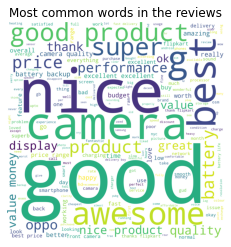

In [42]:
wordcloud = WordCloud(height=2000, width=2000, background_color='white')
wordcloud = wordcloud.generate(all_reviews)
plt.imshow(wordcloud)
plt.title("Most common words in the reviews")
plt.axis('off')
plt.savefig('WordCloud - Most common words in the reviews')
plt.show()


In [12]:
positive_df = df[df['Polarity'] > 0.5]
negative_df = df[df['Polarity'] <= 0]

neutral_df = df[df['Polarity'] <= 0.5]
neutral_df = neutral_df[neutral_df['Polarity']>0]

In [13]:
Mobile_Phone_Attribute=['camera','video','dound','battery','display','resolution','speed','audio','network','cost','support','replacement','price','sound']
pos_qualities = ['good','best','cheap','excellent','long','fast','great','superb','awesome']
neg_qualities = ['bad','poor','slow']

# Positive Sentiment Analysis

In [15]:
positive_cleaned_reviews = []
good = []
bad = []
for i in range(len(positive_df['Reviews'])):
    positive_reviews = df['Reviews'][i]
    positive_reviews=re.sub('[^a-zA-Z]',' ',positive_reviews)
    positive_reviews=re.sub(' +',' ',positive_reviews)
    positive_tokenization_reviews = word_tokenize(positive_reviews)
    
    positive_token_reviews = []
    for positive_review in positive_tokenization_reviews:
        positive_review = positive_review.lower()
        if positive_review != 'read' and positive_review != 'more' and 'read' not in positive_review and positive_review != 'phone' and positive_review !='mobile':
            positive_token_reviews.append(positive_review)
    
    positive_final_reviews = []
    for positive_review in positive_token_reviews:
        if positive_review not in stopwords:
            positive_final_reviews.append(positive_review)
    
    positive_words = [lemmatizer.lemmatize(word) for word in positive_final_reviews if word.isalpha()]
    good_re = []
    bad_re = []
    for i in range(len(positive_words)):
        if positive_words[i] in pos_qualities:
            for j in range(i-2,i+2):
                if j>0 and j<len(positive_words):
                    if positive_words[j] in Mobile_Phone_Attribute:
                        good_re.append(positive_words[j])
                        
        elif positive_words[i] in neg_qualities:
            for j in range(i-2,i+2):
                if j>0 and j<len(positive_words):
                    if positive_words[j] in Mobile_Phone_Attribute:
                        bad_re.append(positive_words[j])
        
        else:
            continue
                        
    
    
        
    
    good_re = list(dict.fromkeys(good_re))
    good_re = ' '.join(good_re)
    bad_re = list(dict.fromkeys(bad_re))
    bad_re = ' '.join(bad_re)
    good.append(good_re)
    bad.append(bad_re)
    final_positive_review = ' '.join(positive_words)
    positive_cleaned_reviews.append(final_positive_review)
    
positive_df['cleaned_reviews'] = positive_cleaned_reviews    
positive_df['good'] = good
positive_df['bad'] = bad
all_positive_reviews = ' '.join(positive_df['cleaned_reviews'])



<ipython-input-15-ea6b4b874ad7>:53: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  positive_df['cleaned_reviews'] = positive_cleaned_reviews
<ipython-input-15-ea6b4b874ad7>:54: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  positive_df['good'] = good
<ipython-input-15-ea6b4b874ad7>:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/st

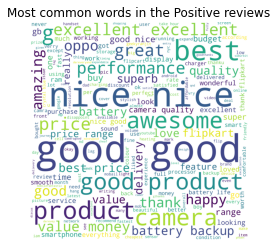

In [41]:
wordcloud = WordCloud(height=3000, width=3000, background_color='white')
wordcloud = wordcloud.generate(all_positive_reviews)
plt.imshow(wordcloud)
plt.title("Most common words in the Positive reviews")
plt.axis('off')
plt.savefig('WordCloud - Most common words in the Positive reviews.png')
plt.show()


# Negative Sentiment Analysis

In [17]:
negative_cleaned_reviews = []
good = []
bad = []
for i in range(len(negative_df['Reviews'])):
    negative_reviews = df['Reviews'][i]
    negative_reviews=re.sub('[^a-zA-Z]',' ',negative_reviews)
    negative_reviews=re.sub(' +',' ',negative_reviews)
    negative_tokenization_reviews = word_tokenize(negative_reviews)
    
    negative_token_reviews = []
    for negative_review in negative_tokenization_reviews:
        negative_review = negative_review.lower()
        if negative_review != 'read' and negative_review != 'more' and 'read' not in negative_review and negative_review != 'phone' and negative_review !='mobile':
            negative_token_reviews.append(negative_review)
    
    negative_final_reviews = []
    for negative_review in negative_token_reviews:
        if negative_review not in stopwords:
            negative_final_reviews.append(negative_review)
    
    negative_words = [lemmatizer.lemmatize(word) for word in negative_final_reviews if word.isalpha()]
    
    good_re = []
    bad_re = []
    for i in range(len(negative_words)):
        if negative_words[i] in pos_qualities:
            for j in range(i-2,i+2):
                if j>0 and j<len(negative_words):
                    if negative_words[j] in Mobile_Phone_Attribute:
                        good_re.append(negative_words[j])
                        
        elif negative_words[i] in neg_qualities:
            for j in range(i-2,i+2):
                if j>0 and j<len(negative_words):
                    if negative_words[j] in Mobile_Phone_Attribute:
                        bad_re.append(negative_words[j])
        
        else:
            continue
                        
    
    
        
    
    good_re = list(dict.fromkeys(good_re))
    good_re = ' '.join(good_re)
    bad_re = list(dict.fromkeys(bad_re))
    bad_re = ' '.join(bad_re)
    good.append(good_re)
    bad.append(bad_re)
    final_negative_review = ' '.join(words)
    
    negative_cleaned_reviews.append(final_negative_review)
negative_df['cleaned_reviews'] = negative_cleaned_reviews
negative_df['good'] = good
negative_df['bad'] = bad
all_negative_reviews = ' '.join(negative_df['cleaned_reviews'])
negative_df

<ipython-input-17-1cbbfbba5fe3>:54: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  negative_df['cleaned_reviews'] = negative_cleaned_reviews
<ipython-input-17-1cbbfbba5fe3>:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  negative_df['good'] = good
<ipython-input-17-1cbbfbba5fe3>:56: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/st

,Stars,Title,Reviews,Polarity,review_category,cleaned_reviews,good,bad
1765,5,Just wow!,Average phone camera is not good battery back ...,0.000000,negative,lovely awesome flipkart nice love fast smoothp...,,
1766,3,Good,Camera very poor qualityREAD MORE,-0.010000,negative,lovely awesome flipkart nice love fast smoothp...,price,
1767,3,Nice,Camera very poor qualityREAD MORE,-0.010000,negative,lovely awesome flipkart nice love fast smoothp...,price,
1768,4,Good quality product,Camera is not good And camera futures is very ...,-0.017407,negative,lovely awesome flipkart nice love fast smoothp...,price,
1769,3,Nice,"Speaker quality are bit bad, not so clear when...",-0.033333,negative,lovely awesome flipkart nice love fast smoothp...,,
1770,3,Fair,"Camara not good as expected for this mobile, w...",-0.062500,negative,lovely awesome flipkart nice love fast smoothp...,camera,
1771,5,Worth every penny,Very expensive productREAD MORE,-0.075000,negative,lovely awesome flipkart nice love fast smoothp...,price camera,
1772,3,Fair,"Camera is too bad. When exposed to sunlight, d...",-0.081250,negative,lovely awesome flipkart nice love fast smoothp...,,
1773,4,Wonderful,Camara picture quality is very bad not satisfi...,-0.220000,negative,lovely awesome flipkart nice love fast smoothp...,,
1774,3,Fair,Worst camraPerformance is okREAD MORE,-0.250000,negative,lovely awesome flipkart nice love fast smoothp...,price,


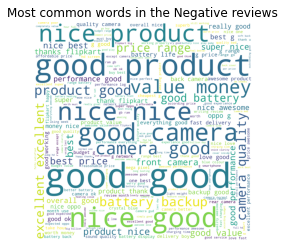

In [40]:
wordcloud = WordCloud(height=2000, width=2000, background_color='white')
wordcloud = wordcloud.generate(all_negative_reviews)
plt.imshow(wordcloud)
plt.title("Most common words in the Negative reviews")
plt.axis('off')
plt.savefig('WordCloud - Most common words in the Negative reviews.png')
plt.show()


# Neutral Sentiment Analysis

In [19]:
neutral_cleaned_reviews = []
good = []
bad = []
for i in range(len(neutral_df['Reviews'])):
    neutral_reviews = df['Reviews'][i]
    neutral_reviews=re.sub('[^a-zA-Z]',' ',neutral_reviews)
    neutral_reviews=re.sub(' +',' ',neutral_reviews)
    neutral_tokenization_reviews = word_tokenize(neutral_reviews)
    
    neutral_token_reviews = []
    for neutral_review in neutral_tokenization_reviews:
        neutral_review = neutral_review.lower()
        if neutral_review != 'read' and neutral_review != 'more' and 'read' not in neutral_review and neutral_review != 'phone' and neutral_review !='mobile':
            neutral_token_reviews.append(neutral_review)
    
    neutral_final_reviews = []
    for neutral_review in neutral_token_reviews:
        if neutral_review not in stopwords:
            neutral_final_reviews.append(neutral_review)
    
    neutral_words = [lemmatizer.lemmatize(word) for word in neutral_final_reviews if word.isalpha()]
    good_re = []
    bad_re = []
    for i in range(len(neutral_words)):
        if neutral_words[i] in pos_qualities:
            for j in range(i-2,i+2):
                if j>0 and j<len(neutral_words):
                    if neutral_words[j] in Mobile_Phone_Attribute:
                        good_re.append(neutral_words[j])
                        
        elif neutral_words[i] in neg_qualities:
            for j in range(i-2,i+2):
                if j>0 and j<len(negative_words):
                    if neutral_words[j] in Mobile_Phone_Attribute:
                        bad_re.append(neutral_words[j])
        
        else:
            continue
                        
    good_re = list(dict.fromkeys(good_re))
    good_re = ' '.join(good_re)
    bad_re = list(dict.fromkeys(bad_re))
    bad_re = ' '.join(bad_re)
    good.append(good_re)
    bad.append(bad_re)
    final_neutral_review = ' '.join(words)
    
    neutral_cleaned_reviews.append(final_neutral_review)
neutral_df['cleaned_reviews'] = neutral_cleaned_reviews
neutral_df['good'] = good
neutral_df['bad'] = bad

all_neutral_reviews = ' '.join(neutral_df['cleaned_reviews'])
neutral_df

,Stars,Title,Reviews,Polarity,review_category,cleaned_reviews,good,bad
838,5,Just wow!,Head phone varala😌READ MORE,0.500000,neutral,lovely awesome flipkart nice love fast smoothp...,,
839,4,Wonderful,BetterREAD MORE,0.500000,neutral,lovely awesome flipkart nice love fast smoothp...,price,
840,3,Decent product,OutstandingREAD MORE,0.500000,neutral,lovely awesome flipkart nice love fast smoothp...,price,
841,5,Terrific,Value for moneyREAD MORE,0.500000,neutral,lovely awesome flipkart nice love fast smoothp...,price,
842,5,Brilliant,Monu hit boyREAD MORE,0.500000,neutral,lovely awesome flipkart nice love fast smoothp...,,
...,...,...,...,...,...,...,...,...
1760,3,Good,Poor Display QualityREAD MORE,0.050000,neutral,lovely awesome flipkart nice love fast smoothp...,,
1761,3,Fair,Poor camera& BatteryREAD MORE,0.050000,neutral,lovely awesome flipkart nice love fast smoothp...,,
1762,3,Good,camera quality is very bad.. otherwise good bu...,0.047500,neutral,lovely awesome flipkart nice love fast smoothp...,,
1763,4,Pretty good,Back Camera quality is poor. Otherwise the pho...,0.033333,neutral,lovely awesome flipkart nice love fast smoothp...,,


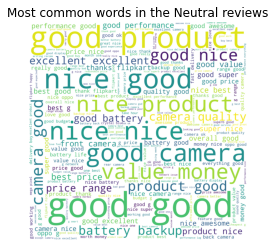

In [39]:
wordcloud = WordCloud(height=2000, width=2000, background_color='white')
wordcloud = wordcloud.generate(all_neutral_reviews)
plt.imshow(wordcloud)
plt.title("Most common words in the Neutral reviews")
plt.axis('off')
plt.savefig('WordCloud - Most common words in the Neutral reviews.png')
plt.show()

# Graphical Analysis

C:\Users\Manav\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


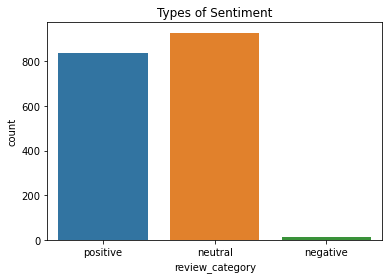

In [23]:
ax = sns.countplot(df['review_category']).set_title('Types of Sentiment')

In [24]:
fig1 = ax.get_figure()
fig1.savefig('Types of Sentiment Distribution.jpg')


In [25]:
data

,words,counts
541,zoon,958
535,zoom,957
762,youtube,956
313,youngstar,955
360,year,954
...,...,...
723,accepting,4
616,absolutely,3
511,absolute,2
863,able,1


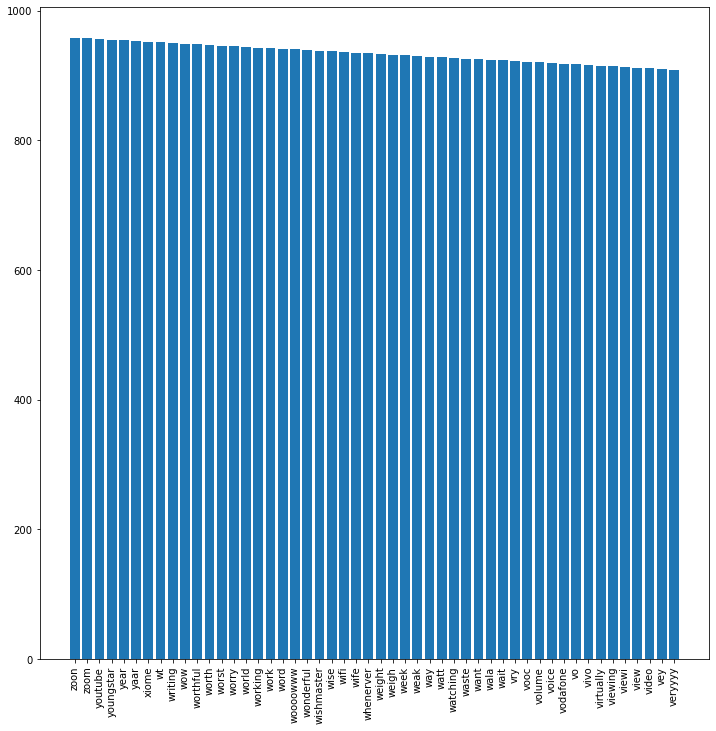

In [26]:
plt.figure(figsize=(12,12))
plt.bar(x = data['words'][:50], height = data['counts'][:50])
plt.xticks(rotation = 'vertical')
plt.savefig('Most Used Words for Reviews')

In [27]:
positive_countVectorizer = CountVectorizer(stop_words='english',ngram_range=(1,5))
positive_vector = positive_countVectorizer.fit_transform([lemmatizer.lemmatize(word) for word in word_tokenize(all_positive_reviews)])
positive_word_dict = positive_countVectorizer.vocabulary_
positive_data = pd.DataFrame({
        'words' : list(positive_word_dict.keys()),
        'counts' : list(positive_word_dict.values())
    })
positive_data = positive_data.sort_values(by=['counts'], ascending=False)


negative_countVectorizer = CountVectorizer(stop_words='english',ngram_range=(1,5))
negative_vector = negative_countVectorizer.fit_transform([lemmatizer.lemmatize(word) for word in word_tokenize(all_negative_reviews)])
negative_word_dict = negative_countVectorizer.vocabulary_
negative_data = pd.DataFrame({
        'words' : list(negative_word_dict.keys()),
        'counts' : list(negative_word_dict.values())
    })
negative_data = negative_data.sort_values(by=['counts'], ascending=False)


neutral_countVectorizer = CountVectorizer(stop_words='english',ngram_range=(1,5))
neutral_vector = neutral_countVectorizer.fit_transform([lemmatizer.lemmatize(word) for word in word_tokenize(all_neutral_reviews)])
neutral_word_dict = neutral_countVectorizer.vocabulary_
neutral_data = pd.DataFrame({
        'words' : list(neutral_word_dict.keys()),
        'counts' : list(neutral_word_dict.values())
    })
neutral_data = neutral_data.sort_values(by=['counts'], ascending=False)


In [28]:
good_counts = []
for i in good:
    count = 0
    if positive_word_dict[i]:
        count = count + positive_word_dict[i]
    if negative_word_dict[i]:
        count = count + negative_word_dict[i]
    if neutral_word_dict[i]:
        count = count + neutral_word_dict[i]
    good_counts.append(count)


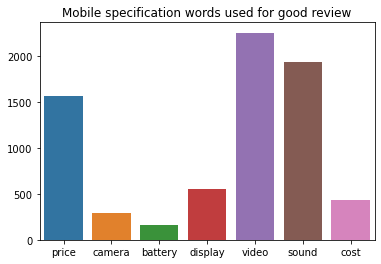

In [29]:
fig2 = sns.barplot(x = good, y = good_counts).set_title('Mobile specification words used for good review')
fig2 = fig2.get_figure()
fig2.savefig('Mobile specification words used for good review')

# Emoji Analysis

In [30]:
str=''
for i in df['Reviews']:
    list=[c for c in i if c in emoji.UNICODE_EMOJI['en']]
    for ele in list:
        str=str+ele

In [31]:
str

'📱😊👍😍📱📱👌👍💯💯💯👍✨✨👍😘👌👌👌👍👍👍👍👍😊😊😊😊😎❣📱😊😊👌😍😍😍😍😍😍👍👍📱👌👍👍👍👍😍😎💕🥰💋💋💋🙏😊😊😊😊😊😊😊😊😊😊😊👍📱😁⭐👌❤😘😊👍👍👍🏻👍🏻👍🙂👍👍👍👍👍👍👍👍😊😊😊😊👍👍😊👍👍👍🥰🤘😊🥰💸💸💸👌👍📸👍🙂📱😉😉👍👍👍👍👍👍👍👍👍👍👌👍👍👍😘😘🥰🥰🥰😎🔥😎🌟🥰🥰🥰📱😊😊👍🏻❣👌😍🙏📞👌👍🤣😂👍👍📲💰💰👍👍👍👍📱👍👍👍😀👍🏻🔋😄👍👌👍👌👍👍👍👍👍👌📱📱📱😚🙂😘😘😘😘😊😊😊❤❤❤😍🤠😊😊👍👌👍👌👌👌😊😊👍👍👍😊🤩🤩🤳📸👍👍📱👍👍👍👌👌👍👍👍👌👌👌👌❤🥰🤗🙂😃😃✔📱🤳📱🤳☝👍💥💥💥👌👍👍🙂🙂🙂📱👌👍📱🙂❤🔥🔥📸🙏🏻😃👌👌👍😌🔥🔥🔥📷👌😍💕🤑🔋👍👌🏻👌🏻👌🏻👌🏻👌🏻👌🏻😊😊😊😊😊😁😁😁😁😁👍👍🤟❤⭐👍😔❤❤❤❣💰😍😍⭐⭐⭐⭐⭐👌👌👌♥🥳🥳🙂🙂👍👍😘🙏☺😃🆕😀👍👍☺☺📱📱📱📱📷😊😕😀😲😔😭😠🤗🔋😊👌👌👌👌📱☺☺☺☺☺☺☺☺☺☺☺☺☺☺☺☺🔋🔋🔋✌✌✌✌✌✌👍👍👍🙂😜🤩👍👍👍👌👌👌👍💯🔋👌📸👍🏻☺🔊'

In [32]:
result = {}
for i in set(str):
    result[i]=str.count(i)

In [33]:
emojis = []
counts = []
for key,val in enumerate(result):
    emojis.append(val)
    counts.append(result[val])

In [34]:
df = pd.DataFrame({
    'Emojis' : emojis,
    'Counts' : counts
})
df = df.sort_values(by=['Counts'],ascending = False).reset_index().drop('index',axis=1)

C:\Users\Manav\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 128077 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\Manav\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 128076 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\Manav\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 128241 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\Manav\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 127995 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\Manav\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 128578 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\Manav\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 129392 missing 

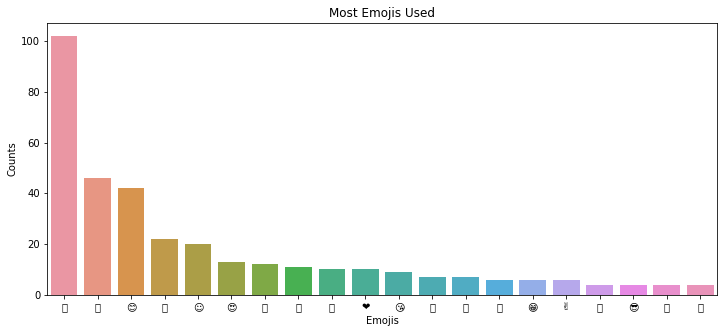

In [35]:
plt.figure(figsize=(12,5))


fig3 = sns.barplot(x = df['Emojis'][:20], y = df['Counts'][:20]).set_title('Most Emojis Used').get_figure()

fig3.savefig('Most Emojis Used')